In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
#from tensorflow.keras.datasets import cifar10 
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

## main_num_dataset = 200
## other_num_dataset = 10

In [2]:
acc0 = [[0.33329999446868896, 0.09740000218153, 0.2808000147342682, 0.23090000450611115, 0.4593000113964081, 0.44269999861717224, 0.47749999165534973, 0.18809999525547028, 0.23759999871253967, 0.18539999425411224, 0.3481000065803528, 0.2809999883174896, 0.3785000145435333, 0.4332999885082245, 0.6482999920845032, 0.0982000008225441, 0.10090000182390213, 0.42980000376701355, 0.11349999904632568, 0.435699999332428, 0.4478999972343445, 0.34279999136924744, 0.2903999984264374, 0.4120999872684479, 0.45980000495910645, 0.60589998960495, 0.38580000400543213, 0.4187000095844269, 0.22259999811649323, 0.08919999748468399], [0.10320000350475311, 0.09380000084638596, 0.0957999974489212, 0.08919999748468399, 0.18449999392032623, 0.1454000025987625, 0.10339999943971634, 0.0982000008225441, 0.10090000182390213, 0.09740000218153, 0.10100000351667404, 0.11349999904632568, 0.09380000084638596, 0.09740000218153, 0.10279999673366547, 0.09799999743700027, 0.2190999984741211, 0.10279999673366547, 0.0835999995470047, 0.10090000182390213, 0.09799999743700027, 0.10279999673366547, 0.09740000218153, 0.1728000044822693, 0.11349999904632568, 0.10320000350475311, 0.10360000282526016, 0.17249999940395355, 0.0982000008225441, 0.19550000131130219], [0.18979999423027039, 0.1379999965429306, 0.20960000157356262, 0.18889999389648438, 0.2671999931335449, 0.19099999964237213, 0.10100000351667404, 0.10320000350475311, 0.14339999854564667, 0.3589000105857849, 0.17730000615119934, 0.1656000018119812, 0.0957999974489212, 0.23199999332427979, 0.10279999673366547, 0.20170000195503235, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.19169999659061432, 0.11349999904632568, 0.37929999828338623, 0.2728999853134155, 0.36079999804496765, 0.28540000319480896, 0.1768999993801117, 0.10320000350475311, 0.09740000218153, 0.09799999743700027, 0.09740000218153], [0.42649999260902405, 0.3418000042438507, 0.17329999804496765, 0.10100000351667404, 0.08919999748468399, 0.3684000074863434, 0.18539999425411224, 0.10100000351667404, 0.29159998893737793, 0.2669000029563904, 0.09889999777078629, 0.24650000035762787, 0.21439999341964722, 0.28439998626708984, 0.19429999589920044, 0.08919999748468399, 0.34279999136924744, 0.2581000030040741, 0.24740000069141388, 0.11760000139474869, 0.09960000216960907, 0.39730000495910645, 0.2944999933242798, 0.38370001316070557, 0.10090000182390213, 0.19179999828338623, 0.10320000350475311, 0.15809999406337738, 0.37619999051094055, 0.21050000190734863], [0.4887000024318695, 0.09740000218153, 0.18469999730587006, 0.4724000096321106, 0.33629998564720154, 0.22190000116825104, 0.4004000127315521, 0.2897000014781952, 0.29899999499320984, 0.20100000500679016, 0.5508999824523926, 0.18529999256134033, 0.3723999857902527, 0.323199987411499, 0.272599995136261, 0.10320000350475311, 0.32010000944137573, 0.3727000057697296, 0.2142000049352646, 0.5041999816894531, 0.2305999994277954, 0.5026000142097473, 0.36239999532699585, 0.34040001034736633, 0.35740000009536743, 0.43149998784065247, 0.41940000653266907, 0.3264000117778778, 0.447299987077713, 0.37459999322891235], [0.10100000351667404, 0.40790000557899475, 0.259799987077713, 0.32269999384880066, 0.11720000207424164, 0.41019999980926514, 0.10100000351667404, 0.21719999611377716, 0.6071000099182129, 0.19760000705718994, 0.5231999754905701, 0.1589999943971634, 0.5501999855041504, 0.4948999881744385, 0.11349999904632568, 0.4494999945163727, 0.18700000643730164, 0.47119998931884766, 0.0957999974489212, 0.5672000050544739, 0.19380000233650208, 0.10320000350475311, 0.5845000147819519, 0.41290000081062317, 0.536300003528595, 0.397599995136261, 0.4758000075817108, 0.2126999944448471, 0.3025999963283539, 0.48590001463890076], [0.5964999794960022, 0.5133000016212463, 0.20720000565052032, 0.24719999730587006, 0.5123000144958496, 0.4778999984264374, 0.18889999389648438, 0.4830000102519989, 0.3212999999523163, 0.5443999767303467, 0.3970000147819519, 0.3971000015735626, 0.557699978351593, 0.11349999904632568, 0.5320000052452087, 0.08919999748468399, 0.45969998836517334, 0.3422999978065491, 0.44929999113082886, 0.2556999921798706, 0.603600025177002, 0.5034999847412109, 0.5067999958992004, 0.4424000084400177, 0.10320000350475311, 0.2004999965429306, 0.4943999946117401, 0.20489999651908875, 0.28610000014305115, 0.08919999748468399], [0.5830000042915344, 0.3179999887943268, 0.18940000236034393, 0.18809999525547028, 0.37689998745918274, 0.10339999943971634, 0.5073000192642212, 0.5461000204086304, 0.4025999903678894, 0.10540000349283218, 0.38909998536109924, 0.21439999341964722, 0.3176000118255615, 0.2669000029563904, 0.44600000977516174, 0.6567000150680542, 0.5677000284194946, 0.45509999990463257, 0.15940000116825104, 0.298799991607666, 0.5960000157356262, 0.17949999868869781, 0.2345999926328659, 0.21529999375343323, 0.44749999046325684, 0.6208999752998352, 0.506600022315979, 0.14630000293254852, 0.09950000047683716, 0.660099983215332], [0.36340001225471497, 0.09740000218153, 0.1136000007390976, 0.10279999673366547, 0.35199999809265137, 0.4011000096797943, 0.3709999918937683, 0.219200000166893, 0.44350001215934753, 0.30000001192092896, 0.10100000351667404, 0.18479999899864197, 0.5192000269889832, 0.4424999952316284, 0.33640000224113464, 0.23100000619888306, 0.40049999952316284, 0.6473000049591064, 0.0957999974489212, 0.4348999857902527, 0.3711000084877014, 0.17800000309944153, 0.4546999931335449, 0.6590999960899353, 0.4595000147819519, 0.5055999755859375, 0.6829000115394592, 0.3716000020503998, 0.4426000118255615, 0.6383000016212463], [0.5105000138282776, 0.3043999969959259, 0.6467000246047974, 0.28279998898506165, 0.5181999802589417, 0.1834000051021576, 0.6430000066757202, 0.5249000191688538, 0.374099999666214, 0.5525000095367432, 0.5310999751091003, 0.6013000011444092, 0.27090001106262207, 0.10040000081062317, 0.5202999711036682, 0.4083999991416931, 0.3465999960899353, 0.3903000056743622, 0.3580000102519989, 0.4438999891281128, 0.43959999084472656, 0.1274999976158142, 0.3716999888420105, 0.5982000231742859, 0.6083999872207642, 0.09740000218153, 0.5178999900817871, 0.19220000505447388, 0.60589998960495, 0.1655000001192093], [0.5906000137329102, 0.6105999946594238, 0.3926999866962433, 0.382099986076355, 0.22470000386238098, 0.6044999957084656, 0.4505999982357025, 0.580299973487854, 0.4733999967575073, 0.6848000288009644, 0.10289999842643738, 0.5777999758720398, 0.6044999957084656, 0.10570000112056732, 0.3246999979019165, 0.6256999969482422, 0.5090000033378601, 0.5877000093460083, 0.7149999737739563, 0.38260000944137573, 0.6877999901771545, 0.6308000087738037, 0.5928000211715698, 0.703499972820282, 0.5909000039100647, 0.09880000352859497, 0.44670000672340393, 0.27129998803138733, 0.2092999964952469, 0.4043000042438507], [0.20890000462532043, 0.6884999871253967, 0.27230000495910645, 0.6478999853134155, 0.5866000056266785, 0.23909999430179596, 0.11180000007152557, 0.5099999904632568, 0.48579999804496765, 0.786899983882904, 0.7156000137329102, 0.10339999943971634, 0.34459999203681946, 0.5389999747276306, 0.2662999927997589, 0.32179999351501465, 0.7324000000953674, 0.525600016117096, 0.10300000011920929, 0.588100016117096, 0.6866000294685364, 0.7400000095367432, 0.367000013589859, 0.6888999938964844, 0.10859999805688858, 0.24300000071525574, 0.582099974155426, 0.4943000078201294, 0.6147000193595886, 0.10279999673366547], [0.7264999747276306, 0.6237000226974487, 0.2644999921321869, 0.506600022315979, 0.6858999729156494, 0.42820000648498535, 0.24860000610351562, 0.6035000085830688, 0.30320000648498535, 0.10119999945163727, 0.5857999920845032, 0.42329999804496765, 0.663100004196167, 0.42410001158714294, 0.10779999941587448, 0.5896000266075134, 0.1354999989271164, 0.44909998774528503, 0.5349000096321106, 0.4235999882221222, 0.3716999888420105, 0.7505999803543091, 0.7310000061988831, 0.2761000096797943, 0.7297000288963318, 0.739300012588501, 0.6226000189781189, 0.09889999777078629, 0.28060001134872437, 0.4641999900341034], [0.5127000212669373, 0.23399999737739563, 0.7063999772071838, 0.6877999901771545, 0.19259999692440033, 0.7703999876976013, 0.4846000075340271, 0.09780000150203705, 0.4223000109195709, 0.7493000030517578, 0.1559000015258789, 0.20239999890327454, 0.10100000351667404, 0.4952999949455261, 0.4645000100135803, 0.3953999876976013, 0.5185999870300293, 0.586899995803833, 0.6779000163078308, 0.10320000350475311, 0.7644000053405762, 0.19689999520778656, 0.7509999871253967, 0.391400009393692, 0.7105000019073486, 0.4302000105381012, 0.513700008392334, 0.6351000070571899, 0.29600000381469727, 0.3650999963283539], [0.7903000116348267, 0.628600001335144, 0.6735000014305115, 0.3822000026702881, 0.20900000631809235, 0.188400000333786, 0.5591999888420105, 0.1031000018119812, 0.8166999816894531, 0.19599999487400055, 0.5501999855041504, 0.5195000171661377, 0.544700026512146, 0.6424000263214111, 0.34940001368522644, 0.7613999843597412, 0.20110000669956207, 0.569100022315979, 0.366100013256073, 0.536300003528595, 0.5709999799728394, 0.26750001311302185, 0.5216000080108643, 0.6887999773025513, 0.19439999759197235, 0.7113999724388123, 0.10100000351667404, 0.2791999876499176, 0.5184000134468079, 0.4025000035762787], [0.2630999982357025, 0.210999995470047, 0.21150000393390656, 0.3149999976158142, 0.5501999855041504, 0.7056000232696533, 0.6194000244140625, 0.6725000143051147, 0.8069999814033508, 0.7757999897003174, 0.635699987411499, 0.12559999525547028, 0.10100000351667404, 0.33719998598098755, 0.5496000051498413, 0.41440001130104065, 0.22920000553131104, 0.4602999985218048, 0.65420001745224, 0.7462000250816345, 0.6848999857902527, 0.5339000225067139, 0.5674999952316284, 0.6550999879837036, 0.5170999765396118, 0.685699999332428, 0.30550000071525574, 0.3183000087738037, 0.7573000192642212, 0.67330002784729], [0.47699999809265137, 0.7641000151634216, 0.337799996137619, 0.5590999722480774, 0.5623999834060669, 0.7706999778747559, 0.503000020980835, 0.638700008392334, 0.6279000043869019, 0.19670000672340393, 0.5497000217437744, 0.19339999556541443, 0.6421999931335449, 0.24799999594688416, 0.4512999951839447, 0.2948000133037567, 0.7019000053405762, 0.27059999108314514, 0.18690000474452972, 0.10320000350475311, 0.2897999882698059, 0.78329998254776, 0.19179999828338623, 0.6064000129699707, 0.6495000123977661, 0.583299994468689, 0.5927000045776367, 0.7728000283241272, 0.6567000150680542, 0.7020999789237976], [0.5109999775886536, 0.6019999980926514, 0.46299999952316284, 0.16899999976158142, 0.4034999907016754, 0.6559000015258789, 0.2198999971151352, 0.18520000576972961, 0.27320000529289246, 0.3174000084400177, 0.1898999959230423, 0.10100000351667404, 0.5083000063896179, 0.5527999997138977, 0.7925000190734863, 0.17589999735355377, 0.49959999322891235, 0.7591000199317932, 0.7750999927520752, 0.19359999895095825, 0.19769999384880066, 0.7279999852180481, 0.5699999928474426, 0.24809999763965607, 0.7577000260353088, 0.10100000351667404, 0.6197999715805054, 0.31779998540878296, 0.7275000214576721, 0.698199987411499], [0.7559000253677368, 0.34860000014305115, 0.3822999894618988, 0.39079999923706055, 0.39800000190734863, 0.6572999954223633, 0.7825000286102295, 0.7516999840736389, 0.6930999755859375, 0.7800999879837036, 0.4957999885082245, 0.7732999920845032, 0.3637000024318695, 0.7662000060081482, 0.262800008058548, 0.6086999773979187, 0.7336999773979187, 0.38109999895095825, 0.6575999855995178, 0.7662000060081482, 0.6639000177383423, 0.4052000045776367, 0.37299999594688416, 0.120899997651577, 0.10999999940395355, 0.5138999819755554, 0.8241999745368958, 0.16140000522136688, 0.7680000066757202, 0.6261000037193298], [0.7731999754905701, 0.1867000013589859, 0.7035999894142151, 0.1356000006198883, 0.638700008392334, 0.1915999948978424, 0.34040001034736633, 0.5228999853134155, 0.26930001378059387, 0.4584999978542328, 0.6689000129699707, 0.5203999876976013, 0.5033000111579895, 0.4025000035762787, 0.4429999887943268, 0.12439999729394913, 0.5490999817848206, 0.7477999925613403, 0.4659000039100647, 0.5820000171661377, 0.36059999465942383, 0.5601999759674072, 0.3181999921798706, 0.7206000089645386, 0.44600000977516174, 0.6008999943733215, 0.296099990606308, 0.10100000351667404, 0.5651000142097473, 0.4754999876022339], [0.34610000252723694, 0.4180999994277954, 0.4943999946117401, 0.1339000016450882, 0.6297000050544739, 0.7616000175476074, 0.28360000252723694, 0.10209999978542328, 0.746399998664856, 0.6107000112533569, 0.5062000155448914, 0.6827999949455261, 0.48890000581741333, 0.6402000188827515, 0.6177999973297119, 0.20669999718666077, 0.4348999857902527, 0.47920000553131104, 0.2644999921321869, 0.24879999458789825, 0.7559000253677368, 0.6011000275611877, 0.5591999888420105, 0.365200012922287, 0.44359999895095825, 0.10100000351667404, 0.32690000534057617, 0.10220000147819519, 0.7095000147819519, 0.7342000007629395]]
loss0 = [[25.818782806396484, 838.9761962890625, 12.862127304077148, 8.762162208557129, 6.2432861328125, 9.405542373657227, 23.489013671875, 156.73533630371094, 10.271468162536621, 129.62753295898438, 63.58793640136719, 46.50126647949219, 64.64533996582031, 28.67469024658203, 1.510237216949463, 449.1865539550781, 533.2838134765625, 13.351215362548828, 800.4547729492188, 5.869150638580322, 2.253626823425293, 22.00493812561035, 211.9386444091797, 5.744119167327881, 2.322366714477539, 3.374927043914795, 4.869685173034668, 7.610078811645508, 92.65963745117188, 1230.3267822265625], [2.4309422969818115, 2.7637014389038086, 2.8346974849700928, 2.729886054992676, 2.5151679515838623, 2.3293933868408203, 2.7736339569091797, 2.909742593765259, 19.797847747802734, 2.7249717712402344, 2.3025619983673096, 2.3019802570343018, 2.2373669147491455, 2.9872825145721436, 31.348100662231445, 3.177712917327881, 2.2775018215179443, 2.951321840286255, 2.570840835571289, 16.431324005126953, 2.302553176879883, 2.560847759246826, 9.147625923156738, 3.9292078018188477, 2.302013635635376, 35.4973258972168, 2.751193046569824, 3.0245003700256348, 2.5162723064422607, 5.139440536499023], [3.959317207336426, 3.1734941005706787, 1.9883941411972046, 10.659724235534668, 2.744567394256592, 2.0488533973693848, 2.302452564239502, 4.801241397857666, 3.2423713207244873, 2.173595428466797, 11.418488502502441, 2.7249886989593506, 11.79952621459961, 3.076955556869507, 4.997852802276611, 3.209157705307007, 118.67420959472656, 5.018733501434326, 98.11872100830078, 7.393881797790527, 2.8014559745788574, 4.154967784881592, 4.960045337677002, 2.236189126968384, 1.8563061952590942, 5.160083293914795, 88.25901794433594, 2.897031784057617, 13.926498413085938, 94.3394775390625], [4.224411487579346, 2.782508134841919, 25.78772735595703, 2.302518367767334, 101.71658325195312, 4.118391513824463, 4.119347095489502, 2.3026187419891357, 2.6461286544799805, 9.2994966506958, 2.781386375427246, 3.210688829421997, 27.883752822875977, 5.7908525466918945, 16.116518020629883, 4.200106143951416, 2.661628246307373, 2.464848518371582, 5.448297023773193, 2.227710485458374, 4.2924885749816895, 12.055872917175293, 2.6753029823303223, 4.553708076477051, 5.386895179748535, 2.198202610015869, 79.4634017944336, 4.233551502227783, 3.1561598777770996, 8.273063659667969], [2.1037490367889404, 76.49153900146484, 2.2429323196411133, 1.4316085577011108, 1.7157671451568604, 15.234519004821777, 13.709070205688477, 8.386924743652344, 5.170959949493408, 10.154631614685059, 6.884848594665527, 36.50556564331055, 2.912767171859741, 5.24085807800293, 15.81924819946289, 63.43524932861328, 2.7978289127349854, 5.6388444900512695, 4.303193092346191, 4.046231269836426, 3.135132312774658, 1.742753267288208, 8.22104263305664, 2.152851104736328, 2.467384099960327, 2.4955267906188965, 6.544660568237305, 5.316917419433594, 9.287880897521973, 2.884887218475342], [2.302609920501709, 3.62728214263916, 3.9599921703338623, 5.677690029144287, 6.224104404449463, 3.4889028072357178, 2.302107334136963, 4.9196858406066895, 3.149015426635742, 8.82219409942627, 1.6898493766784668, 2.2425715923309326, 2.2125871181488037, 2.1719629764556885, 70.023681640625, 4.245597839355469, 5.945757865905762, 1.4966716766357422, 15.406245231628418, 6.060369968414307, 7.31724214553833, 57.594573974609375, 2.2924575805664062, 5.127719879150391, 1.486847996711731, 5.2516560554504395, 6.313304901123047, 6.559111595153809, 10.01418685913086, 2.033627510070801], [3.287785530090332, 2.4357309341430664, 18.242712020874023, 3.330935478210449, 2.842134714126587, 5.749568462371826, 12.911211967468262, 2.5698323249816895, 6.161332607269287, 3.1127638816833496, 4.132392406463623, 4.085064888000488, 4.091050624847412, 85.7463150024414, 2.44820237159729, 73.89342498779297, 2.3721885681152344, 4.50512170791626, 5.79650354385376, 5.61618709564209, 2.27626371383667, 7.43578577041626, 2.5936474800109863, 2.286360263824463, 56.589237213134766, 5.398948669433594, 3.7753047943115234, 25.542490005493164, 18.54627227783203, 73.82575988769531], [2.8019933700561523, 8.692708015441895, 10.756684303283691, 5.720767498016357, 2.429270029067993, 75.25030517578125, 2.014698028564453, 2.098200559616089, 3.196794271469116, 9.327503204345703, 2.5286879539489746, 5.7410478591918945, 3.220006227493286, 6.481164932250977, 3.120013475418091, 2.770968437194824, 2.991830825805664, 4.279894828796387, 9.308276176452637, 11.366336822509766, 1.67112398147583, 25.525300979614258, 4.615774154663086, 24.38999366760254, 4.211432933807373, 1.235809326171875, 4.401548862457275, 12.497918128967285, 25.31859588623047, 3.359921455383301], [8.457803726196289, 57.975799560546875, 53.23995590209961, 19.360408782958984, 3.5930323600769043, 5.367387294769287, 5.756104469299316, 15.8331937789917, 4.267702102661133, 14.84501838684082, 52.86886215209961, 52.507999420166016, 3.0160181522369385, 3.8733558654785156, 5.551863193511963, 7.770483016967773, 5.935451984405518, 2.0244712829589844, 33.309967041015625, 6.170856475830078, 7.292059421539307, 24.30964469909668, 3.605573892593384, 3.0160350799560547, 4.520965576171875, 4.990857124328613, 2.000685453414917, 8.524739265441895, 5.03547477722168, 4.7042622566223145], [4.806167125701904, 6.084238052368164, 2.001638412475586, 12.330297470092773, 3.471172571182251, 15.296401977539062, 1.698834776878357, 3.143296957015991, 3.7236034870147705, 5.892630577087402, 7.73842716217041, 2.9124059677124023, 5.831058979034424, 48.43855667114258, 3.4715683460235596, 4.826387405395508, 6.827058792114258, 3.223942279815674, 3.4487433433532715, 4.685451507568359, 7.688720226287842, 22.79673194885254, 5.531988143920898, 2.513184070587158, 2.8887481689453125, 38.78464889526367, 3.417527675628662, 23.13759994506836, 2.7271625995635986, 38.142704010009766], [2.559213399887085, 2.9581785202026367, 10.94884967803955, 5.124675750732422, 8.610736846923828, 3.7499659061431885, 5.968277931213379, 3.3935325145721436, 7.083259582519531, 2.1433167457580566, 21.692405700683594, 4.128626346588135, 3.186413288116455, 23.463184356689453, 3.8129312992095947, 1.6305257081985474, 2.7807376384735107, 2.5418953895568848, 1.3574116230010986, 5.9563446044921875, 1.4975489377975464, 2.5201001167297363, 2.638005256652832, 1.447064757347107, 2.8600852489471436, 23.699981689453125, 6.318527698516846, 5.698243141174316, 26.097166061401367, 6.805500030517578], [7.873288154602051, 2.839160442352295, 5.774155616760254, 3.2885282039642334, 1.7955074310302734, 10.992377281188965, 21.702316284179688, 3.0049514770507812, 4.337640762329102, 0.9032402634620667, 1.951095461845398, 18.1129093170166, 8.974601745605469, 2.9277896881103516, 12.90498161315918, 7.02674674987793, 1.2472120523452759, 3.011235475540161, 29.330156326293945, 1.884987711906433, 2.183915138244629, 1.1976444721221924, 4.220931529998779, 1.9780689477920532, 18.64078140258789, 4.492817401885986, 3.5830836296081543, 6.859992027282715, 2.6451401710510254, 24.234107971191406], [2.156341552734375, 2.9660017490386963, 12.86076831817627, 3.0482723712921143, 1.8265511989593506, 5.342479705810547, 10.617240905761719, 2.416410446166992, 10.337470054626465, 27.981374740600586, 3.7169406414031982, 5.413276195526123, 1.9378154277801514, 4.18131160736084, 25.31979751586914, 3.5445785522460938, 26.119182586669922, 3.7416024208068848, 2.853775978088379, 3.8454058170318604, 6.34415864944458, 1.719036340713501, 1.925309181213379, 9.973372459411621, 1.6989521980285645, 1.1550073623657227, 4.520693778991699, 40.12478256225586, 7.013695240020752, 5.056591987609863], [3.3726131916046143, 8.428350448608398, 2.0460188388824463, 2.2856695652008057, 8.984993934631348, 1.3970892429351807, 3.719791889190674, 27.403263092041016, 5.058987617492676, 1.2180057764053345, 21.57663917541504, 18.311847686767578, 22.02119255065918, 2.383725881576538, 3.4314520359039307, 6.134169101715088, 3.0408918857574463, 5.496139049530029, 1.7078089714050293, 11.913044929504395, 1.213624358177185, 16.409534454345703, 1.1760475635528564, 5.191537857055664, 1.3731355667114258, 2.2339088916778564, 4.041672706604004, 2.1868226528167725, 5.0076775550842285, 6.063209533691406], [1.0426018238067627, 3.3138129711151123, 2.4744856357574463, 6.393744945526123, 10.237720489501953, 7.458993911743164, 4.125797748565674, 18.367942810058594, 0.7087104320526123, 9.291890144348145, 3.5063188076019287, 2.8473880290985107, 3.14981746673584, 3.503535509109497, 5.821599006652832, 1.0776996612548828, 7.821385383605957, 2.7424745559692383, 4.928440570831299, 4.185731887817383, 3.598036766052246, 9.344345092773438, 2.1609318256378174, 1.672883152961731, 13.817103385925293, 1.572332739830017, 18.00229835510254, 20.69993019104004, 3.1869001388549805, 6.748417377471924], [6.539137840270996, 30.00932502746582, 15.103687286376953, 7.194408416748047, 3.951136350631714, 1.7519972324371338, 2.2773730754852295, 2.2029550075531006, 0.9884845018386841, 1.322870135307312, 2.8869404792785645, 30.68489646911621, 29.02018165588379, 6.1451497077941895, 3.5211727619171143, 4.994078636169434, 10.991393089294434, 5.1561713218688965, 2.6511402130126953, 2.0215401649475098, 1.7721182107925415, 4.466140270233154, 2.2010016441345215, 1.7398457527160645, 3.1296958923339844, 1.8027468919754028, 7.837101459503174, 7.325128078460693, 1.4309701919555664, 1.8019206523895264], [2.7978639602661133, 1.155197024345398, 8.725800514221191, 4.518265724182129, 1.9300568103790283, 1.241669774055481, 5.02946138381958, 1.3690921068191528, 2.1633245944976807, 10.2147855758667, 3.0727055072784424, 17.946208953857422, 2.485137701034546, 6.980056285858154, 4.048837661743164, 7.7282915115356445, 1.8944780826568604, 7.11389684677124, 11.189846992492676, 16.119909286499023, 4.3963775634765625, 1.000184178352356, 10.417047500610352, 3.9395124912261963, 1.9523892402648926, 3.7542684078216553, 2.3642399311065674, 1.1083731651306152, 1.8098763227462769, 2.113321304321289], [3.385516405105591, 1.9874099493026733, 5.008726119995117, 18.561553955078125, 5.976970195770264, 2.1617913246154785, 14.998109817504883, 20.549936294555664, 12.626769065856934, 11.095914840698242, 21.06073760986328, 23.138044357299805, 4.234347343444824, 2.935187578201294, 1.2450175285339355, 11.562816619873047, 3.261445999145508, 1.5675337314605713, 1.1010485887527466, 14.771699905395508, 13.173768997192383, 1.4737485647201538, 4.729727268218994, 13.936920166015625, 1.0074571371078491, 20.205303192138672, 1.934394359588623, 10.362369537353516, 1.3943743705749512, 1.7448769807815552], [1.3175803422927856, 9.236210823059082, 5.495423793792725, 12.230175018310547, 3.883744478225708, 2.3899598121643066, 1.2010126113891602, 1.1349610090255737, 1.524015188217163, 0.9931085109710693, 3.03180193901062, 1.2978063821792603, 8.46378231048584, 1.2734122276306152, 7.99024772644043, 1.2464429140090942, 1.066470742225647, 5.364259243011475, 1.611120343208313, 1.2701890468597412, 1.6112583875656128, 2.317021608352661, 5.218497276306152, 19.142372131347656, 9.094681739807129, 1.8940035104751587, 0.6919876933097839, 25.646686553955078, 1.2041099071502686, 2.3863909244537354], [1.1946483850479126, 14.47334098815918, 1.7218097448349, 18.932270050048828, 2.108494281768799, 5.8307294845581055, 8.789056777954102, 2.7695298194885254, 5.478059768676758, 3.480177640914917, 2.4937565326690674, 3.5599257946014404, 4.430995941162109, 2.9652979373931885, 7.551327228546143, 22.366207122802734, 4.397129058837891, 1.784227728843689, 2.67333984375, 3.4909722805023193, 5.040993690490723, 3.0948026180267334, 6.159559726715088, 1.4366120100021362, 5.365402698516846, 2.7835936546325684, 5.12595272064209, 15.91607666015625, 2.8183469772338867, 5.355216979980469], [4.875287055969238, 8.293299674987793, 2.7920587062835693, 15.664790153503418, 2.646703004837036, 0.9293239116668701, 13.899450302124023, 19.023651123046875, 1.563805103302002, 1.9085394144058228, 1.8715498447418213, 1.296830654144287, 3.635272264480591, 1.8270374536514282, 3.178452730178833, 17.432907104492188, 3.9926891326904297, 2.3423726558685303, 13.528807640075684, 11.488688468933105, 1.8467010259628296, 2.386653423309326, 1.8022879362106323, 5.951994895935059, 3.3866007328033447, 23.496463775634766, 6.544310092926025, 23.275606155395508, 1.129953384399414, 1.5213897228240967]] 

acc1 = [[0.5281000137329102, 0.22949999570846558, 0.2948000133037567, 0.4754999876022339, 0.11349999904632568, 0.5116000175476074, 0.2797999978065491, 0.19679999351501465, 0.19220000505447388, 0.4893999993801117, 0.48590001463890076, 0.19130000472068787, 0.4934999942779541, 0.2946999967098236, 0.22930000722408295, 0.15719999372959137, 0.5223000049591064, 0.3953000009059906, 0.30570000410079956, 0.14249999821186066, 0.11349999904632568, 0.2694999873638153, 0.5052000284194946, 0.17419999837875366, 0.29350000619888306, 0.42500001192092896, 0.5016999840736389, 0.2508000135421753, 0.38370001316070557, 0.2854999899864197], [0.10339999943971634, 0.10279999673366547, 0.24729999899864197, 0.10100000351667404, 0.10090000182390213, 0.17299999296665192, 0.10100000351667404, 0.20409999787807465, 0.10100000351667404, 0.10279999673366547, 0.10279999673366547, 0.1785999983549118, 0.10320000350475311, 0.1875, 0.17520000040531158, 0.0982000008225441, 0.18170000612735748, 0.09740000218153, 0.09589999914169312, 0.20489999651908875, 0.19300000369548798, 0.1103999987244606, 0.0957999974489212, 0.18649999797344208, 0.11460000276565552, 0.09969999641180038, 0.2150000035762787, 0.1754000037908554, 0.1501999944448471, 0.4156999886035919], [0.17309999465942383, 0.10100000351667404, 0.18809999525547028, 0.3418999910354614, 0.3319000005722046, 0.30809998512268066, 0.2741999924182892, 0.11659999936819077, 0.2476000040769577, 0.0957999974489212, 0.1581999957561493, 0.10320000350475311, 0.16930000483989716, 0.0982000008225441, 0.15760000050067902, 0.23549999296665192, 0.10100000351667404, 0.29670000076293945, 0.16290000081062317, 0.2460000067949295, 0.3903999924659729, 0.10279999673366547, 0.10740000009536743, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.19760000705718994, 0.0982000008225441, 0.3709000051021576, 0.2395000010728836], [0.477400004863739, 0.4101000130176544, 0.09740000218153, 0.26899999380111694, 0.5924999713897705, 0.3822999894618988, 0.49320000410079956, 0.5692999958992004, 0.2775999903678894, 0.6137999892234802, 0.33000001311302185, 0.5564000010490417, 0.29660001397132874, 0.47699999809265137, 0.5062000155448914, 0.3763999938964844, 0.3325999975204468, 0.3089999854564667, 0.4970000088214874, 0.28540000319480896, 0.0997999981045723, 0.2037000060081482, 0.09799999743700027, 0.5462999939918518, 0.19550000131130219, 0.23420000076293945, 0.3070000112056732, 0.5164999961853027, 0.1762000024318695, 0.0982000008225441], [0.10320000350475311, 0.5483999848365784, 0.5777000188827515, 0.32089999318122864, 0.3522999882698059, 0.6485000252723694, 0.21549999713897705, 0.29600000381469727, 0.4172999858856201, 0.5554999709129333, 0.3181999921798706, 0.08919999748468399, 0.19370000064373016, 0.0957999974489212, 0.5393999814987183, 0.5260999798774719, 0.5764999985694885, 0.21359999477863312, 0.4823000133037567, 0.5539000034332275, 0.7124000191688538, 0.1851000040769577, 0.5494999885559082, 0.10100000351667404, 0.09799999743700027, 0.20999999344348907, 0.6086000204086304, 0.573199987411499, 0.45509999990463257, 0.10279999673366547], [0.10090000182390213, 0.44589999318122864, 0.6269000172615051, 0.5322999954223633, 0.26499998569488525, 0.3944000005722046, 0.5331000089645386, 0.11349999904632568, 0.5171999931335449, 0.5931000113487244, 0.3273000121116638, 0.6797999739646912, 0.42829999327659607, 0.17710000276565552, 0.24490000307559967, 0.10320000350475311, 0.6909000277519226, 0.520799994468689, 0.19140000641345978, 0.3467000126838684, 0.6601999998092651, 0.11349999904632568, 0.2962000072002411, 0.11349999904632568, 0.23440000414848328, 0.5572999715805054, 0.32710000872612, 0.6927000284194946, 0.26260000467300415, 0.4401000142097473], [0.33869999647140503, 0.4318000078201294, 0.6904000043869019, 0.18970000743865967, 0.29260000586509705, 0.5256999731063843, 0.6937999725341797, 0.3560999929904938, 0.5012000203132629, 0.5059999823570251, 0.33660000562667847, 0.16349999606609344, 0.6812000274658203, 0.39399999380111694, 0.7092999815940857, 0.49619999527931213, 0.10320000350475311, 0.770799994468689, 0.6531000137329102, 0.6621000170707703, 0.4966000020503998, 0.35109999775886536, 0.4731000065803528, 0.41760000586509705, 0.6096000075340271, 0.607699990272522, 0.5041999816894531, 0.5697000026702881, 0.4072999954223633, 0.5491999983787537], [0.17960000038146973, 0.5889000296592712, 0.1128000020980835, 0.2678999900817871, 0.2092999964952469, 0.5605999827384949, 0.17960000038146973, 0.3765000104904175, 0.29829999804496765, 0.5914999842643738, 0.7457000017166138, 0.36329999566078186, 0.5625, 0.32359999418258667, 0.5522000193595886, 0.193900004029274, 0.5855000019073486, 0.5713000297546387, 0.3264999985694885, 0.49050000309944153, 0.15880000591278076, 0.6575999855995178, 0.10320000350475311, 0.7610999941825867, 0.1972000002861023, 0.21449999511241913, 0.2777999937534332, 0.42800000309944153, 0.45339998602867126, 0.623199999332428], [0.5418000221252441, 0.2678999900817871, 0.5374000072479248, 0.42590001225471497, 0.25760000944137573, 0.7236999869346619, 0.46709999442100525, 0.2644999921321869, 0.08919999748468399, 0.6718000173568726, 0.7034000158309937, 0.6686999797821045, 0.41499999165534973, 0.6380000114440918, 0.3582000136375427, 0.4343000054359436, 0.2578999996185303, 0.5924000144004822, 0.2892000079154968, 0.6272000074386597, 0.19110000133514404, 0.5652999877929688, 0.5712000131607056, 0.7721999883651733, 0.28189998865127563, 0.11349999904632568, 0.10369999706745148, 0.2581000030040741, 0.698199987411499, 0.7091000080108643], [0.6588000059127808, 0.6955999732017517, 0.7669000029563904, 0.12290000170469284, 0.6362000107765198, 0.14900000393390656, 0.5577999949455261, 0.31439998745918274, 0.7085999846458435, 0.3248000144958496, 0.6144999861717224, 0.4352000057697296, 0.2644999921321869, 0.3605000078678131, 0.3296000063419342, 0.7328000068664551, 0.09740000218153, 0.3693000078201294, 0.2874000072479248, 0.5322999954223633, 0.4693000018596649, 0.7184000015258789, 0.7505999803543091, 0.6797999739646912, 0.7609000205993652, 0.19850000739097595, 0.5561000108718872, 0.6582000255584717, 0.6546000242233276, 0.6158999800682068], [0.5997999906539917, 0.09799999743700027, 0.09740000218153, 0.438400000333786, 0.8141000270843506, 0.3034999966621399, 0.7681999802589417, 0.1136000007390976, 0.5677000284194946, 0.3596999943256378, 0.5559999942779541, 0.41819998621940613, 0.41760000586509705, 0.4620000123977661, 0.6611999869346619, 0.8432000279426575, 0.6184999942779541, 0.7128000259399414, 0.4074999988079071, 0.19359999895095825, 0.10279999673366547, 0.10320000350475311, 0.6175000071525574, 0.5412999987602234, 0.5092999935150146, 0.19920000433921814, 0.47999998927116394, 0.6075000166893005, 0.4178999960422516, 0.5231000185012817], [0.7448999881744385, 0.5827000141143799, 0.19619999825954437, 0.7372999787330627, 0.6794999837875366, 0.4097999930381775, 0.40209999680519104, 0.5651000142097473, 0.5964000225067139, 0.6739000082015991, 0.11349999904632568, 0.10279999673366547, 0.6139000058174133, 0.1264999955892563, 0.6970000267028809, 0.6294000148773193, 0.3555999994277954, 0.4002000093460083, 0.5813000202178955, 0.5910999774932861, 0.5562000274658203, 0.6801000237464905, 0.19439999759197235, 0.42320001125335693, 0.6169000267982483, 0.5934000015258789, 0.732200026512146, 0.3034000098705292, 0.7436000108718872, 0.6482999920845032], [0.6179999709129333, 0.8517000079154968, 0.186599999666214, 0.6987000107765198, 0.7360000014305115, 0.715399980545044, 0.6273000240325928, 0.554099977016449, 0.574400007724762, 0.4934000074863434, 0.3425999879837036, 0.2694999873638153, 0.6273000240325928, 0.6394000053405762, 0.2020999938249588, 0.23649999499320984, 0.39739999175071716, 0.7853000164031982, 0.728600025177002, 0.724399983882904, 0.3133000135421753, 0.7218000292778015, 0.1445000022649765, 0.6111999750137329, 0.5874000191688538, 0.7742999792098999, 0.7483000159263611, 0.4090000092983246, 0.5986999869346619, 0.4765999913215637], [0.717199981212616, 0.7954000234603882, 0.6453999876976013, 0.19840000569820404, 0.7376999855041504, 0.3109000027179718, 0.5205000042915344, 0.5367000102996826, 0.2630999982357025, 0.1234000027179718, 0.19480000436306, 0.4472000002861023, 0.6679999828338623, 0.6018999814987183, 0.522599995136261, 0.7804999947547913, 0.36959999799728394, 0.6604999899864197, 0.11959999799728394, 0.5651999711990356, 0.44040000438690186, 0.7092000246047974, 0.3716000020503998, 0.559499979019165, 0.16259999573230743, 0.3598000109195709, 0.5175999999046326, 0.4546999931335449, 0.6359000205993652, 0.7114999890327454], [0.7139000296592712, 0.555400013923645, 0.3027999997138977, 0.5242999792098999, 0.4174000024795532, 0.477400004863739, 0.10279999673366547, 0.7235999703407288, 0.20149999856948853, 0.515999972820282, 0.32910001277923584, 0.7581999897956848, 0.4422000050544739, 0.6647999882698059, 0.11500000208616257, 0.6869999766349792, 0.08919999748468399, 0.5192000269889832, 0.5637999773025513, 0.1307000070810318, 0.25270000100135803, 0.5952000021934509, 0.5685999989509583, 0.7321000099182129, 0.21119999885559082, 0.73580002784729, 0.09769999980926514, 0.6800000071525574, 0.3840000033378601, 0.607699990272522], [0.4652000069618225, 0.7062000036239624, 0.7006000280380249, 0.1565999984741211, 0.6822999715805054, 0.5787000060081482, 0.6276999711990356, 0.7215999960899353, 0.29260000586509705, 0.1177000030875206, 0.272599995136261, 0.33230000734329224, 0.14480000734329224, 0.22509999573230743, 0.3343000113964081, 0.536899983882904, 0.7840999960899353, 0.6897000074386597, 0.6078000068664551, 0.8590999841690063, 0.09740000218153, 0.23770000040531158, 0.7567999958992004, 0.1477999985218048, 0.7886000275611877, 0.6302000284194946, 0.2084999978542328, 0.8271999955177307, 0.3147999942302704, 0.7505000233650208], [0.4975000023841858, 0.5636000037193298, 0.10100000351667404, 0.8348000049591064, 0.6582000255584717, 0.6427000164985657, 0.5480999946594238, 0.22910000383853912, 0.22259999811649323, 0.10100000351667404, 0.373199999332428, 0.5080000162124634, 0.7605999708175659, 0.6291999816894531, 0.13289999961853027, 0.18459999561309814, 0.522599995136261, 0.7681999802589417, 0.5619000196456909, 0.7968999743461609, 0.336899995803833, 0.47189998626708984, 0.34279999136924744, 0.6644999980926514, 0.36500000953674316, 0.26570001244544983, 0.19840000569820404, 0.45660001039505005, 0.5544999837875366, 0.09120000153779984], [0.38659998774528503, 0.7493000030517578, 0.7321000099182129, 0.7455999851226807, 0.8112000226974487, 0.43950000405311584, 0.6722000241279602, 0.52920001745224, 0.8392000198364258, 0.8195000290870667, 0.11699999868869781, 0.5130000114440918, 0.7487999796867371, 0.15839999914169312, 0.11379999667406082, 0.8001999855041504, 0.6136999726295471, 0.6686999797821045, 0.6358000040054321, 0.7918999791145325, 0.20100000500679016, 0.10320000350475311, 0.4530999958515167, 0.8136000037193298, 0.6559000015258789, 0.781499981880188, 0.42080000042915344, 0.28940001130104065, 0.6919999718666077, 0.10109999775886536], [0.44279998540878296, 0.4934000074863434, 0.19519999623298645, 0.26190000772476196, 0.5444999933242798, 0.6640999913215637, 0.640999972820282, 0.6704999804496765, 0.737500011920929, 0.6671000123023987, 0.7339000105857849, 0.7562999725341797, 0.38839998841285706, 0.6004999876022339, 0.7325999736785889, 0.7099999785423279, 0.21130000054836273, 0.583299994468689, 0.79339998960495, 0.2831999957561493, 0.6438999772071838, 0.47440001368522644, 0.5989000201225281, 0.6789000034332275, 0.1906999945640564, 0.4675999879837036, 0.5914000272750854, 0.7828999757766724, 0.8177000284194946, 0.4235999882221222], [0.11379999667406082, 0.6115999817848206, 0.7746000289916992, 0.4903999865055084, 0.3939000070095062, 0.7329000234603882, 0.5960000157356262, 0.8122000098228455, 0.10729999840259552, 0.5623000264167786, 0.3154999911785126, 0.41350001096725464, 0.8698999881744385, 0.7789000272750854, 0.47920000553131104, 0.7254999876022339, 0.22550000250339508, 0.6431000232696533, 0.3465999960899353, 0.47870001196861267, 0.7721999883651733, 0.7028999924659729, 0.522599995136261, 0.6607999801635742, 0.5871999859809875, 0.11620000004768372, 0.18649999797344208, 0.6707000136375427, 0.32260000705718994, 0.2711000144481659], [0.44690001010894775, 0.6208000183105469, 0.37950000166893005, 0.6019999980926514, 0.8019999861717224, 0.5052000284194946, 0.8190000057220459, 0.7742999792098999, 0.7907000184059143, 0.33469998836517334, 0.6674000024795532, 0.44929999113082886, 0.8697999715805054, 0.3450999855995178, 0.7781000137329102, 0.36059999465942383, 0.7168999910354614, 0.7486000061035156, 0.7102000117301941, 0.4318999946117401, 0.5601000189781189, 0.7781000137329102, 0.7732999920845032, 0.7875000238418579, 0.8723999857902527, 0.4595000147819519, 0.353300005197525, 0.7908999919891357, 0.7045999765396118, 0.2825999855995178]]
loss1 = [[3.2312417030334473, 76.70514678955078, 67.85285949707031, 27.158231735229492, 451.9424133300781, 4.253655910491943, 61.23081970214844, 299.8255615234375, 285.5193786621094, 13.558635711669922, 10.63965892791748, 77.26398468017578, 3.9696879386901855, 24.77297592163086, 30.466209411621094, 259.0856628417969, 22.654062271118164, 3.745508909225464, 5.5955281257629395, 285.06634521484375, 1148.7725830078125, 19.541664123535156, 3.2136056423187256, 48.0097541809082, 16.081623077392578, 8.362743377685547, 2.1519856452941895, 56.56729507446289, 21.609861373901367, 47.978004455566406], [2.957946538925171, 3.7602643966674805, 2.990865707397461, 3.654815196990967, 2.7665390968322754, 2.4690911769866943, 3.370807409286499, 2.195929527282715, 15.140360832214355, 54.51677322387695, 2.531334400177002, 2.9519481658935547, 4.119418621063232, 2.1236886978149414, 4.8873796463012695, 50.18778991699219, 3.185037612915039, 19.04928207397461, 3.3026843070983887, 2.3295466899871826, 3.0276644229888916, 2.6337506771087646, 2.3616135120391846, 3.1491928100585938, 2.4517147541046143, 3.305878162384033, 3.8834125995635986, 2.3594651222229004, 3.877753973007202, 1.8735991716384888], [2.4518940448760986, 85.04634094238281, 2.302553176879883, 1.8380496501922607, 2.276618003845215, 2.7503678798675537, 4.641146659851074, 2.5959861278533936, 2.5545763969421387, 148.26866149902344, 2.583439350128174, 3.0018649101257324, 2.1521239280700684, 147.0899658203125, 2.582806348800659, 3.4763944149017334, 5.827457904815674, 2.0431301593780518, 2.357039451599121, 5.606095790863037, 1.9866610765457153, 136.01075744628906, 6.650457859039307, 4.103018283843994, 138.67320251464844, 12.439766883850098, 4.429705619812012, 146.9462432861328, 2.0751569271087646, 4.548434734344482], [10.233041763305664, 6.011685371398926, 3.8020660877227783, 12.273225784301758, 3.182072877883911, 4.4434919357299805, 2.4661929607391357, 2.4826109409332275, 8.644796371459961, 3.0173861980438232, 3.190688133239746, 1.3838856220245361, 2.9832353591918945, 4.646799564361572, 2.8176205158233643, 6.536340713500977, 5.0521345138549805, 6.175507068634033, 4.395104885101318, 2.933720350265503, 20.55719566345215, 57.92640686035156, 30.895946502685547, 4.064753532409668, 14.68705940246582, 4.2354888916015625, 8.054043769836426, 1.593953251838684, 15.849542617797852, 128.04234313964844], [22.149736404418945, 2.255028009414673, 6.482143878936768, 6.773027420043945, 5.4855055809021, 1.391250729560852, 25.221025466918945, 3.4962003231048584, 7.199689865112305, 3.837332010269165, 5.80562162399292, 33.194908142089844, 27.827014923095703, 66.61006164550781, 1.6766945123672485, 2.5522913932800293, 1.6917024850845337, 6.501537322998047, 3.369617223739624, 4.070012092590332, 1.1395269632339478, 14.775757789611816, 3.390251636505127, 39.47972869873047, 20.234785079956055, 16.380172729492188, 2.1424973011016846, 3.035996913909912, 8.392580032348633, 45.906185150146484], [32.759033203125, 4.7312912940979, 3.1240861415863037, 3.7233831882476807, 5.5880842208862305, 5.922839641571045, 3.027538299560547, 63.78171157836914, 4.041385173797607, 2.545100688934326, 5.1139631271362305, 1.8712431192398071, 4.6089324951171875, 16.74526023864746, 11.066609382629395, 36.16919708251953, 2.3662233352661133, 2.7658700942993164, 6.46067476272583, 8.515229225158691, 3.795809745788574, 53.468074798583984, 12.171524047851562, 48.96680450439453, 5.282506465911865, 2.0123281478881836, 11.42696475982666, 1.5337673425674438, 8.935586929321289, 5.428215503692627], [5.386735439300537, 7.309303283691406, 2.3613522052764893, 10.841073989868164, 6.605098247528076, 4.582894802093506, 2.023130178451538, 14.065407752990723, 4.17305850982666, 3.799741506576538, 8.552942276000977, 13.34107780456543, 1.861971139907837, 4.454814910888672, 1.804425835609436, 5.1071319580078125, 20.315732955932617, 1.1504437923431396, 2.411376476287842, 2.571526050567627, 3.911501884460449, 10.861922264099121, 5.184201717376709, 5.1868205070495605, 4.5939412117004395, 2.883161783218384, 4.50900411605835, 4.850658416748047, 6.7657599449157715, 3.3803088665008545], [18.09193992614746, 2.965344190597534, 19.58081817626953, 6.214938640594482, 21.0738468170166, 4.124683380126953, 13.694620132446289, 4.286876201629639, 4.86229944229126, 2.815540313720703, 1.6355931758880615, 6.01632022857666, 4.488999843597412, 9.991411209106445, 3.743328809738159, 39.7398796081543, 5.706716060638428, 6.732779502868652, 4.175874710083008, 5.866617679595947, 11.132914543151855, 2.6551928520202637, 18.64193344116211, 0.93612140417099, 15.0029878616333, 19.605939865112305, 6.036852836608887, 4.181743144989014, 3.786396026611328, 2.8570375442504883], [3.111187219619751, 7.652692794799805, 3.2835121154785156, 4.70668363571167, 5.852936744689941, 1.5855404138565063, 2.586824893951416, 8.929356575012207, 17.774574279785156, 1.82991623878479, 2.61016583442688, 1.8476425409317017, 4.290613174438477, 3.7347042560577393, 7.187584400177002, 4.9575371742248535, 6.070734977722168, 1.9503103494644165, 5.828211784362793, 2.824241876602173, 14.737042427062988, 3.4408397674560547, 3.2570641040802, 1.1439357995986938, 12.950955390930176, 30.525352478027344, 22.955448150634766, 8.774967193603516, 1.4954326152801514, 1.4646081924438477], [1.7453995943069458, 2.1995913982391357, 1.1920806169509888, 17.46327018737793, 2.0294671058654785, 17.015254974365234, 2.386178970336914, 4.286026954650879, 1.6153638362884521, 5.514328956604004, 2.663581609725952, 4.757845878601074, 5.735167026519775, 7.169814109802246, 4.481478691101074, 1.9596261978149414, 40.011749267578125, 4.491013050079346, 5.200363636016846, 6.139028072357178, 1.9666064977645874, 1.5203238725662231, 1.6622859239578247, 2.1013123989105225, 1.202932596206665, 18.34197425842285, 2.812974691390991, 2.2101619243621826, 2.558642864227295, 1.6423758268356323], [2.3563292026519775, 39.187965393066406, 22.392099380493164, 3.0302844047546387, 0.7744641900062561, 6.245814800262451, 1.075854778289795, 32.85716247558594, 2.7995738983154297, 6.852842807769775, 2.843614339828491, 3.8750460147857666, 3.729100465774536, 4.17405891418457, 1.689422607421875, 0.7193506360054016, 1.6394826173782349, 1.52244234085083, 8.027082443237305, 34.38465118408203, 39.889984130859375, 32.80953598022461, 2.4714057445526123, 3.095176935195923, 2.6627211570739746, 11.407422065734863, 3.1593995094299316, 3.331026077270508, 3.45987606048584, 2.9921610355377197], [1.8176740407943726, 2.9308688640594482, 10.772626876831055, 1.6394187211990356, 2.9298598766326904, 3.7195067405700684, 3.7861011028289795, 3.40844988822937, 4.040237903594971, 1.431537389755249, 30.71209144592285, 31.646556854248047, 2.6131417751312256, 22.13079071044922, 1.9446327686309814, 2.216693162918091, 6.1892499923706055, 4.6172943115234375, 2.3201823234558105, 3.1728086471557617, 3.6042518615722656, 1.9862014055252075, 10.84715461730957, 2.951873540878296, 2.5400655269622803, 2.359337091445923, 1.3267515897750854, 7.9793477058410645, 1.0978333950042725, 1.8603320121765137], [2.1583948135375977, 0.6650487780570984, 24.241334915161133, 2.8914923667907715, 1.2963746786117554, 1.4634150266647339, 1.8298871517181396, 4.08688497543335, 3.4521288871765137, 3.2992968559265137, 6.641103744506836, 5.233632564544678, 2.3032870292663574, 2.8585081100463867, 7.206161022186279, 12.580166816711426, 4.58345890045166, 1.4080116748809814, 1.7563894987106323, 1.594376802444458, 12.122604370117188, 1.3993467092514038, 24.490760803222656, 2.3935296535491943, 3.3497812747955322, 1.2507727146148682, 2.0080950260162354, 9.171258926391602, 2.3223960399627686, 7.12904691696167], [1.5154119729995728, 0.8910036087036133, 1.9882781505584717, 22.960365295410156, 1.2438558340072632, 12.785759925842285, 2.86893892288208, 3.3137569427490234, 9.011963844299316, 25.429960250854492, 17.37778663635254, 4.358502388000488, 1.5872762203216553, 1.9186015129089355, 5.738709926605225, 1.1872365474700928, 2.750018358230591, 1.7307395935058594, 25.239055633544922, 2.5497548580169678, 4.840870380401611, 1.6314963102340698, 5.904733180999756, 3.828176498413086, 12.814337730407715, 6.47462797164917, 2.559934616088867, 5.197554588317871, 2.135265827178955, 1.521871566772461], [1.593835473060608, 4.071465969085693, 4.57438850402832, 4.146768093109131, 4.6435627937316895, 4.419502258300781, 22.791837692260742, 1.1372839212417603, 15.245915412902832, 3.629678964614868, 3.5670995712280273, 1.3872809410095215, 2.485865354537964, 1.7770895957946777, 32.37784957885742, 1.9420830011367798, 19.126583099365234, 2.1610798835754395, 2.626736640930176, 10.974608421325684, 8.489587783813477, 2.595759630203247, 2.8045291900634766, 1.7524768114089966, 12.26433277130127, 1.4805656671524048, 18.423995971679688, 1.5766890048980713, 3.0361950397491455, 1.4434248208999634], [6.606902122497559, 1.4381611347198486, 2.0948503017425537, 10.230767250061035, 1.5005805492401123, 6.658293724060059, 2.0988245010375977, 1.8112298250198364, 6.759786605834961, 32.70962905883789, 17.005489349365234, 4.274111270904541, 17.73086166381836, 6.319065570831299, 5.471519470214844, 5.722951412200928, 0.9709042906761169, 1.586879849433899, 2.4118237495422363, 0.6780404448509216, 21.19364356994629, 12.58674430847168, 1.3151341676712036, 19.535465240478516, 1.0464680194854736, 1.9200204610824585, 11.306934356689453, 0.8503260612487793, 7.8542985916137695, 1.186960220336914], [3.647775888442993, 3.2191760540008545, 28.670454025268555, 0.7272815108299255, 3.3888354301452637, 1.3669363260269165, 3.098053455352783, 37.56986999511719, 7.4229044914245605, 20.569665908813477, 10.763843536376953, 2.1544950008392334, 0.9658949971199036, 2.0637269020080566, 11.869324684143066, 25.71603775024414, 2.6192378997802734, 1.5258359909057617, 3.009413003921509, 0.8415583968162537, 5.869307994842529, 2.4566490650177, 9.136734008789062, 1.291038990020752, 5.7609992027282715, 14.269267082214355, 10.096139907836914, 3.594365119934082, 3.040660858154297, 19.225614547729492], [6.456509113311768, 1.5993366241455078, 2.043550491333008, 2.081696033477783, 1.2092316150665283, 4.612942695617676, 2.1967532634735107, 3.0147600173950195, 0.7549949288368225, 1.043218731880188, 21.78652572631836, 2.438234806060791, 1.3095284700393677, 11.791019439697266, 14.657709121704102, 1.220920443534851, 1.6215460300445557, 1.5624606609344482, 1.6535871028900146, 0.9603190422058105, 9.321940422058105, 12.768882751464844, 5.0574445724487305, 0.8388932347297668, 1.7657443284988403, 1.2966077327728271, 2.873594284057617, 6.721410751342773, 1.655920147895813, 16.769277572631836], [2.7402095794677734, 5.364079475402832, 20.82691764831543, 9.14061164855957, 3.3791234493255615, 2.0531015396118164, 1.8949048519134521, 2.0345568656921387, 1.4774174690246582, 1.4218804836273193, 1.053661823272705, 1.0402445793151855, 5.67059326171875, 2.71429443359375, 1.3663973808288574, 1.466331124305725, 11.566622734069824, 1.6740126609802246, 0.7953749895095825, 8.723600387573242, 2.670335054397583, 3.2366769313812256, 2.3718721866607666, 1.5489424467086792, 10.10551929473877, 4.694766521453857, 2.5109615325927734, 1.1325713396072388, 1.2205138206481934, 3.31561279296875], [20.8039608001709, 3.5346808433532715, 1.3593331575393677, 4.656193733215332, 4.876973628997803, 1.2823268175125122, 2.528177261352539, 0.7994946837425232, 19.74264144897461, 1.7649312019348145, 6.920626640319824, 3.931448459625244, 0.5777477622032166, 1.2041984796524048, 3.1060791015625, 1.3843598365783691, 7.269688129425049, 2.036743640899658, 2.9900975227355957, 4.374033451080322, 0.7560709714889526, 1.8248775005340576, 2.790264368057251, 1.9736343622207642, 1.901519775390625, 28.51682472229004, 11.918713569641113, 2.630012273788452, 4.750472068786621, 11.850226402282715], [4.1065239906311035, 2.009082794189453, 6.367281436920166, 2.1411731243133545, 0.9245010018348694, 4.448956489562988, 0.8166059851646423, 1.0087321996688843, 1.1472132205963135, 8.010303497314453, 1.2577248811721802, 4.962057590484619, 0.5576701760292053, 6.195225238800049, 1.2234468460083008, 5.267822742462158, 1.690625548362732, 2.274967670440674, 1.886928677558899, 3.9592175483703613, 2.2141802310943604, 1.1205675601959229, 1.1238956451416016, 0.7700879573822021, 0.5174569487571716, 3.580735206604004, 4.637242794036865, 0.9655774235725403, 1.2622195482254028, 9.651795387268066]] 

acc2 = [[0.323199987411499, 0.4140999913215637, 0.3440000116825104, 0.19820000231266022, 0.5088000297546387, 0.3206000030040741, 0.09799999743700027, 0.3458999991416931, 0.2858000099658966, 0.23260000348091125, 0.27219998836517334, 0.4684000015258789, 0.43290001153945923, 0.10090000182390213, 0.5228999853134155, 0.2797999978065491, 0.4896000027656555, 0.35429999232292175, 0.5400999784469604, 0.572700023651123, 0.19349999725818634, 0.3544999957084656, 0.42590001225471497, 0.2985000014305115, 0.10100000351667404, 0.2567000091075897, 0.47110000252723694, 0.0982000008225441, 0.39590001106262207, 0.30059999227523804], [0.10279999673366547, 0.10100000351667404, 0.10090000182390213, 0.0982000008225441, 0.1096000000834465, 0.20360000431537628, 0.10090000182390213, 0.22579999268054962, 0.1597999930381775, 0.08919999748468399, 0.11349999904632568, 0.0982000008225441, 0.14920000731945038, 0.10019999742507935, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.31380000710487366, 0.08919999748468399, 0.09799999743700027, 0.22930000722408295, 0.08919999748468399, 0.10329999774694443, 0.0957999974489212, 0.11590000241994858, 0.08919999748468399, 0.10100000351667404, 0.10090000182390213, 0.1386999934911728], [0.22920000553131104, 0.1671999990940094, 0.43479999899864197, 0.16609999537467957, 0.19509999454021454, 0.4036000072956085, 0.0892999991774559, 0.31060001254081726, 0.4571000039577484, 0.3425999879837036, 0.4366999864578247, 0.09799999743700027, 0.36000001430511475, 0.08919999748468399, 0.1890999972820282, 0.39989998936653137, 0.44279998540878296, 0.10100000351667404, 0.31790000200271606, 0.17399999499320984, 0.33820000290870667, 0.10279999673366547, 0.3239000141620636, 0.29440000653266907, 0.2955999970436096, 0.33730000257492065, 0.0982000008225441, 0.16359999775886536, 0.24650000035762787, 0.12999999523162842], [0.17560000717639923, 0.09799999743700027, 0.19519999623298645, 0.597100019454956, 0.10090000182390213, 0.33329999446868896, 0.48410001397132874, 0.6248999834060669, 0.35670000314712524, 0.49889999628067017, 0.2337999939918518, 0.3671000003814697, 0.34049999713897705, 0.40070000290870667, 0.5112000107765198, 0.2809000015258789, 0.4799000024795532, 0.41679999232292175, 0.26829999685287476, 0.0982000008225441, 0.4422999918460846, 0.4275999963283539, 0.5756000280380249, 0.10090000182390213, 0.2809999883174896, 0.5076000094413757, 0.148499995470047, 0.19120000302791595, 0.6744999885559082, 0.36550000309944153], [0.09740000218153, 0.14900000393390656, 0.34369999170303345, 0.4357999861240387, 0.25380000472068787, 0.3043999969959259, 0.6244000196456909, 0.5467000007629395, 0.6873000264167786, 0.16169999539852142, 0.26919999718666077, 0.5138999819755554, 0.0982000008225441, 0.17890000343322754, 0.10100000351667404, 0.4106000065803528, 0.10090000182390213, 0.3327000141143799, 0.5511000156402588, 0.5199000239372253, 0.6322000026702881, 0.37139999866485596, 0.10100000351667404, 0.45410001277923584, 0.5532000064849854, 0.5467000007629395, 0.17820000648498535, 0.5293999910354614, 0.18529999256134033, 0.5044999718666077], [0.5608000159263611, 0.7728000283241272, 0.59170001745224, 0.645799994468689, 0.3903000056743622, 0.5001999735832214, 0.295199990272522, 0.661300003528595, 0.6240000128746033, 0.6819000244140625, 0.24789999425411224, 0.677299976348877, 0.5799999833106995, 0.15760000050067902, 0.1851000040769577, 0.3564999997615814, 0.6248000264167786, 0.31310001015663147, 0.17409999668598175, 0.25619998574256897, 0.19480000436306, 0.5841000080108643, 0.4036000072956085, 0.48010000586509705, 0.20800000429153442, 0.5776000022888184, 0.11349999904632568, 0.36079999804496765, 0.2865999937057495, 0.546500027179718], [0.5187000036239624, 0.5056999921798706, 0.5310999751091003, 0.251800000667572, 0.5156999826431274, 0.15369999408721924, 0.2533999979496002, 0.3391999900341034, 0.1875, 0.10320000350475311, 0.14749999344348907, 0.0982000008225441, 0.3546000123023987, 0.7347999811172485, 0.09799999743700027, 0.3382999897003174, 0.45669999718666077, 0.6980000138282776, 0.10100000351667404, 0.7142000198364258, 0.1914999932050705, 0.2669000029563904, 0.7019000053405762, 0.09740000218153, 0.10320000350475311, 0.638700008392334, 0.09740000218153, 0.18940000236034393, 0.49950000643730164, 0.529699981212616], [0.43790000677108765, 0.3492000102996826, 0.5024999976158142, 0.5909000039100647, 0.3650999963283539, 0.4361000061035156, 0.6244999766349792, 0.5037999749183655, 0.25949999690055847, 0.0957999974489212, 0.5286999940872192, 0.19660000503063202, 0.4894999861717224, 0.4253999888896942, 0.5888000130653381, 0.6589000225067139, 0.5817000269889832, 0.6122000217437744, 0.4984000027179718, 0.19030000269412994, 0.559499979019165, 0.7372000217437744, 0.4406999945640564, 0.38690000772476196, 0.18850000202655792, 0.6676999926567078, 0.3709000051021576, 0.10100000351667404, 0.67330002784729, 0.5523999929428101], [0.2513999938964844, 0.3707999885082245, 0.6789000034332275, 0.6266999840736389, 0.35589998960494995, 0.5515000224113464, 0.6897000074386597, 0.4875999987125397, 0.6450999975204468, 0.461899995803833, 0.6560999751091003, 0.4505999982357025, 0.47929999232292175, 0.11349999904632568, 0.7526999711990356, 0.0957999974489212, 0.4519999921321869, 0.6744999885559082, 0.19140000641345978, 0.2833000123500824, 0.16830000281333923, 0.3531999886035919, 0.3253999948501587, 0.23109999299049377, 0.43290001153945923, 0.17339999973773956, 0.6657999753952026, 0.6976000070571899, 0.729200005531311, 0.2711000144481659], [0.3747999966144562, 0.10090000182390213, 0.29649999737739563, 0.7124999761581421, 0.43880000710487366, 0.09740000218153, 0.24809999763965607, 0.18799999356269836, 0.3571999967098236, 0.267300009727478, 0.816100001335144, 0.09740000218153, 0.37549999356269836, 0.275299996137619, 0.42320001125335693, 0.10090000182390213, 0.44620001316070557, 0.2809999883174896, 0.32919999957084656, 0.10329999774694443, 0.5526000261306763, 0.535099983215332, 0.5299000144004822, 0.7836999893188477, 0.7045999765396118, 0.8093000054359436, 0.08919999748468399, 0.7491999864578247, 0.7846999764442444, 0.5151000022888184], [0.6539999842643738, 0.6240000128746033, 0.28690001368522644, 0.7990000247955322, 0.1632000058889389, 0.2775000035762787, 0.2671999931335449, 0.7080000042915344, 0.45910000801086426, 0.3294000029563904, 0.7505999803543091, 0.10100000351667404, 0.597100019454956, 0.09740000218153, 0.4447000026702881, 0.5098000168800354, 0.6276999711990356, 0.27230000495910645, 0.26260000467300415, 0.5393000245094299, 0.6764000058174133, 0.38119998574256897, 0.5633000135421753, 0.24289999902248383, 0.5738000273704529, 0.7311000227928162, 0.43700000643730164, 0.20630000531673431, 0.3589000105857849, 0.7853999733924866], [0.43209999799728394, 0.7865999937057495, 0.08919999748468399, 0.42669999599456787, 0.6366999745368958, 0.6812999844551086, 0.4569000005722046, 0.3783000111579895, 0.4494999945163727, 0.6850000023841858, 0.16529999673366547, 0.5300999879837036, 0.6470999717712402, 0.4851999878883362, 0.3019999861717224, 0.6316999793052673, 0.2506999969482422, 0.7777000069618225, 0.7357000112533569, 0.19370000064373016, 0.6542999744415283, 0.13529999554157257, 0.7813000082969666, 0.31839999556541443, 0.61080002784729, 0.640500009059906, 0.6158999800682068, 0.7698000073432922, 0.7592999935150146, 0.6326000094413757], [0.31949999928474426, 0.24959999322891235, 0.45329999923706055, 0.4708000123500824, 0.5906999707221985, 0.1818999946117401, 0.6815999746322632, 0.10279999673366547, 0.7077000141143799, 0.37299999594688416, 0.31369999051094055, 0.3752000033855438, 0.7120000123977661, 0.40950000286102295, 0.10100000351667404, 0.5246999859809875, 0.40450000762939453, 0.6287999749183655, 0.3928000032901764, 0.19280000030994415, 0.7391999959945679, 0.7753999829292297, 0.7594000101089478, 0.7908999919891357, 0.5054000020027161, 0.24400000274181366, 0.08919999748468399, 0.7864999771118164, 0.18799999356269836, 0.4702000021934509], [0.8019000291824341, 0.5519999861717224, 0.814300000667572, 0.2092999964952469, 0.7666000127792358, 0.699400007724762, 0.8054999709129333, 0.4837000072002411, 0.6973000168800354, 0.6912999749183655, 0.7663999795913696, 0.17649999260902405, 0.6514999866485596, 0.5666000247001648, 0.6018999814987183, 0.6712999939918518, 0.821399986743927, 0.48980000615119934, 0.6366000175476074, 0.2070000022649765, 0.6884999871253967, 0.6419000029563904, 0.6991000175476074, 0.682699978351593, 0.5011000037193298, 0.2874000072479248, 0.1039000004529953, 0.5763999819755554, 0.6115999817848206, 0.10320000350475311], [0.7831000089645386, 0.46459999680519104, 0.6937000155448914, 0.2483000010251999, 0.49970000982284546, 0.5418999791145325, 0.551800012588501, 0.1809999942779541, 0.40230000019073486, 0.6431000232696533, 0.6428999900817871, 0.4553999900817871, 0.8101999759674072, 0.8054999709129333, 0.3653999865055084, 0.2759999930858612, 0.6912000179290771, 0.4374000132083893, 0.3865000009536743, 0.7124999761581421, 0.3262999951839447, 0.7646999955177307, 0.32510000467300415, 0.5692999958992004, 0.6608999967575073, 0.1898999959230423, 0.6370000243186951, 0.6471999883651733, 0.19439999759197235, 0.7756999731063843], [0.7674000263214111, 0.20160000026226044, 0.6001999974250793, 0.8547000288963318, 0.4553000032901764, 0.38429999351501465, 0.620199978351593, 0.7976999878883362, 0.59170001745224, 0.5999000072479248, 0.5688999891281128, 0.7049000263214111, 0.3303000032901764, 0.6723999977111816, 0.4027999937534332, 0.3684999942779541, 0.7304999828338623, 0.5989000201225281, 0.6593000292778015, 0.8126999735832214, 0.6351000070571899, 0.46709999442100525, 0.6190999746322632, 0.10360000282526016, 0.8019000291824341, 0.10249999910593033, 0.24729999899864197, 0.7232000231742859, 0.6169000267982483, 0.5800999999046326], [0.7896000146865845, 0.5446000099182129, 0.3912999927997589, 0.5899999737739563, 0.6353999972343445, 0.5956000089645386, 0.11460000276565552, 0.7031000256538391, 0.37770000100135803, 0.11670000106096268, 0.7692000269889832, 0.718999981880188, 0.6686000227928162, 0.6917999982833862, 0.4456999897956848, 0.6704000234603882, 0.2904999852180481, 0.28139999508857727, 0.5799999833106995, 0.7856000065803528, 0.5343000292778015, 0.8535000085830688, 0.680899977684021, 0.6513000130653381, 0.42719998955726624, 0.5600000023841858, 0.5077999830245972, 0.1264999955892563, 0.8113999962806702, 0.10090000182390213], [0.39309999346733093, 0.6890000104904175, 0.21459999680519104, 0.4726000130176544, 0.5950000286102295, 0.11379999667406082, 0.5077999830245972, 0.6503000259399414, 0.3009999990463257, 0.5625, 0.7014999985694885, 0.42730000615119934, 0.25609999895095825, 0.7402999997138977, 0.7929999828338623, 0.6366000175476074, 0.7437999844551086, 0.8391000032424927, 0.4787999987602234, 0.4844000041484833, 0.8353000283241272, 0.8234000205993652, 0.2410999983549118, 0.6811000108718872, 0.5526000261306763, 0.871999979019165, 0.10170000046491623, 0.623199999332428, 0.10100000351667404, 0.37779998779296875], [0.5824999809265137, 0.33309999108314514, 0.7670999765396118, 0.816100001335144, 0.6830999851226807, 0.0982000008225441, 0.7432000041007996, 0.7246999740600586, 0.8112000226974487, 0.5623000264167786, 0.4287000000476837, 0.8413000106811523, 0.4115999937057495, 0.09749999642372131, 0.8744999766349792, 0.23350000381469727, 0.8608999848365784, 0.24889999628067017, 0.6222000122070312, 0.6953999996185303, 0.8659999966621399, 0.8759999871253967, 0.7056999802589417, 0.9049999713897705, 0.8240000009536743, 0.6880000233650208, 0.6636000275611877, 0.6194000244140625, 0.8364999890327454, 0.864300012588501], [0.39660000801086426, 0.6115000247955322, 0.8762000203132629, 0.48739999532699585, 0.8504999876022339, 0.7983999848365784, 0.7120000123977661, 0.8267999887466431, 0.7612000107765198, 0.8282999992370605, 0.5769000053405762, 0.303600013256073, 0.10530000180006027, 0.6252999901771545, 0.7486000061035156, 0.6335999965667725, 0.3393999934196472, 0.6003999710083008, 0.8226000070571899, 0.2639999985694885, 0.8343999981880188, 0.7131999731063843, 0.7418000102043152, 0.33649998903274536, 0.8048999905586243, 0.30869999527931213, 0.3472000062465668, 0.3458000123500824, 0.840399980545044, 0.6273999810218811], [0.8019000291824341, 0.762499988079071, 0.10100000351667404, 0.6265000104904175, 0.26910001039505005, 0.4999000132083893, 0.900600016117096, 0.843999981880188, 0.847000002861023, 0.8560000061988831, 0.8371999859809875, 0.2442999929189682, 0.5394999980926514, 0.3546999990940094, 0.6740999817848206, 0.7271999716758728, 0.880299985408783, 0.75, 0.4025000035762787, 0.275299996137619, 0.6144999861717224, 0.7080000042915344, 0.32330000400543213, 0.532800018787384, 0.8794000148773193, 0.7516999840736389, 0.880299985408783, 0.6848999857902527, 0.6743000149726868, 0.63919997215271]]
loss2 = [[25.261356353759766, 13.573805809020996, 3.6373348236083984, 9.218327522277832, 3.6055941581726074, 6.126973628997803, 556.7686767578125, 84.01488494873047, 3.9971463680267334, 50.77672576904297, 113.94898986816406, 10.366494178771973, 2.3217742443084717, 921.6838989257812, 1.788956642150879, 18.640235900878906, 3.5084164142608643, 18.549346923828125, 2.713973045349121, 2.8337337970733643, 109.30850219726562, 5.41419792175293, 32.92798614501953, 157.58352661132812, 452.7440490722656, 66.03865051269531, 13.500438690185547, 781.1168212890625, 15.557259559631348, 3.2501039505004883], [2.865035057067871, 3.033299207687378, 2.302581787109375, 21.844999313354492, 2.5472285747528076, 2.9559974670410156, 5.2424798011779785, 2.183030605316162, 6.586057186126709, 3.5517382621765137, 6.454967975616455, 3.0558433532714844, 3.8207449913024902, 2.989290952682495, 9.801114082336426, 4.677411079406738, 5.627813339233398, 4.329058647155762, 2.31961989402771, 12.755070686340332, 4.05604362487793, 2.2333314418792725, 11.008795738220215, 2.5178072452545166, 14.497224807739258, 2.661794662475586, 3.0063135623931885, 2.445688009262085, 2.30279541015625, 2.582094430923462], [3.2085301876068115, 5.092678070068359, 4.62061882019043, 10.76777458190918, 7.750425815582275, 2.164501905441284, 3.7721757888793945, 10.020709037780762, 3.5530407428741455, 2.436694622039795, 2.521466016769409, 79.16246032714844, 2.6211540699005127, 11.509411811828613, 4.285656452178955, 4.732055187225342, 8.123342514038086, 4.821897983551025, 2.521247625350952, 2.950530767440796, 4.061128616333008, 94.26995849609375, 2.907007932662964, 4.233458995819092, 9.229269981384277, 2.866323947906494, 11.517701148986816, 7.899344444274902, 3.2354023456573486, 5.041409015655518], [20.319650650024414, 70.02696228027344, 3.4067041873931885, 2.3501505851745605, 72.70748901367188, 2.2836222648620605, 3.742567300796509, 2.0652055740356445, 5.084376335144043, 3.6994144916534424, 8.05825424194336, 4.688879013061523, 3.2454466819763184, 8.651707649230957, 4.553044319152832, 18.06491470336914, 5.791773319244385, 3.746084690093994, 7.73613977432251, 73.33097839355469, 6.228419303894043, 3.840510606765747, 4.447138786315918, 76.0001449584961, 21.27676773071289, 3.455617666244507, 33.10720443725586, 10.412821769714355, 1.9679064750671387, 5.381722927093506], [17.29147720336914, 14.249799728393555, 3.159456968307495, 7.3494038581848145, 11.770569801330566, 10.26167106628418, 3.818594217300415, 2.7111496925354004, 1.7272263765335083, 7.903493881225586, 8.712589263916016, 4.809724807739258, 36.749717712402344, 14.404017448425293, 19.906713485717773, 6.497796535491943, 67.63990020751953, 7.324679851531982, 2.8910884857177734, 6.231594085693359, 2.3722100257873535, 7.310443878173828, 21.732547760009766, 11.149481773376465, 5.14351749420166, 3.2730319499969482, 4.219943523406982, 4.119085311889648, 31.34918212890625, 4.424386501312256], [3.90035080909729, 0.8527843952178955, 4.72971248626709, 4.089630603790283, 8.207046508789062, 6.6296796798706055, 5.798178672790527, 3.584021806716919, 2.3306267261505127, 3.5200300216674805, 10.173407554626465, 3.8455300331115723, 3.3802952766418457, 12.748686790466309, 12.574445724487305, 4.964351654052734, 2.804063081741333, 10.068982124328613, 17.029212951660156, 7.766574382781982, 7.301435947418213, 3.4344582557678223, 8.216268539428711, 6.2767205238342285, 22.176010131835938, 5.688136100769043, 57.85087585449219, 4.333650588989258, 6.566616535186768, 5.315837860107422], [5.088148593902588, 7.936856269836426, 6.497044086456299, 13.518811225891113, 5.322800159454346, 17.82244110107422, 7.8893022537231445, 7.717532634735107, 16.419769287109375, 18.476795196533203, 13.500287055969238, 47.482120513916016, 8.94495677947998, 1.503295660018921, 43.8783073425293, 6.941353797912598, 4.605564117431641, 1.6564913988113403, 42.36179733276367, 1.7575007677078247, 54.190826416015625, 9.749360084533691, 2.252786636352539, 18.564821243286133, 18.69786262512207, 3.499034881591797, 18.12356185913086, 13.05838394165039, 5.0031023025512695, 4.299891471862793], [6.210209369659424, 8.048093795776367, 5.32829475402832, 3.685439348220825, 8.746397972106934, 4.807201385498047, 3.906111001968384, 4.718386173248291, 10.036005020141602, 37.338741302490234, 4.884356498718262, 4.271525859832764, 3.985508918762207, 4.3735857009887695, 2.9663047790527344, 3.650385856628418, 4.353540420532227, 2.889592409133911, 3.7222812175750732, 7.924065589904785, 4.660877227783203, 2.4703428745269775, 4.092535495758057, 7.108705520629883, 17.518341064453125, 3.6996676921844482, 4.757239818572998, 32.737789154052734, 4.18450927734375, 2.6703410148620605], [5.852270126342773, 8.309468269348145, 2.2869818210601807, 2.44940185546875, 6.018918514251709, 3.518099546432495, 1.8003807067871094, 8.50033950805664, 1.9942574501037598, 4.6577348709106445, 3.2318668365478516, 6.079102039337158, 4.45453405380249, 37.60005187988281, 1.6816262006759644, 27.208587646484375, 4.003341197967529, 2.2291650772094727, 15.543854713439941, 16.64223861694336, 23.033370971679688, 8.212197303771973, 11.595905303955078, 10.385943412780762, 6.6325907707214355, 9.165245056152344, 1.6889324188232422, 2.4543871879577637, 1.627861738204956, 10.255613327026367], [7.558958530426025, 38.085689544677734, 3.8446600437164307, 2.2469749450683594, 5.809284687042236, 32.236209869384766, 11.313227653503418, 8.361261367797852, 10.054120063781738, 7.602241516113281, 0.8734256625175476, 25.579240798950195, 3.902514934539795, 19.918607711791992, 7.0487213134765625, 37.93661117553711, 4.826521396636963, 12.24010944366455, 6.217783451080322, 17.078706741333008, 3.574673891067505, 4.03316593170166, 3.6688437461853027, 1.0068820714950562, 1.557076334953308, 0.8867999911308289, 29.554691314697266, 1.6142866611480713, 1.4738401174545288, 3.5456457138061523], [2.3902745246887207, 3.522371768951416, 8.593364715576172, 1.1289479732513428, 8.320643424987793, 10.306899070739746, 5.3926286697387695, 1.984526515007019, 3.6165895462036133, 8.377872467041016, 2.1635901927948, 25.427133560180664, 4.791924953460693, 23.847768783569336, 4.8903656005859375, 4.391838073730469, 2.950961112976074, 6.91336727142334, 8.055312156677246, 3.269284725189209, 3.800163984298706, 4.834748268127441, 2.3623995780944824, 8.122605323791504, 4.027574062347412, 1.4483041763305664, 3.6971230506896973, 34.39808654785156, 6.9598822593688965, 0.7528090476989746], [4.840673446655273, 1.0136876106262207, 24.40768814086914, 6.655754566192627, 2.175294876098633, 1.5181372165679932, 3.350003957748413, 3.9077441692352295, 2.8935697078704834, 2.699507713317871, 27.798290252685547, 4.166626930236816, 2.7076714038848877, 3.6745386123657227, 5.939294338226318, 1.856706976890564, 12.114424705505371, 1.2695409059524536, 1.8054465055465698, 12.016504287719727, 3.310274124145508, 9.09719181060791, 1.720918893814087, 5.38218879699707, 2.6082160472869873, 2.9768052101135254, 2.3969459533691406, 1.0500887632369995, 1.6441497802734375, 2.0120043754577637], [7.862456798553467, 6.570639610290527, 2.87435245513916, 5.298864841461182, 1.9188051223754883, 23.885560989379883, 1.935142993927002, 22.123031616210938, 2.2371115684509277, 6.009528160095215, 8.340500831604004, 5.288363456726074, 1.5249664783477783, 5.128633499145508, 32.865962982177734, 4.161455154418945, 5.795891284942627, 3.0018391609191895, 6.55823278427124, 14.144704818725586, 1.5814069509506226, 1.30777108669281, 1.2191908359527588, 1.7183458805084229, 2.8977768421173096, 5.982686996459961, 26.005701065063477, 1.3231589794158936, 10.316162109375, 4.397436141967773], [1.143707036972046, 2.8948423862457275, 0.8810561299324036, 24.53691291809082, 1.3671605587005615, 1.6374624967575073, 0.9854328036308289, 2.4000024795532227, 1.984310507774353, 2.508989095687866, 1.413986325263977, 8.404693603515625, 2.6104323863983154, 3.469998359680176, 3.11011004447937, 1.6545085906982422, 0.8475050926208496, 4.355363845825195, 2.705291509628296, 8.407905578613281, 1.9678844213485718, 2.7177321910858154, 2.4715754985809326, 1.4762187004089355, 2.506518602371216, 8.423789024353027, 27.882583618164062, 1.7945884466171265, 2.6203551292419434, 31.673988342285156], [0.8733829259872437, 4.7543487548828125, 1.5325970649719238, 9.027812957763672, 5.299384593963623, 2.9945805072784424, 2.659153699874878, 8.531023025512695, 5.673170566558838, 1.4174315929412842, 2.047593116760254, 3.835118055343628, 0.9366494417190552, 1.668192982673645, 3.1803526878356934, 10.268354415893555, 1.4473166465759277, 3.5288209915161133, 6.7974443435668945, 2.107659101486206, 7.388239860534668, 1.1616811752319336, 5.373693943023682, 2.4456679821014404, 2.787998676300049, 11.726080894470215, 2.143977642059326, 3.166203737258911, 30.957887649536133, 1.3912549018859863], [0.9580703973770142, 11.58842658996582, 2.62015962600708, 0.5445430874824524, 3.287473440170288, 4.916064262390137, 2.0908730030059814, 0.9492644667625427, 2.364581823348999, 2.4253270626068115, 2.691931962966919, 2.1109580993652344, 5.771581172943115, 2.6643924713134766, 3.3843445777893066, 12.41022777557373, 1.6432374715805054, 3.0116159915924072, 2.009800672531128, 1.336381196975708, 2.547218084335327, 3.9219250679016113, 1.877301812171936, 21.307363510131836, 1.4161455631256104, 23.264978408813477, 8.815643310546875, 1.8624919652938843, 2.658963203430176, 4.195338726043701], [1.1156737804412842, 3.188077926635742, 8.199097633361816, 2.121220350265503, 2.0695269107818604, 2.639254331588745, 17.902420043945312, 1.5018506050109863, 4.763574123382568, 21.866281509399414, 1.0550256967544556, 1.4632431268692017, 1.9590495824813843, 1.7864068746566772, 4.707043170928955, 1.9549407958984375, 5.932210445404053, 8.416126251220703, 2.7092556953430176, 0.9128356575965881, 2.7706470489501953, 0.7196598052978516, 2.6733803749084473, 2.7556638717651367, 7.663515567779541, 2.541447162628174, 2.8849129676818848, 15.510754585266113, 0.9718901515007019, 14.50619888305664], [5.028480052947998, 1.8408123254776, 25.209625244140625, 4.823746681213379, 3.002608299255371, 19.82257843017578, 3.729721784591675, 1.6260627508163452, 9.319015502929688, 2.104639768600464, 1.5910271406173706, 7.660228252410889, 12.785880088806152, 1.2945423126220703, 1.0011390447616577, 3.2425529956817627, 1.8497482538223267, 0.8507471680641174, 2.825512409210205, 3.639012575149536, 0.6971448063850403, 0.9677194356918335, 8.06105899810791, 2.252715587615967, 2.786893367767334, 0.5432255268096924, 22.52272605895996, 2.3215081691741943, 26.7503662109375, 4.772289752960205], [1.7861616611480713, 4.157751560211182, 1.3574551343917847, 1.1367080211639404, 1.9198554754257202, 23.56940269470215, 1.8510469198226929, 1.352465271949768, 0.8841644525527954, 4.458555221557617, 2.87042498588562, 0.6879316568374634, 3.6557157039642334, 13.10374641418457, 0.5549447536468506, 23.820093154907227, 0.5947288274765015, 5.720487117767334, 2.7233784198760986, 1.6183063983917236, 0.586287796497345, 0.482746422290802, 1.6296921968460083, 0.4206090271472931, 0.9368991255760193, 2.174471616744995, 1.5694427490234375, 2.891200304031372, 0.6607039570808411, 0.5647724270820618], [4.821517467498779, 2.3010830879211426, 0.5985586643218994, 2.557060956954956, 0.5731587409973145, 1.0744147300720215, 1.5518183708190918, 0.7067776322364807, 1.5594632625579834, 0.9156509041786194, 2.0777382850646973, 11.276836395263672, 17.900043487548828, 3.8643746376037598, 1.0137790441513062, 2.2401249408721924, 6.660602569580078, 2.380732536315918, 1.0440912246704102, 12.72324275970459, 0.7126913070678711, 1.7079784870147705, 1.0528777837753296, 6.776269435882568, 1.072160005569458, 7.0901007652282715, 4.839531421661377, 5.268399715423584, 0.9334693551063538, 3.045910358428955], [0.9196656942367554, 1.1613364219665527, 17.37750244140625, 2.076108694076538, 8.602791786193848, 2.6439218521118164, 0.42202726006507874, 0.7852176427841187, 0.63185715675354, 0.6934202313423157, 0.6316313147544861, 4.8839240074157715, 2.514312744140625, 8.211570739746094, 1.5619052648544312, 1.4620600938796997, 0.45156875252723694, 1.585740566253662, 3.3196043968200684, 6.063973426818848, 2.257194757461548, 1.1774554252624512, 7.599029541015625, 2.5275051593780518, 0.5354071259498596, 0.9747099876403809, 0.5698585510253906, 2.6630496978759766, 2.1594011783599854, 2.1622226238250732]] 

acc3 = [[0.36959999799728394, 0.15049999952316284, 0.5170999765396118, 0.20170000195503235, 0.12430000305175781, 0.2822999954223633, 0.5652999877929688, 0.31040000915527344, 0.2969000041484833, 0.5878000259399414, 0.5781000256538391, 0.3573000133037567, 0.35089999437332153, 0.15320000052452087, 0.5519999861717224, 0.33480000495910645, 0.2775000035762787, 0.5564000010490417, 0.3082999885082245, 0.5601000189781189, 0.2644999921321869, 0.5238999724388123, 0.3197999894618988, 0.38370001316070557, 0.4047999978065491, 0.2522999942302704, 0.3257000148296356, 0.3727000057697296, 0.28999999165534973, 0.3993000090122223], [0.11349999904632568, 0.09799999743700027, 0.12460000067949295, 0.19009999930858612, 0.10090000182390213, 0.12479999661445618, 0.10090000182390213, 0.09740000218153, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.0982000008225441, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.09740000218153, 0.13989999890327454, 0.10279999673366547, 0.08919999748468399, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.10320000350475311, 0.08919999748468399, 0.13670000433921814, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027, 0.0957999974489212], [0.18289999663829803, 0.10279999673366547, 0.10109999775886536, 0.16169999539852142, 0.10090000182390213, 0.35530000925064087, 0.09189999848604202, 0.22300000488758087, 0.10090000182390213, 0.0957999974489212, 0.2011999934911728, 0.0982000008225441, 0.2540999948978424, 0.16899999976158142, 0.17679999768733978, 0.21369999647140503, 0.10090000182390213, 0.30880001187324524, 0.19339999556541443, 0.14229999482631683, 0.18979999423027039, 0.21130000054836273, 0.10090000182390213, 0.33149999380111694, 0.1785999983549118, 0.0982000008225441, 0.09740000218153, 0.23280000686645508, 0.12729999423027039, 0.09740000218153], [0.3336000144481659, 0.4334000051021576, 0.13079999387264252, 0.41670000553131104, 0.18310000002384186, 0.09740000218153, 0.4496000111103058, 0.35370001196861267, 0.39149999618530273, 0.3856000006198883, 0.21160000562667847, 0.2768999934196472, 0.09740000218153, 0.08919999748468399, 0.2752000093460083, 0.13510000705718994, 0.09740000218153, 0.3702000081539154, 0.18250000476837158, 0.32429999113082886, 0.4154999852180481, 0.17190000414848328, 0.4047999978065491, 0.36579999327659607, 0.0957999974489212, 0.5199999809265137, 0.17110000550746918, 0.10100000351667404, 0.3073999881744385, 0.10100000351667404], [0.10320000350475311, 0.3188000023365021, 0.35530000925064087, 0.3970000147819519, 0.11349999904632568, 0.1679999977350235, 0.21870000660419464, 0.42329999804496765, 0.28060001134872437, 0.3582000136375427, 0.18889999389648438, 0.4156000018119812, 0.08919999748468399, 0.20720000565052032, 0.20520000159740448, 0.1518000066280365, 0.38920000195503235, 0.10400000214576721, 0.18389999866485596, 0.0957999974489212, 0.0957999974489212, 0.14190000295639038, 0.2752000093460083, 0.42080000042915344, 0.38109999895095825, 0.2854999899864197, 0.18950000405311584, 0.19179999828338623, 0.4221999943256378, 0.1324000060558319], [0.3276999890804291, 0.14749999344348907, 0.27129998803138733, 0.4648999869823456, 0.18039999902248383, 0.46630001068115234, 0.5403000116348267, 0.28940001130104065, 0.4936000108718872, 0.24869999289512634, 0.5145999789237976, 0.4611000120639801, 0.4796999990940094, 0.5376999974250793, 0.30090001225471497, 0.2224999964237213, 0.41929998993873596, 0.43290001153945923, 0.09740000218153, 0.39430001378059387, 0.3650999963283539, 0.5092999935150146, 0.20069999992847443, 0.3400000035762787, 0.0957999974489212, 0.09740000218153, 0.361299991607666, 0.09740000218153, 0.10320000350475311, 0.3287999927997589], [0.5065000057220459, 0.08919999748468399, 0.18629999458789825, 0.4426000118255615, 0.4943000078201294, 0.10279999673366547, 0.6794999837875366, 0.5439000129699707, 0.2110999971628189, 0.1873999983072281, 0.35830000042915344, 0.0982000008225441, 0.4846999943256378, 0.25839999318122864, 0.36809998750686646, 0.45339998602867126, 0.44350001215934753, 0.5633999705314636, 0.3028999865055084, 0.24619999527931213, 0.20999999344348907, 0.5830000042915344, 0.3806000053882599, 0.3416999876499176, 0.29679998755455017, 0.4991999864578247, 0.428600013256073, 0.49729999899864197, 0.6455000042915344, 0.19539999961853027], [0.0957999974489212, 0.48429998755455017, 0.5674999952316284, 0.6230000257492065, 0.09740000218153, 0.5040000081062317, 0.5839999914169312, 0.11349999904632568, 0.6873999834060669, 0.6704999804496765, 0.25049999356269836, 0.5655999779701233, 0.5228000283241272, 0.6733999848365784, 0.3248000144958496, 0.4081999957561493, 0.3822999894618988, 0.5273000001907349, 0.5584999918937683, 0.3506999909877777, 0.6665999889373779, 0.22609999775886536, 0.6248000264167786, 0.2879999876022339, 0.6176999807357788, 0.3862000107765198, 0.5209000110626221, 0.3763999938964844, 0.4790000021457672, 0.5385000109672546], [0.3021000027656555, 0.438400000333786, 0.5425000190734863, 0.2678000032901764, 0.2687000036239624, 0.3971000015735626, 0.34290000796318054, 0.4672999978065491, 0.4092000126838684, 0.6347000002861023, 0.18950000405311584, 0.2702000141143799, 0.5358999967575073, 0.599399983882904, 0.34790000319480896, 0.193900004029274, 0.5178999900817871, 0.5626999735832214, 0.10279999673366547, 0.59170001745224, 0.5892999768257141, 0.33629998564720154, 0.09740000218153, 0.32829999923706055, 0.10279999673366547, 0.2791999876499176, 0.5145999789237976, 0.48350000381469727, 0.20509999990463257, 0.5534999966621399], [0.6290000081062317, 0.4666999876499176, 0.08919999748468399, 0.43369999527931213, 0.6474000215530396, 0.6669999957084656, 0.19140000641345978, 0.630299985408783, 0.11349999904632568, 0.5385000109672546, 0.46000000834465027, 0.41909998655319214, 0.1868000030517578, 0.679099977016449, 0.5325000286102295, 0.6583999991416931, 0.6051999926567078, 0.6482999920845032, 0.3398999869823456, 0.6146000027656555, 0.6557999849319458, 0.3441999852657318, 0.17810000479221344, 0.6794000267982483, 0.3481000065803528, 0.19200000166893005, 0.5073000192642212, 0.6083999872207642, 0.5196999907493591, 0.19509999454021454], [0.7095000147819519, 0.4733000099658966, 0.3668000102043152, 0.09740000218153, 0.5303999781608582, 0.6003999710083008, 0.45570001006126404, 0.5088000297546387, 0.20440000295639038, 0.6922000050544739, 0.694599986076355, 0.6606000065803528, 0.5386999845504761, 0.5999000072479248, 0.28790000081062317, 0.6223999857902527, 0.19930000603199005, 0.5789999961853027, 0.685699999332428, 0.42579999566078186, 0.09740000218153, 0.15520000457763672, 0.10090000182390213, 0.3698999881744385, 0.4000999927520752, 0.448199987411499, 0.7032999992370605, 0.2863999903202057, 0.3853999972343445, 0.44449999928474426], [0.4593999981880188, 0.6043000221252441, 0.7138000130653381, 0.6906999945640564, 0.459199994802475, 0.5562999844551086, 0.3840000033378601, 0.0957999974489212, 0.623199999332428, 0.19840000569820404, 0.19830000400543213, 0.5220000147819519, 0.6506999731063843, 0.534600019454956, 0.179299995303154, 0.5530999898910522, 0.47200000286102295, 0.3034000098705292, 0.5667999982833862, 0.21639999747276306, 0.2125999927520752, 0.10320000350475311, 0.6258000135421753, 0.5860000252723694, 0.08919999748468399, 0.4672999978065491, 0.4564000070095062, 0.447299987077713, 0.6908000111579895, 0.48649999499320984], [0.5827999711036682, 0.10119999945163727, 0.46630001068115234, 0.3714999854564667, 0.6653000116348267, 0.17890000343322754, 0.5633999705314636, 0.10279999673366547, 0.20360000431537628, 0.671999990940094, 0.18449999392032623, 0.675599992275238, 0.19220000505447388, 0.6625999808311462, 0.6345999836921692, 0.2849999964237213, 0.09740000218153, 0.6229000091552734, 0.7516000270843506, 0.6585999727249146, 0.6650000214576721, 0.5608999729156494, 0.5561000108718872, 0.5602999925613403, 0.6452000141143799, 0.6335999965667725, 0.6909999847412109, 0.5794000029563904, 0.304500013589859, 0.20389999449253082], [0.10119999945163727, 0.3409000039100647, 0.28380000591278076, 0.21400000154972076, 0.7125999927520752, 0.2621000111103058, 0.7088000178337097, 0.660099983215332, 0.43650001287460327, 0.3427000045776367, 0.2199999988079071, 0.22020000219345093, 0.781000018119812, 0.10279999673366547, 0.3287000060081482, 0.13529999554157257, 0.335099995136261, 0.5338000059127808, 0.5083000063896179, 0.27810001373291016, 0.7465999722480774, 0.6018000245094299, 0.43380001187324524, 0.6263999938964844, 0.5618000030517578, 0.10329999774694443, 0.09839999675750732, 0.6154999732971191, 0.6862999796867371, 0.10279999673366547], [0.6065999865531921, 0.39259999990463257, 0.3903000056743622, 0.6327999830245972, 0.30090001225471497, 0.4603999853134155, 0.6700999736785889, 0.10320000350475311, 0.8129000067710876, 0.6873999834060669, 0.3855000138282776, 0.8033999800682068, 0.7350000143051147, 0.6884999871253967, 0.5406000018119812, 0.6690000295639038, 0.722000002861023, 0.5440000295639038, 0.6632999777793884, 0.2994999885559082, 0.2547000050544739, 0.6484000086784363, 0.10320000350475311, 0.48190000653266907, 0.19429999589920044, 0.10109999775886536, 0.7663999795913696, 0.4871000051498413, 0.43970000743865967, 0.5253999829292297], [0.4032999873161316, 0.6123999953269958, 0.4408000111579895, 0.4758000075817108, 0.7476999759674072, 0.20509999990463257, 0.7807999849319458, 0.10320000350475311, 0.37779998779296875, 0.5300999879837036, 0.7391999959945679, 0.5543000102043152, 0.2020999938249588, 0.5375999808311462, 0.11349999904632568, 0.3926999866962433, 0.19439999759197235, 0.20499999821186066, 0.22120000422000885, 0.3840000033378601, 0.5552999973297119, 0.22380000352859497, 0.13300000131130219, 0.4429999887943268, 0.7612000107765198, 0.8201000094413757, 0.10199999809265137, 0.7713000178337097, 0.1340000033378601, 0.11559999734163284], [0.10320000350475311, 0.2069000005722046, 0.7105000019073486, 0.11420000344514847, 0.4004000127315521, 0.3772999942302704, 0.5755000114440918, 0.5203999876976013, 0.7106000185012817, 0.40880000591278076, 0.45570001006126404, 0.7523999810218811, 0.4950999915599823, 0.6047999858856201, 0.6492000222206116, 0.6908000111579895, 0.7224000096321106, 0.17329999804496765, 0.45739999413490295, 0.3456000089645386, 0.19979999959468842, 0.7391999959945679, 0.39980000257492065, 0.7318000197410583, 0.7639999985694885, 0.7738000154495239, 0.25270000100135803, 0.6039999723434448, 0.24250000715255737, 0.5134999752044678], [0.6220999956130981, 0.5117999911308289, 0.48159998655319214, 0.21950000524520874, 0.8317999839782715, 0.555400013923645, 0.10320000350475311, 0.6011999845504761, 0.4526999890804291, 0.7026000022888184, 0.6238999962806702, 0.645799994468689, 0.41280001401901245, 0.11429999768733978, 0.6259999871253967, 0.4124000072479248, 0.24899999797344208, 0.45910000801086426, 0.10809999704360962, 0.09700000286102295, 0.6438000202178955, 0.43939998745918274, 0.5720999836921692, 0.4138999879360199, 0.4551999866962433, 0.3725000023841858, 0.2888999879360199, 0.48190000653266907, 0.49779999256134033, 0.5004000067710876], [0.7882999777793884, 0.7483000159263611, 0.4560000002384186, 0.18850000202655792, 0.5049999952316284, 0.6528000235557556, 0.7231000065803528, 0.5001999735832214, 0.4984999895095825, 0.5532000064849854, 0.6177999973297119, 0.49559998512268066, 0.5, 0.7059000134468079, 0.3125, 0.5223000049591064, 0.2831999957561493, 0.6348999738693237, 0.7515000104904175, 0.4262999892234802, 0.14380000531673431, 0.5623999834060669, 0.6557000279426575, 0.37950000166893005, 0.10289999842643738, 0.2881999909877777, 0.34139999747276306, 0.7628999948501587, 0.7562000155448914, 0.20980000495910645], [0.10270000249147415, 0.5217999815940857, 0.09889999777078629, 0.6823999881744385, 0.41760000586509705, 0.656499981880188, 0.6528000235557556, 0.1298000067472458, 0.6718000173568726, 0.5733000040054321, 0.7524999976158142, 0.5494999885559082, 0.7459999918937683, 0.4717000126838684, 0.2061000019311905, 0.12809999287128448, 0.5583999752998352, 0.7554000020027161, 0.10260000079870224, 0.3849000036716461, 0.45899999141693115, 0.6103000044822693, 0.11339999735355377, 0.6843000054359436, 0.10329999774694443, 0.10379999876022339, 0.6549999713897705, 0.544700026512146, 0.41280001401901245, 0.7753999829292297], [0.5989000201225281, 0.7440999746322632, 0.7613999843597412, 0.41119998693466187, 0.1031000018119812, 0.5360999703407288, 0.4043999910354614, 0.6966999769210815, 0.5579000115394592, 0.7792999744415283, 0.713100016117096, 0.7935000061988831, 0.3077000081539154, 0.44339999556541443, 0.4203999936580658, 0.16930000483989716, 0.48089998960494995, 0.515500009059906, 0.3952000141143799, 0.5695000290870667, 0.5415999889373779, 0.3384999930858612, 0.5404000282287598, 0.7401999831199646, 0.548799991607666, 0.35429999232292175, 0.4903999865055084, 0.7612000107765198, 0.10279999673366547, 0.384799987077713]]
loss3 = [[7.02022647857666, 290.8227233886719, 2.356083393096924, 178.91448974609375, 324.570068359375, 13.583134651184082, 1.8410329818725586, 55.62042999267578, 45.131683349609375, 1.853268027305603, 1.5887585878372192, 57.28178024291992, 20.25120735168457, 328.1801452636719, 2.5412757396698, 20.460914611816406, 31.425743103027344, 3.449777364730835, 17.331787109375, 6.30105447769165, 28.235294342041016, 2.650853395462036, 3.716822624206543, 2.55861759185791, 3.003889322280884, 15.438474655151367, 25.557479858398438, 3.327509880065918, 7.038327217102051, 17.4657039642334], [2.3523216247558594, 14.948004722595215, 2.573164463043213, 4.0613861083984375, 2.3026280403137207, 2.335618734359741, 2.3026304244995117, 3.0805416107177734, 2.3413960933685303, 3.204275608062744, 2.2391114234924316, 3.2628204822540283, 2.755561351776123, 2.256171941757202, 2.5023930072784424, 13.072611808776855, 2.3504798412323, 5.476011753082275, 4.629998207092285, 4.996678352355957, 9.559364318847656, 2.1869053840637207, 2.7113335132598877, 3.2182557582855225, 2.3763320446014404, 5.299900531768799, 5.705748558044434, 2.382155179977417, 2.8465335369110107, 9.436592102050781], [2.157714366912842, 12.579410552978516, 4.41465950012207, 3.6781671047210693, 13.253231048583984, 6.873108386993408, 4.916083812713623, 4.2635064125061035, 2.3027420043945312, 6.1454758644104, 2.762018918991089, 2.79388427734375, 4.4001240730285645, 4.5054545402526855, 2.3228089809417725, 2.1195969581604004, 2.3027379512786865, 3.701652765274048, 4.898850917816162, 4.797165393829346, 2.226433753967285, 2.5943193435668945, 2.302729368209839, 2.194105386734009, 3.1577653884887695, 3.902235984802246, 3.943899154663086, 7.398979663848877, 7.4991679191589355, 83.78887176513672], [5.640583515167236, 2.2888498306274414, 3.8231141567230225, 2.821089744567871, 3.8246665000915527, 75.07786560058594, 2.5387051105499268, 3.2461893558502197, 6.504933834075928, 30.240032196044922, 5.477701663970947, 3.399160623550415, 74.93611907958984, 4.052541255950928, 15.454916000366211, 4.76046085357666, 73.6599349975586, 3.394174575805664, 7.451793193817139, 16.462020874023438, 2.8392231464385986, 4.0820841789245605, 2.339137554168701, 3.1653075218200684, 64.44114685058594, 3.3699684143066406, 37.53786849975586, 87.80921173095703, 3.188701629638672, 84.3400650024414], [10.80855655670166, 4.2354631423950195, 4.0898942947387695, 2.765630006790161, 65.85853576660156, 6.723695278167725, 5.076394081115723, 1.8852894306182861, 2.0348398685455322, 2.244934320449829, 4.859579086303711, 2.8097426891326904, 25.062400817871094, 7.65292501449585, 3.1345906257629395, 12.38266372680664, 3.5456647872924805, 3.391643762588501, 4.44374942779541, 37.301910400390625, 48.709434509277344, 5.917448043823242, 2.2888221740722656, 2.2274587154388428, 1.5974990129470825, 6.545222282409668, 13.841012954711914, 6.58155632019043, 2.5653584003448486, 4.597843647003174], [5.223667144775391, 21.98795509338379, 8.46772289276123, 3.3737332820892334, 3.7966055870056152, 7.802980422973633, 3.0405540466308594, 4.48642110824585, 2.1195082664489746, 9.862842559814453, 4.3699517250061035, 3.4148786067962646, 2.4953908920288086, 2.5608623027801514, 5.368931293487549, 14.002205848693848, 3.056760787963867, 3.695528984069824, 20.260990142822266, 6.733884334564209, 8.020472526550293, 3.012000799179077, 8.694458961486816, 5.093479633331299, 46.63201904296875, 20.275602340698242, 3.151620626449585, 4.3223748207092285, 34.41521072387695, 5.845435619354248], [1.8516888618469238, 70.74166107177734, 4.527628421783447, 2.5929813385009766, 2.190925121307373, 41.46648406982422, 1.1530340909957886, 3.7529003620147705, 34.84422302246094, 30.66410255432129, 8.699448585510254, 48.61271286010742, 5.613607883453369, 5.022078990936279, 9.725136756896973, 3.9024930000305176, 2.113452196121216, 2.192013740539551, 7.853429794311523, 9.025768280029297, 3.5197489261627197, 2.9884092807769775, 4.319827556610107, 6.017695426940918, 12.234844207763672, 2.5925631523132324, 5.278319358825684, 2.2202565670013428, 2.0694634914398193, 8.738353729248047], [30.812896728515625, 4.934601306915283, 1.7449171543121338, 1.4348732233047485, 29.475618362426758, 5.982099533081055, 2.3589134216308594, 41.989044189453125, 2.3869199752807617, 1.7376651763916016, 3.928661823272705, 2.749790906906128, 4.488636493682861, 2.153167486190796, 5.316793918609619, 6.518975734710693, 5.157040596008301, 3.2241616249084473, 6.654655456542969, 11.915575981140137, 1.9029020071029663, 21.830556869506836, 2.6954548358917236, 7.373268127441406, 2.0405170917510986, 3.537139892578125, 3.715667486190796, 5.169381141662598, 4.855400562286377, 3.0269715785980225], [14.340365409851074, 4.562488079071045, 6.858034610748291, 10.82828140258789, 12.833306312561035, 5.581923007965088, 2.3101298809051514, 3.6733555793762207, 4.182943344116211, 2.535689115524292, 30.56818389892578, 10.990274429321289, 4.292876720428467, 3.6253464221954346, 3.646481990814209, 19.01394271850586, 4.006433010101318, 2.768219470977783, 43.27055358886719, 1.8153036832809448, 1.72774338722229, 6.49821662902832, 29.06314468383789, 11.247109413146973, 44.8098258972168, 5.907779693603516, 6.33024787902832, 7.092702388763428, 23.147735595703125, 2.8594911098480225], [2.1777729988098145, 4.1911845207214355, 26.326881408691406, 4.6981964111328125, 3.193767786026001, 3.9899656772613525, 8.479026794433594, 2.7786405086517334, 32.7164192199707, 3.0598561763763428, 4.01072359085083, 7.790170192718506, 22.600990295410156, 2.182748794555664, 2.2866342067718506, 5.176388263702393, 2.624328374862671, 3.209287405014038, 4.3929877281188965, 3.353222608566284, 1.8372399806976318, 2.8905229568481445, 4.154058933258057, 1.6009652614593506, 5.1858720779418945, 8.83096694946289, 2.7472832202911377, 2.1925411224365234, 4.669372081756592, 7.980764865875244], [1.476021647453308, 7.167272567749023, 4.679973125457764, 24.587993621826172, 4.5424323081970215, 4.075319766998291, 5.130698204040527, 2.80920672416687, 14.394335746765137, 2.7789711952209473, 1.7502163648605347, 1.3433659076690674, 4.792450428009033, 2.859637498855591, 6.706505298614502, 4.5845208168029785, 14.170697212219238, 3.46496319770813, 1.9387646913528442, 5.076861381530762, 20.38235092163086, 22.52556800842285, 23.92045783996582, 13.498770713806152, 4.779083251953125, 3.8669066429138184, 2.01576828956604, 9.796540260314941, 6.240877151489258, 3.223703622817993], [5.361530303955078, 3.7016687393188477, 1.4431846141815186, 1.754349946975708, 3.5318026542663574, 2.888072967529297, 9.595865249633789, 25.263612747192383, 1.6893240213394165, 10.000320434570312, 19.025278091430664, 2.7605700492858887, 2.230078935623169, 2.8072142601013184, 22.115272521972656, 2.238344669342041, 3.362842559814453, 5.572333812713623, 2.8542561531066895, 20.706605911254883, 16.23225212097168, 17.264671325683594, 2.170468807220459, 1.8878122568130493, 26.422786712646484, 6.134213924407959, 2.922722578048706, 3.1758618354797363, 2.065272569656372, 3.296100378036499], [3.2382752895355225, 19.45157241821289, 4.651508808135986, 4.121481418609619, 1.876766562461853, 15.200023651123047, 1.7561588287353516, 42.39137649536133, 7.554943561553955, 1.723340392112732, 13.280782699584961, 1.323058009147644, 16.836183547973633, 2.521408796310425, 2.8004329204559326, 3.2694919109344482, 19.6475887298584, 2.1974833011627197, 1.4100420475006104, 2.2766551971435547, 2.853095054626465, 2.5050742626190186, 2.240945816040039, 2.6164512634277344, 2.3136796951293945, 3.0159530639648438, 2.5124757289886475, 2.9935591220855713, 6.588698387145996, 7.768364906311035], [17.660797119140625, 5.362128734588623, 11.347122192382812, 14.10983943939209, 2.055182695388794, 8.924938201904297, 1.5993549823760986, 2.888859510421753, 4.891446113586426, 5.726903915405273, 9.118997573852539, 14.155158996582031, 1.1046444177627563, 36.0505256652832, 8.155832290649414, 22.7398624420166, 5.051883697509766, 4.2748026847839355, 3.8625059127807617, 12.968173027038574, 1.4942251443862915, 2.818105936050415, 6.915990829467773, 2.656869411468506, 3.2245895862579346, 22.931808471679688, 24.582563400268555, 2.017681360244751, 1.8623546361923218, 28.303438186645508], [2.715819835662842, 5.122158050537109, 9.476871490478516, 2.410463809967041, 6.634908676147461, 4.815558910369873, 1.7519859075546265, 29.132831573486328, 0.935923159122467, 1.4832202196121216, 6.302250385284424, 0.8934423923492432, 1.3515832424163818, 1.4348918199539185, 4.424456596374512, 2.6512608528137207, 1.9853699207305908, 2.279569387435913, 3.001155138015747, 11.746172904968262, 6.404106616973877, 1.749039649963379, 27.05656623840332, 3.7315897941589355, 8.957072257995605, 15.99669361114502, 1.2199536561965942, 3.407144546508789, 5.455684661865234, 3.364293336868286], [5.129505634307861, 2.653733015060425, 4.9428253173828125, 3.8421621322631836, 1.5209465026855469, 8.651838302612305, 1.0263928174972534, 24.911588668823242, 5.360685348510742, 3.8391058444976807, 1.4632765054702759, 3.3150265216827393, 16.371244430541992, 3.1980526447296143, 26.608905792236328, 6.906590461730957, 19.289955139160156, 18.29448127746582, 18.004377365112305, 4.9689507484436035, 3.032893657684326, 16.672061920166016, 26.109243392944336, 5.169661521911621, 1.0754449367523193, 0.7095313668251038, 14.000946998596191, 1.780877709388733, 23.65983009338379, 18.751171112060547], [23.017745971679688, 9.056586265563965, 1.1459637880325317, 26.9122257232666, 7.128572463989258, 4.275341987609863, 2.843346118927002, 2.617987632751465, 1.4705592393875122, 3.3067257404327393, 5.103410720825195, 1.2204399108886719, 4.74299430847168, 2.83577561378479, 1.9810103178024292, 1.967199444770813, 1.4069610834121704, 20.736215591430664, 4.917006015777588, 8.768655776977539, 18.492813110351562, 1.8287273645401, 6.01662540435791, 1.3563631772994995, 1.578084945678711, 1.0871788263320923, 8.545499801635742, 2.120567798614502, 7.978281021118164, 5.149596691131592], [2.941147565841675, 3.032406806945801, 5.339474201202393, 8.514422416687012, 0.7811298966407776, 4.883662223815918, 20.456817626953125, 3.390937566757202, 5.650444507598877, 1.879228115081787, 4.19089937210083, 2.4788856506347656, 3.6862714290618896, 19.14204216003418, 3.378267288208008, 4.301396369934082, 5.220252990722656, 3.4178667068481445, 20.861209869384766, 21.791828155517578, 3.406439781188965, 5.788442611694336, 3.1204915046691895, 4.5080132484436035, 4.263992786407471, 6.15696382522583, 6.417379856109619, 3.150686025619507, 4.084643363952637, 4.801445960998535], [1.7261155843734741, 1.9587072134017944, 4.805058002471924, 8.28658390045166, 3.0113117694854736, 2.1371536254882812, 1.696146845817566, 2.5932490825653076, 4.767460346221924, 2.9997963905334473, 2.0662648677825928, 4.199759483337402, 2.3311917781829834, 1.639326572418213, 5.575047492980957, 3.3832285404205322, 8.273523330688477, 2.9424245357513428, 1.6800426244735718, 4.954411506652832, 15.716588973999023, 3.6849660873413086, 2.332949638366699, 7.5123610496521, 14.995067596435547, 8.169143676757812, 6.103456020355225, 1.3123966455459595, 1.6284234523773193, 19.133052825927734], [25.11515235900879, 3.4550273418426514, 22.1217098236084, 3.003589153289795, 4.80707311630249, 2.7678353786468506, 3.0943546295166016, 18.721609115600586, 2.1739912033081055, 2.8145551681518555, 0.8735858201980591, 2.09314227104187, 1.9880475997924805, 5.552455425262451, 18.174699783325195, 14.42414665222168, 3.676755905151367, 1.7355538606643677, 18.060256958007812, 7.300768852233887, 4.422599792480469, 2.7292704582214355, 23.099336624145508, 2.1191468238830566, 17.270225524902344, 14.67886734008789, 2.450956106185913, 3.5843191146850586, 9.047770500183105, 0.7644392251968384], [1.9879918098449707, 1.5978765487670898, 2.094855308532715, 4.078078269958496, 31.027015686035156, 4.4338178634643555, 9.578696250915527, 1.276139497756958, 3.9774913787841797, 1.4978197813034058, 2.0509374141693115, 1.0477895736694336, 6.52623987197876, 3.626798391342163, 5.742335319519043, 12.145608901977539, 4.849697113037109, 5.2798309326171875, 6.045249938964844, 2.9901680946350098, 3.8488781452178955, 3.4412453174591064, 3.7596194744110107, 1.3218700885772705, 2.5021657943725586, 7.003722667694092, 2.929622173309326, 2.0046164989471436, 28.901887893676758, 6.837283611297607]] 

acc4 = [[0.4090000092983246, 0.4551999866962433, 0.3197999894618988, 0.614799976348877, 0.4027000069618225, 0.35019999742507935, 0.5950000286102295, 0.08919999748468399, 0.41760000586509705, 0.3725000023841858, 0.5174000263214111, 0.17260000109672546, 0.3910999894142151, 0.3763999938964844, 0.3174999952316284, 0.19580000638961792, 0.45339998602867126, 0.35350000858306885, 0.23389999568462372, 0.32670000195503235, 0.4332999885082245, 0.3598000109195709, 0.4480000138282776, 0.14489999413490295, 0.586899995803833, 0.5103999972343445, 0.5041000247001648, 0.592199981212616, 0.45579999685287476, 0.19419999420642853], [0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.11349999904632568, 0.09799999743700027, 0.08919999748468399, 0.09799999743700027, 0.10320000350475311, 0.10100000351667404, 0.09740000218153, 0.10320000350475311, 0.11349999904632568, 0.08919999748468399, 0.0957999974489212, 0.10279999673366547, 0.0957999974489212, 0.10100000351667404, 0.09740000218153, 0.08919999748468399, 0.11349999904632568, 0.08919999748468399, 0.11349999904632568, 0.0957999974489212, 0.10090000182390213, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.0982000008225441, 0.10279999673366547], [0.11349999904632568, 0.08919999748468399, 0.10279999673366547, 0.11349999904632568, 0.08919999748468399, 0.10320000350475311, 0.10090000182390213, 0.08919999748468399, 0.09799999743700027, 0.10090000182390213, 0.10279999673366547, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.10279999673366547, 0.11349999904632568, 0.11349999904632568, 0.09799999743700027, 0.0957999974489212, 0.09740000218153, 0.11349999904632568, 0.10279999673366547, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.11349999904632568, 0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.11349999904632568], [0.08919999748468399, 0.10350000113248825, 0.10279999673366547, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.0957999974489212, 0.11349999904632568, 0.10279999673366547, 0.09740000218153, 0.09080000221729279, 0.20569999516010284, 0.10100000351667404, 0.17640000581741333, 0.18870000541210175, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.09749999642372131, 0.0982000008225441, 0.10100000351667404, 0.10180000215768814, 0.10320000350475311, 0.10100000351667404, 0.08919999748468399, 0.1907999962568283, 0.0982000008225441, 0.08919999748468399, 0.09799999743700027, 0.09799999743700027], [0.11349999904632568, 0.18029999732971191, 0.09799999743700027, 0.10090000182390213, 0.10320000350475311, 0.10320000350475311, 0.09740000218153, 0.0982000008225441, 0.16869999468326569, 0.10100000351667404, 0.10090000182390213, 0.10090000182390213, 0.21089999377727509, 0.08919999748468399, 0.10530000180006027, 0.10320000350475311, 0.10090000182390213, 0.18199999630451202, 0.13339999318122864, 0.1851000040769577, 0.19179999828338623, 0.09740000218153, 0.09740000218153, 0.210099995136261, 0.08919999748468399, 0.10090000182390213, 0.18320000171661377, 0.21119999885559082, 0.10320000350475311, 0.0982000008225441], [0.16380000114440918, 0.19030000269412994, 0.1378999948501587, 0.18690000474452972, 0.15700000524520874, 0.10100000351667404, 0.08919999748468399, 0.08919999748468399, 0.18389999866485596, 0.1826000064611435, 0.14090000092983246, 0.193900004029274, 0.17759999632835388, 0.0982000008225441, 0.09870000183582306, 0.19859999418258667, 0.09799999743700027, 0.10090000182390213, 0.10270000249147415, 0.11060000211000443, 0.19030000269412994, 0.16259999573230743, 0.1768999993801117, 0.09799999743700027, 0.18000000715255737, 0.19130000472068787, 0.16820000112056732, 0.16609999537467957, 0.10010000318288803, 0.09740000218153], [0.17239999771118164, 0.09740000218153, 0.1949000060558319, 0.17309999465942383, 0.17080000042915344, 0.16210000216960907, 0.17139999568462372, 0.17419999837875366, 0.09799999743700027, 0.10209999978542328, 0.19760000705718994, 0.10320000350475311, 0.155799999833107, 0.17579999566078186, 0.18440000712871552, 0.09740000218153, 0.10320000350475311, 0.17910000681877136, 0.19009999930858612, 0.1906999945640564, 0.1867000013589859, 0.10279999673366547, 0.10100000351667404, 0.16820000112056732, 0.10300000011920929, 0.10100000351667404, 0.1737000048160553, 0.10090000182390213, 0.1589999943971634, 0.10239999741315842], [0.18289999663829803, 0.10300000011920929, 0.09799999743700027, 0.16859999299049377, 0.18459999561309814, 0.12189999967813492, 0.20980000495910645, 0.19550000131130219, 0.12359999865293503, 0.19169999659061432, 0.20739999413490295, 0.18219999969005585, 0.09740000218153, 0.11429999768733978, 0.10090000182390213, 0.19020000100135803, 0.10320000350475311, 0.19509999454021454, 0.08919999748468399, 0.1890999972820282, 0.11410000175237656, 0.1868000030517578, 0.1882999986410141, 0.14650000631809235, 0.10100000351667404, 0.16500000655651093, 0.210999995470047, 0.19050000607967377, 0.19629999995231628, 0.16609999537467957], [0.1728000044822693, 0.10670000314712524, 0.12389999628067017, 0.16619999706745148, 0.09910000115633011, 0.10279999673366547, 0.17550000548362732, 0.10279999673366547, 0.19449999928474426, 0.10279999673366547, 0.10090000182390213, 0.08919999748468399, 0.17569999396800995, 0.10140000283718109, 0.19200000166893005, 0.11580000072717667, 0.15790000557899475, 0.18379999697208405, 0.18410000205039978, 0.13809999823570251, 0.11640000343322754, 0.18780000507831573, 0.12380000203847885, 0.10000000149011612, 0.18440000712871552, 0.21050000190734863, 0.17550000548362732, 0.1868000030517578, 0.09870000183582306, 0.21060000360012054], [0.19339999556541443, 0.0957999974489212, 0.186599999666214, 0.16009999811649323, 0.11020000278949738, 0.19470000267028809, 0.16249999403953552, 0.11339999735355377, 0.19480000436306, 0.18299999833106995, 0.19480000436306, 0.10100000351667404, 0.1973000019788742, 0.1890999972820282, 0.210099995136261, 0.21070000529289246, 0.0957999974489212, 0.18369999527931213, 0.19339999556541443, 0.19179999828338623, 0.1753000020980835, 0.1889999955892563, 0.15330000221729279, 0.19179999828338623, 0.1859000027179718, 0.14169999957084656, 0.1965000033378601, 0.10379999876022339, 0.11420000344514847, 0.11190000176429749], [0.10100000351667404, 0.18119999766349792, 0.16949999332427979, 0.1054999977350235, 0.19429999589920044, 0.19120000302791595, 0.14560000598430634, 0.13940000534057617, 0.19429999589920044, 0.1648000031709671, 0.18410000205039978, 0.19670000672340393, 0.19210000336170197, 0.18050000071525574, 0.2143000066280365, 0.17339999973773956, 0.17190000414848328, 0.2076999992132187, 0.19529999792575836, 0.16449999809265137, 0.10320000350475311, 0.19249999523162842, 0.1696999967098236, 0.18389999866485596, 0.20960000157356262, 0.12960000336170197, 0.19200000166893005, 0.1940000057220459, 0.18700000643730164, 0.16949999332427979], [0.195700004696846, 0.2087000012397766, 0.1931000053882599, 0.19550000131130219, 0.19869999587535858, 0.10400000214576721, 0.19589999318122864, 0.13359999656677246, 0.14920000731945038, 0.19099999964237213, 0.1808999925851822, 0.10419999808073044, 0.21160000562667847, 0.18729999661445618, 0.10279999673366547, 0.19009999930858612, 0.1923999935388565, 0.09740000218153, 0.21080000698566437, 0.18619999289512634, 0.188400000333786, 0.11259999871253967, 0.19099999964237213, 0.10689999908208847, 0.18459999561309814, 0.1940000057220459, 0.13289999961853027, 0.10869999974966049, 0.18070000410079956, 0.18240000307559967], [0.11089999973773956, 0.17149999737739563, 0.1712999939918518, 0.20990000665187836, 0.19539999961853027, 0.19140000641345978, 0.195700004696846, 0.1678999960422516, 0.19269999861717224, 0.1785999983549118, 0.19429999589920044, 0.12280000001192093, 0.2134999930858612, 0.19339999556541443, 0.09799999743700027, 0.18320000171661377, 0.13019999861717224, 0.10409999638795853, 0.17910000681877136, 0.18850000202655792, 0.1941000074148178, 0.18440000712871552, 0.125900000333786, 0.19460000097751617, 0.18930000066757202, 0.19470000267028809, 0.1080000028014183, 0.11869999766349792, 0.1867000013589859, 0.17419999837875366], [0.18279999494552612, 0.19130000472068787, 0.18219999969005585, 0.19689999520778656, 0.19359999895095825, 0.18950000405311584, 0.19460000097751617, 0.19480000436306, 0.19130000472068787, 0.19329999387264252, 0.20309999585151672, 0.15569999814033508, 0.10320000350475311, 0.16339999437332153, 0.1770000010728836, 0.21040000021457672, 0.20980000495910645, 0.19529999792575836, 0.20909999310970306, 0.19869999587535858, 0.12610000371932983, 0.1307000070810318, 0.21040000021457672, 0.20839999616146088, 0.19609999656677246, 0.20960000157356262, 0.1891999989748001, 0.1177000030875206, 0.19480000436306, 0.10090000182390213], [0.1867000013589859, 0.1987999975681305, 0.19499999284744263, 0.18320000171661377, 0.18960000574588776, 0.19460000097751617, 0.11299999803304672, 0.1850000023841858, 0.15360000729560852, 0.13950000703334808, 0.1703999936580658, 0.19290000200271606, 0.12950000166893005, 0.11879999935626984, 0.13860000669956207, 0.1800999939441681, 0.19439999759197235, 0.17910000681877136, 0.1932000070810318, 0.19699999690055847, 0.17159999907016754, 0.19050000607967377, 0.18330000340938568, 0.21050000190734863, 0.12530000507831573, 0.10689999908208847, 0.19169999659061432, 0.19329999387264252, 0.19269999861717224, 0.19290000200271606], [0.18979999423027039, 0.1817999929189682, 0.19619999825954437, 0.17980000376701355, 0.18930000066757202, 0.18359999358654022, 0.18960000574588776, 0.20960000157356262, 0.12630000710487366, 0.17669999599456787, 0.18809999525547028, 0.20960000157356262, 0.19359999895095825, 0.1256999969482422, 0.1881999969482422, 0.18320000171661377, 0.18940000236034393, 0.17759999632835388, 0.1881999969482422, 0.19580000638961792, 0.18690000474452972, 0.1876000016927719, 0.17710000276565552, 0.17669999599456787, 0.19140000641345978, 0.19169999659061432, 0.21080000698566437, 0.19529999792575836, 0.10090000182390213, 0.20350000262260437], [0.155799999833107, 0.1589999943971634, 0.10180000215768814, 0.17839999496936798, 0.19949999451637268, 0.18250000476837158, 0.1809999942779541, 0.1843000054359436, 0.21160000562667847, 0.19779999554157257, 0.15440000593662262, 0.10279999673366547, 0.19660000503063202, 0.195700004696846, 0.10989999771118164, 0.19660000503063202, 0.1940000057220459, 0.19670000672340393, 0.2054000049829483, 0.19169999659061432, 0.17790000140666962, 0.1746000051498413, 0.19449999928474426, 0.17309999465942383, 0.19619999825954437, 0.1468999981880188, 0.12489999830722809, 0.19009999930858612, 0.11819999665021896, 0.1216999962925911], [0.1843000054359436, 0.1720000058412552, 0.19589999318122864, 0.18479999899864197, 0.1965000033378601, 0.18690000474452972, 0.18490000069141388, 0.18449999392032623, 0.19110000133514404, 0.19059999287128448, 0.1826000064611435, 0.14090000092983246, 0.12150000035762787, 0.18629999458789825, 0.188400000333786, 0.18250000476837158, 0.19550000131130219, 0.10279999673366547, 0.18700000643730164, 0.1932000070810318, 0.12559999525547028, 0.1875, 0.19449999928474426, 0.10419999808073044, 0.17919999361038208, 0.19380000233650208, 0.16920000314712524, 0.19290000200271606, 0.12070000171661377, 0.19789999723434448], [0.19499999284744263, 0.14640000462532043, 0.1889999955892563, 0.1559000015258789, 0.19429999589920044, 0.10279999673366547, 0.1931000053882599, 0.19439999759197235, 0.10400000214576721, 0.18529999256134033, 0.10350000113248825, 0.19110000133514404, 0.1931000053882599, 0.1867000013589859, 0.18160000443458557, 0.19329999387264252, 0.19550000131130219, 0.1624000072479248, 0.09799999743700027, 0.16500000655651093, 0.17739999294281006, 0.19020000100135803, 0.18080000579357147, 0.1851000040769577, 0.1745000034570694, 0.13300000131130219, 0.10159999877214432, 0.10279999673366547, 0.17890000343322754, 0.1915999948978424], [0.17339999973773956, 0.19249999523162842, 0.19439999759197235, 0.19290000200271606, 0.10090000182390213, 0.19449999928474426, 0.10199999809265137, 0.13230000436306, 0.18219999969005585, 0.1703999936580658, 0.18639999628067017, 0.17489999532699585, 0.08940000087022781, 0.181099995970726, 0.19550000131130219, 0.1826999932527542, 0.1881999969482422, 0.10270000249147415, 0.188400000333786, 0.19439999759197235, 0.19519999623298645, 0.10090000182390213, 0.10620000213384628, 0.19869999587535858, 0.19499999284744263, 0.2093999981880188, 0.19699999690055847, 0.2125999927520752, 0.08919999748468399, 0.11240000277757645], [0.16509999334812164, 0.1860000044107437, 0.18569999933242798, 0.19589999318122864, 0.19140000641345978, 0.19539999961853027, 0.19220000505447388, 0.2084999978542328, 0.1949000060558319, 0.18889999389648438, 0.10279999673366547, 0.10279999673366547, 0.10450000315904617, 0.1860000044107437, 0.17430000007152557, 0.19629999995231628, 0.18250000476837158, 0.1784999966621399, 0.19249999523162842, 0.14229999482631683, 0.1860000044107437, 0.1875, 0.19120000302791595, 0.19099999964237213, 0.20250000059604645, 0.1843000054359436, 0.10140000283718109, 0.1860000044107437, 0.1898999959230423, 0.18199999630451202]]
loss4 = [[17.127357482910156, 15.892195701599121, 76.46807098388672, 2.1430418491363525, 18.99835777282715, 58.052913665771484, 1.3732187747955322, 759.5155639648438, 17.500831604003906, 13.203634262084961, 2.4049909114837646, 95.21022033691406, 27.23050308227539, 9.442652702331543, 107.49807739257812, 204.41299438476562, 5.696661472320557, 58.33980178833008, 139.1887664794922, 41.54105758666992, 2.605804920196533, 5.337589263916016, 9.026141166687012, 94.26451110839844, 1.9440019130706787, 6.866568088531494, 2.289459466934204, 2.13899564743042, 1.9842808246612549, 391.3482971191406], [2.302678346633911, 2.3031671047210693, 2.302558660507202, 2.3027122020721436, 2.30206298828125, 2.302809238433838, 2.3030765056610107, 2.3028547763824463, 2.302539825439453, 2.302747964859009, 2.302748918533325, 2.302565336227417, 2.3020434379577637, 2.303107500076294, 2.3028225898742676, 2.321856737136841, 2.3030004501342773, 2.302750825881958, 2.3028030395507812, 2.303363561630249, 2.301936388015747, 2.3032500743865967, 2.3020153045654297, 2.303266763687134, 2.3025832176208496, 2.7934370040893555, 2.4304869174957275, 2.3027377128601074, 2.3027501106262207, 2.4725513458251953], [2.302103281021118, 2.303245782852173, 2.967736005783081, 2.302147388458252, 2.3032171726226807, 2.30257248878479, 2.3028104305267334, 2.30314564704895, 2.380305528640747, 2.302562713623047, 2.3025929927825928, 2.3021013736724854, 2.3025665283203125, 2.567227602005005, 2.636326789855957, 2.302137851715088, 2.302091360092163, 2.3032150268554688, 2.3030216693878174, 3.112072706222534, 2.3021533489227295, 2.7183828353881836, 9.389119148254395, 2.3029239177703857, 2.303325891494751, 2.3021533489227295, 2.3739521503448486, 2.743809700012207, 2.302499532699585, 2.3022384643554688], [2.3031728267669678, 2.917001247406006, 5.4148945808410645, 2.3027021884918213, 3.5530500411987305, 6.999826431274414, 2.162764549255371, 2.302180051803589, 4.315347194671631, 2.9584550857543945, 2.2130885124206543, 2.2244622707366943, 4.97012186050415, 2.2282962799072266, 2.18400502204895, 2.3031859397888184, 2.493126153945923, 2.6873910427093506, 2.1675097942352295, 2.302786350250244, 3.954157829284668, 2.6680800914764404, 2.302569627761841, 2.6629130840301514, 2.30325984954834, 2.146267890930176, 2.3028922080993652, 2.3032240867614746, 3.5139589309692383, 6.734889030456543], [2.302203416824341, 2.143183469772339, 2.1365575790405273, 2.302611827850342, 2.3025476932525635, 2.95780611038208, 7.860959529876709, 2.3027119636535645, 2.5960168838500977, 5.249087810516357, 2.302652359008789, 2.302619218826294, 2.273686647415161, 2.303128480911255, 5.351937294006348, 2.302536964416504, 2.302626132965088, 2.2719035148620605, 4.0319294929504395, 2.1652209758758545, 2.3344497680664062, 11.046832084655762, 11.246450424194336, 2.7638492584228516, 2.3031086921691895, 2.302659273147583, 2.1462020874023438, 3.1235580444335938, 2.3024768829345703, 2.3026998043060303], [2.27319598197937, 2.1404964923858643, 2.4520492553710938, 2.1735994815826416, 2.7003865242004395, 2.302615165710449, 2.303317070007324, 2.3032729625701904, 2.477238178253174, 2.239494562149048, 3.0109846591949463, 2.304983139038086, 2.2433180809020996, 2.3027799129486084, 2.467172861099243, 3.7392632961273193, 18.098100662231445, 2.302731513977051, 2.9801979064941406, 2.6041293144226074, 2.1155197620391846, 2.2732505798339844, 2.1910319328308105, 3.3506484031677246, 2.1970746517181396, 2.183236837387085, 2.2728092670440674, 2.273024797439575, 2.2799999713897705, 4.571139812469482], [2.598876953125, 3.414931535720825, 2.116166830062866, 3.6015264987945557, 2.6430270671844482, 2.18916392326355, 5.3551716804504395, 2.179919719696045, 4.7931318283081055, 2.837947368621826, 2.1539525985717773, 2.3025801181793213, 2.1915178298950195, 2.2195751667022705, 2.303584575653076, 5.232080459594727, 2.3029356002807617, 2.4895708560943604, 2.1651878356933594, 2.1461925506591797, 2.1606829166412354, 74.37840270996094, 2.3029026985168457, 2.853470802307129, 2.30207896232605, 2.3028085231781006, 2.1672940254211426, 2.3029115200042725, 2.8756484985351562, 7.570789813995361], [2.138685703277588, 2.3023369312286377, 26.162887573242188, 3.7011871337890625, 2.1352200508117676, 2.2988932132720947, 2.9031996726989746, 2.204416275024414, 2.2284538745880127, 2.232121229171753, 2.1921639442443848, 2.152376890182495, 2.302907705307007, 2.2965729236602783, 2.302807331085205, 2.3395566940307617, 2.3029065132141113, 2.0932207107543945, 2.303387403488159, 2.1243772506713867, 2.302112579345703, 2.1385791301727295, 2.158785343170166, 6.652998447418213, 2.3028764724731445, 4.39879035949707, 2.2693259716033936, 2.145488739013672, 4.394484519958496, 2.674952745437622], [2.0758230686187744, 2.2995336055755615, 5.114485740661621, 4.798583984375, 2.3021931648254395, 3.213228225708008, 2.1416168212890625, 67.21196746826172, 2.151292085647583, 65.31778717041016, 2.3029046058654785, 2.303515911102295, 2.1417336463928223, 2.3028817176818848, 2.113966703414917, 2.7394511699676514, 2.19580340385437, 2.151338815689087, 2.100959062576294, 2.243265151977539, 2.2806551456451416, 5.2353010177612305, 2.2887821197509766, 2.2373409271240234, 2.1401212215423584, 2.082646131515503, 2.14164137840271, 2.1414036750793457, 2.507215738296509, 2.1705410480499268], [2.0911028385162354, 5.250333786010742, 2.1307573318481445, 3.0801682472229004, 2.2976386547088623, 2.13112211227417, 2.257713794708252, 2.2941629886627197, 2.2696802616119385, 2.0739307403564453, 2.2740976810455322, 2.302999496459961, 2.376931667327881, 2.1941280364990234, 2.290825366973877, 2.7286620140075684, 3.9313905239105225, 2.1261510848999023, 2.057889699935913, 2.0852441787719727, 2.1614034175872803, 2.650385856628418, 2.85819411277771, 2.0853395462036133, 2.2576754093170166, 2.192321538925171, 2.134098529815674, 2.294494390487671, 2.3021857738494873, 2.1130683422088623], [2.303046941757202, 2.146730422973633, 3.0925920009613037, 6.640061855316162, 2.1319198608398438, 2.2551300525665283, 2.2711870670318604, 2.269467830657959, 2.4045791625976562, 2.683788776397705, 2.1278762817382812, 2.0872559547424316, 2.089195966720581, 2.2322540283203125, 6.7183427810668945, 2.2739527225494385, 2.7123706340789795, 2.311260223388672, 2.3173234462738037, 2.312302589416504, 2.3030965328216553, 2.133084297180176, 2.2364509105682373, 2.070852041244507, 2.233553171157837, 2.270836353302002, 2.1030478477478027, 2.0978779792785645, 2.1536636352539062, 2.1325504779815674], [2.282501697540283, 2.266458511352539, 2.0523037910461426, 2.281630754470825, 4.433644771575928, 2.302363157272339, 2.1900949478149414, 6.05002498626709, 2.1669647693634033, 2.0651378631591797, 2.1496737003326416, 2.2908241748809814, 2.2230963706970215, 2.2881486415863037, 77.33934783935547, 2.233773946762085, 2.454878091812134, 2.595844030380249, 2.2511184215545654, 2.253716468811035, 2.085648536682129, 2.289738655090332, 2.0912747383117676, 2.3006553649902344, 2.173421621322632, 9.637995719909668, 4.301961898803711, 2.298161029815674, 2.8732829093933105, 3.0532071590423584], [2.296661615371704, 2.1529653072357178, 2.3984248638153076, 2.112912178039551, 2.0844805240631104, 2.199252128601074, 2.2509686946868896, 2.1943061351776123, 2.212764024734497, 2.4385786056518555, 2.821343183517456, 2.2688660621643066, 2.9450628757476807, 2.097111463546753, 34.580326080322266, 2.167358160018921, 2.2723512649536133, 2.3009097576141357, 2.227956533432007, 2.049924612045288, 2.0405495166778564, 2.349764347076416, 2.2818214893341064, 2.551501989364624, 2.1168322563171387, 3.0126709938049316, 2.2975659370422363, 2.2726752758026123, 2.163299560546875, 2.095846176147461], [2.5085222721099854, 2.3405401706695557, 2.1830811500549316, 2.2079784870147705, 2.0682384967803955, 4.489670276641846, 2.1870646476745605, 2.683242082595825, 2.0547101497650146, 2.1952826976776123, 2.061856508255005, 6.169715404510498, 2.3031723499298096, 4.4943318367004395, 2.062406301498413, 2.1533408164978027, 2.0938334465026855, 3.0390896797180176, 2.0757458209991455, 2.0810108184814453, 2.2568321228027344, 2.2676408290863037, 2.212704658508301, 2.0784339904785156, 2.346115827560425, 2.0846004486083984, 2.2473442554473877, 2.2745816707611084, 2.1119563579559326, 2.3034212589263916], [2.1197586059570312, 2.204003095626831, 2.071044683456421, 2.64552640914917, 2.043750524520874, 2.143914222717285, 2.279334306716919, 2.1284985542297363, 5.308996200561523, 2.2489826679229736, 2.1336264610290527, 2.043299674987793, 2.2694907188415527, 2.2801129817962646, 2.254451036453247, 2.588897943496704, 2.0916616916656494, 2.0736396312713623, 2.171783447265625, 2.1250717639923096, 2.180060625076294, 2.0912415981292725, 2.220428943634033, 4.785951614379883, 2.2679896354675293, 2.299957275390625, 2.1095592975616455, 2.245114326477051, 2.0429303646087646, 2.0434470176696777], [2.7013180255889893, 2.1550025939941406, 2.3005125522613525, 2.273418664932251, 2.0816731452941895, 2.624868154525757, 2.097954511642456, 2.170642137527466, 2.2742719650268555, 2.0980629920959473, 2.0980539321899414, 2.177747964859009, 3.8081812858581543, 2.270113468170166, 2.0980160236358643, 2.165771722793579, 2.060966730117798, 2.1021230220794678, 2.1141357421875, 2.212460994720459, 2.119310140609741, 2.097656488418579, 2.110255718231201, 2.098417043685913, 2.1214258670806885, 2.127655029296875, 2.205051898956299, 2.1723432540893555, 2.3035571575164795, 2.0973544120788574], [2.1893954277038574, 2.203187942504883, 2.287691831588745, 2.0732266902923584, 4.151003837585449, 2.5761797428131104, 2.084381341934204, 2.211876392364502, 2.291902780532837, 2.203244924545288, 2.2007827758789062, 81.09455108642578, 2.2395362854003906, 2.306171417236328, 2.2947230339050293, 2.04986310005188, 2.2316057682037354, 2.0935239791870117, 2.0517208576202393, 2.465139150619507, 2.0837643146514893, 2.208498477935791, 2.250453233718872, 2.1532256603240967, 2.215729236602783, 2.232306718826294, 2.272711992263794, 2.052384853363037, 2.2809054851531982, 2.277296781539917], [2.135366201400757, 2.096041679382324, 2.795302629470825, 2.063218593597412, 2.224365711212158, 2.0796079635620117, 2.0810794830322266, 2.1558568477630615, 2.0805411338806152, 2.5046327114105225, 2.081012487411499, 2.2176244258880615, 2.251746654510498, 2.1317098140716553, 2.1127703189849854, 2.173760175704956, 2.1771531105041504, 76.75056457519531, 2.1118946075439453, 2.0754830837249756, 2.2693662643432617, 3.111992597579956, 2.1194324493408203, 8.981916427612305, 2.0648674964904785, 2.0775299072265625, 4.111539363861084, 2.5855343341827393, 2.261017084121704, 2.0800952911376953], [2.602877616882324, 2.204200506210327, 2.116943120956421, 2.2093253135681152, 2.121652841567993, 137.4878692626953, 2.029231071472168, 8.378108024597168, 2.301605224609375, 2.1172196865081787, 2.303110122680664, 3.124358892440796, 2.028266191482544, 2.1607649326324463, 2.0896568298339844, 3.2996082305908203, 2.629153251647949, 2.1790053844451904, 116.4212646484375, 2.2017056941986084, 8.767704963684082, 2.1280899047851562, 2.1490612030029297, 2.114551067352295, 2.672441005706787, 2.250626564025879, 2.3024275302886963, 112.76515197753906, 2.1416208744049072, 2.028836965560913], [2.279940128326416, 2.0653598308563232, 2.0372066497802734, 2.2051305770874023, 2.278265953063965, 2.0556280612945557, 2.2394657135009766, 2.2589735984802246, 2.0919015407562256, 2.1540615558624268, 2.0954933166503906, 2.169687032699585, 2.272430658340454, 2.079041004180908, 3.5513434410095215, 2.1142587661743164, 2.0735623836517334, 2.2432634830474854, 4.302091598510742, 2.0374794006347656, 2.3255386352539062, 2.3039281368255615, 2.255582809448242, 2.956163167953491, 2.0949151515960693, 2.327144145965576, 3.1404290199279785, 2.6984875202178955, 2.3027544021606445, 2.250913619995117], [2.1198225021362305, 2.0655269622802734, 2.065673351287842, 2.070279121398926, 2.115586757659912, 2.066002130508423, 2.1019818782806396, 2.1458582878112793, 2.0525460243225098, 2.1201186180114746, 77.84584045410156, 92.6374282836914, 2.3005123138427734, 2.065171241760254, 2.1513829231262207, 2.2711637020111084, 2.357853412628174, 2.140345811843872, 2.156893730163574, 3.589036226272583, 2.065722942352295, 2.0792624950408936, 2.0863916873931885, 2.2424583435058594, 2.0622639656066895, 2.109689950942993, 2.2552621364593506, 2.0652873516082764, 2.1623053550720215, 2.332292079925537]] 

acc5 = [[0.39100000262260437, 0.16769999265670776, 0.09740000218153, 0.460999995470047, 0.46399998664855957, 0.09449999779462814, 0.4643999934196472, 0.5659999847412109, 0.44749999046325684, 0.3971000015735626, 0.3246000111103058, 0.38830000162124634, 0.17910000681877136, 0.10279999673366547, 0.2517000138759613, 0.4968000054359436, 0.09740000218153, 0.44620001316070557, 0.2379000037908554, 0.5552999973297119, 0.46959999203681946, 0.22470000386238098, 0.2678000032901764, 0.30300000309944153, 0.26429998874664307, 0.18310000002384186, 0.5389999747276306, 0.461899995803833, 0.5582000017166138, 0.266400009393692], [0.0982000008225441, 0.11349999904632568, 0.10320000350475311, 0.0957999974489212, 0.08919999748468399, 0.0957999974489212, 0.10090000182390213, 0.0982000008225441, 0.12800000607967377, 0.10819999873638153, 0.10100000351667404, 0.11349999904632568, 0.09799999743700027, 0.11349999904632568, 0.08919999748468399, 0.09740000218153, 0.09740000218153, 0.10320000350475311, 0.09799999743700027, 0.08919999748468399, 0.08919999748468399, 0.09799999743700027, 0.08919999748468399, 0.10320000350475311, 0.08919999748468399, 0.08829999715089798, 0.09799999743700027, 0.1071000024676323, 0.10100000351667404, 0.20810000598430634], [0.08919999748468399, 0.17299999296665192, 0.17190000414848328, 0.10100000351667404, 0.2013999968767166, 0.20919999480247498, 0.11349999904632568, 0.133200004696846, 0.10320000350475311, 0.0957999974489212, 0.19850000739097595, 0.21410000324249268, 0.09799999743700027, 0.08919999748468399, 0.18359999358654022, 0.09860000014305115, 0.09799999743700027, 0.10100000351667404, 0.10090000182390213, 0.15330000221729279, 0.11349999904632568, 0.16899999976158142, 0.25189998745918274, 0.18719999492168427, 0.10100000351667404, 0.10279999673366547, 0.18459999561309814, 0.09799999743700027, 0.2069000005722046, 0.10090000182390213], [0.24719999730587006, 0.17419999837875366, 0.1923999935388565, 0.21459999680519104, 0.10100000351667404, 0.09799999743700027, 0.24959999322891235, 0.28519999980926514, 0.22010000050067902, 0.11349999904632568, 0.1316000074148178, 0.10279999673366547, 0.09740000218153, 0.09799999743700027, 0.1941000074148178, 0.1573999971151352, 0.16380000114440918, 0.09740000218153, 0.18199999630451202, 0.09740000218153, 0.09799999743700027, 0.11900000274181366, 0.1526000052690506, 0.13220000267028809, 0.23649999499320984, 0.09799999743700027, 0.23880000412464142, 0.09740000218153, 0.0957999974489212, 0.17489999532699585], [0.10100000351667404, 0.22519999742507935, 0.28290000557899475, 0.2574000060558319, 0.19840000569820404, 0.10320000350475311, 0.31619998812675476, 0.08919999748468399, 0.19169999659061432, 0.10279999673366547, 0.21089999377727509, 0.24650000035762787, 0.25609999895095825, 0.10090000182390213, 0.38760000467300415, 0.19670000672340393, 0.08919999748468399, 0.19050000607967377, 0.10300000011920929, 0.24979999661445618, 0.210999995470047, 0.38260000944137573, 0.16419999301433563, 0.21299999952316284, 0.24529999494552612, 0.34299999475479126, 0.0982000008225441, 0.17970000207424164, 0.24140000343322754, 0.2085999995470047], [0.19120000302791595, 0.14710000157356262, 0.19779999554157257, 0.2750000059604645, 0.0982000008225441, 0.1445000022649765, 0.11349999904632568, 0.3382999897003174, 0.3495999872684479, 0.17350000143051147, 0.10100000351667404, 0.2782999873161316, 0.326200008392334, 0.30799999833106995, 0.20399999618530273, 0.24979999661445618, 0.32659998536109924, 0.24549999833106995, 0.30090001225471497, 0.21310000121593475, 0.27549999952316284, 0.26649999618530273, 0.35030001401901245, 0.1923999935388565, 0.10279999673366547, 0.10329999774694443, 0.19329999387264252, 0.27559998631477356, 0.3255000114440918, 0.3727000057697296], [0.367900013923645, 0.28139999508857727, 0.10090000182390213, 0.2606000006198883, 0.21960000693798065, 0.27889999747276306, 0.26179999113082886, 0.28839999437332153, 0.29420000314712524, 0.18860000371932983, 0.2721000015735626, 0.2451999932527542, 0.18649999797344208, 0.3991999924182892, 0.08919999748468399, 0.15860000252723694, 0.1451999992132187, 0.0982000008225441, 0.3296999931335449, 0.3427000045776367, 0.1526000052690506, 0.24060000479221344, 0.47049999237060547, 0.2824999988079071, 0.3887999951839447, 0.10090000182390213, 0.25699999928474426, 0.3490999937057495, 0.10279999673366547, 0.10090000182390213], [0.10100000351667404, 0.38960000872612, 0.3637999892234802, 0.19529999792575836, 0.43230000138282776, 0.39899998903274536, 0.23330000042915344, 0.39149999618530273, 0.10090000182390213, 0.19380000233650208, 0.20999999344348907, 0.18279999494552612, 0.19040000438690186, 0.27480000257492065, 0.42590001225471497, 0.5048999786376953, 0.18790000677108765, 0.34290000796318054, 0.18529999256134033, 0.3862000107765198, 0.3959999978542328, 0.45739999413490295, 0.37400001287460327, 0.4059000015258789, 0.45739999413490295, 0.43369999527931213, 0.3700999915599823, 0.24719999730587006, 0.3181999921798706, 0.19470000267028809], [0.2076999992132187, 0.18870000541210175, 0.17749999463558197, 0.22939999401569366, 0.11349999904632568, 0.1940000057220459, 0.25780001282691956, 0.43299999833106995, 0.3208000063896179, 0.32760000228881836, 0.18629999458789825, 0.5206999778747559, 0.10119999945163727, 0.36500000953674316, 0.3601999878883362, 0.4198000133037567, 0.24560000002384186, 0.30399999022483826, 0.2433999925851822, 0.3084000051021576, 0.22139999270439148, 0.17980000376701355, 0.4131999909877777, 0.39989998936653137, 0.4438000023365021, 0.34310001134872437, 0.48899999260902405, 0.21860000491142273, 0.37700000405311584, 0.0957999974489212], [0.30140000581741333, 0.2720000147819519, 0.30889999866485596, 0.4032000005245209, 0.49619999527931213, 0.1981000006198883, 0.10159999877214432, 0.4131999909877777, 0.45840001106262207, 0.4059999883174896, 0.501800000667572, 0.4657000005245209, 0.4447000026702881, 0.4058000147342682, 0.35670000314712524, 0.31150001287460327, 0.445499986410141, 0.3449999988079071, 0.25929999351501465, 0.25839999318122864, 0.2628999948501587, 0.20020000636577606, 0.35030001401901245, 0.10090000182390213, 0.3698999881744385, 0.5241000056266785, 0.5475000143051147, 0.10279999673366547, 0.20649999380111694, 0.4316999912261963], [0.10450000315904617, 0.5019000172615051, 0.20319999754428864, 0.4242999851703644, 0.11469999700784683, 0.35839998722076416, 0.19629999995231628, 0.10100000351667404, 0.1784999966621399, 0.40779998898506165, 0.3695000112056732, 0.26089999079704285, 0.11559999734163284, 0.44200000166893005, 0.31349998712539673, 0.15649999678134918, 0.5335999727249146, 0.09740000218153, 0.47099998593330383, 0.4050999879837036, 0.10279999673366547, 0.385699987411499, 0.541700005531311, 0.3253999948501587, 0.18880000710487366, 0.4390999972820282, 0.40130001306533813, 0.4311999976634979, 0.24979999661445618, 0.25519999861717224], [0.30489999055862427, 0.4781000018119812, 0.17800000309944153, 0.2500999867916107, 0.4499000012874603, 0.4564000070095062, 0.49390000104904175, 0.1914999932050705, 0.09640000015497208, 0.2720000147819519, 0.4997999966144562, 0.4616999924182892, 0.3140999972820282, 0.18770000338554382, 0.503000020980835, 0.41990000009536743, 0.41530001163482666, 0.5550000071525574, 0.47519999742507935, 0.45730000734329224, 0.09799999743700027, 0.1873999983072281, 0.1949000060558319, 0.44859999418258667, 0.5462999939918518, 0.5554999709129333, 0.28940001130104065, 0.2818000018596649, 0.2126999944448471, 0.10090000182390213], [0.5569999814033508, 0.11349999904632568, 0.19840000569820404, 0.5209000110626221, 0.47380000352859497, 0.10090000182390213, 0.32409998774528503, 0.5127000212669373, 0.430400013923645, 0.3075999915599823, 0.25209999084472656, 0.4153999984264374, 0.4368000030517578, 0.0892999991774559, 0.5257999897003174, 0.41359999775886536, 0.3619000017642975, 0.461899995803833, 0.40869998931884766, 0.5485000014305115, 0.4074999988079071, 0.4668999910354614, 0.29440000653266907, 0.2282000035047531, 0.336899995803833, 0.45890000462532043, 0.5228999853134155, 0.09799999743700027, 0.18629999458789825, 0.18889999389648438], [0.5778999924659729, 0.11349999904632568, 0.2587999999523163, 0.32600000500679016, 0.1460999995470047, 0.47510001063346863, 0.42419999837875366, 0.5072000026702881, 0.2117999941110611, 0.5889999866485596, 0.3921999931335449, 0.6288999915122986, 0.4253999888896942, 0.10090000182390213, 0.22589999437332153, 0.2515999972820282, 0.5037999749183655, 0.09799999743700027, 0.5013999938964844, 0.5313000082969666, 0.20509999990463257, 0.48570001125335693, 0.4065000116825104, 0.2750000059604645, 0.09589999914169312, 0.6191999912261963, 0.3961000144481659, 0.32190001010894775, 0.4027000069618225, 0.10100000351667404], [0.0957999974489212, 0.35910001397132874, 0.18520000576972961, 0.3343000113964081, 0.6251000165939331, 0.5983999967575073, 0.30160000920295715, 0.4763000011444092, 0.3138999938964844, 0.09799999743700027, 0.27149999141693115, 0.19439999759197235, 0.181099995970726, 0.38019999861717224, 0.3634999990463257, 0.2092999964952469, 0.46399998664855957, 0.4481000006198883, 0.5928999781608582, 0.3944999873638153, 0.620199978351593, 0.27649998664855957, 0.5468999743461609, 0.10279999673366547, 0.18619999289512634, 0.45719999074935913, 0.19859999418258667, 0.26910001039505005, 0.5163000226020813, 0.46209999918937683], [0.27889999747276306, 0.38449999690055847, 0.30820000171661377, 0.48410001397132874, 0.25769999623298645, 0.08919999748468399, 0.5742999911308289, 0.5848000049591064, 0.5611000061035156, 0.11349999904632568, 0.5159000158309937, 0.36230000853538513, 0.5011000037193298, 0.10090000182390213, 0.4099999964237213, 0.5911999940872192, 0.5687999725341797, 0.6215999722480774, 0.20260000228881836, 0.41370001435279846, 0.19429999589920044, 0.4465000033378601, 0.5777999758720398, 0.5674999952316284, 0.3776000142097473, 0.5784000158309937, 0.47510001063346863, 0.4034000039100647, 0.6539000272750854, 0.19629999995231628], [0.3808000087738037, 0.4758000075817108, 0.42640000581741333, 0.29019999504089355, 0.34139999747276306, 0.6452000141143799, 0.3944999873638153, 0.09740000218153, 0.3327000141143799, 0.4300000071525574, 0.597599983215332, 0.6396999955177307, 0.44510000944137573, 0.28630000352859497, 0.188400000333786, 0.24629999697208405, 0.5174000263214111, 0.21289999783039093, 0.5440000295639038, 0.605400025844574, 0.39430001378059387, 0.5152999758720398, 0.09740000218153, 0.6029000282287598, 0.08919999748468399, 0.5371000170707703, 0.43619999289512634, 0.3578999936580658, 0.45969998836517334, 0.30959999561309814], [0.2669000029563904, 0.09740000218153, 0.17389999330043793, 0.5670999884605408, 0.17800000309944153, 0.4546000063419342, 0.4156000018119812, 0.5062000155448914, 0.48489999771118164, 0.23100000619888306, 0.19210000336170197, 0.5594000220298767, 0.6123999953269958, 0.5242999792098999, 0.5655999779701233, 0.34060001373291016, 0.6352999806404114, 0.3151000142097473, 0.36399999260902405, 0.20350000262260437, 0.10279999673366547, 0.6263999938964844, 0.6672000288963318, 0.4075999855995178, 0.3797000050544739, 0.31679999828338623, 0.4059000015258789, 0.19939999282360077, 0.5680000185966492, 0.4399000108242035], [0.0949999988079071, 0.6758000254631042, 0.6008999943733215, 0.5922999978065491, 0.6359000205993652, 0.34459999203681946, 0.27869999408721924, 0.5737000107765198, 0.10429999977350235, 0.26510000228881836, 0.29919999837875366, 0.4542999863624573, 0.19099999964237213, 0.47269999980926514, 0.5188000202178955, 0.4404999911785126, 0.6017000079154968, 0.6646999716758728, 0.560699999332428, 0.1753000020980835, 0.4724999964237213, 0.1973000019788742, 0.5527999997138977, 0.483599990606308, 0.5037000179290771, 0.45730000734329224, 0.4758000075817108, 0.09799999743700027, 0.3230000138282776, 0.20329999923706055], [0.5680000185966492, 0.6621999740600586, 0.3822999894618988, 0.33320000767707825, 0.10379999876022339, 0.09740000218153, 0.14090000092983246, 0.10279999673366547, 0.5180000066757202, 0.6067000031471252, 0.5634999871253967, 0.6808000206947327, 0.6074000000953674, 0.3628999888896942, 0.5303000211715698, 0.13120000064373016, 0.11469999700784683, 0.19259999692440033, 0.17640000581741333, 0.3476000130176544, 0.6287999749183655, 0.3643999993801117, 0.25690001249313354, 0.498199999332428, 0.15150000154972076, 0.4018999934196472, 0.6026999950408936, 0.1031000018119812, 0.41760000586509705, 0.6944000124931335], [0.6662999987602234, 0.5090000033378601, 0.6011999845504761, 0.725600004196167, 0.09740000218153, 0.21250000596046448, 0.6532999873161316, 0.09799999743700027, 0.20829999446868896, 0.2809999883174896, 0.28929999470710754, 0.4546999931335449, 0.5304999947547913, 0.2939999997615814, 0.5835000276565552, 0.28189998865127563, 0.6068999767303467, 0.4383000135421753, 0.1720000058412552, 0.3449999988079071, 0.3151000142097473, 0.5303999781608582, 0.4797999858856201, 0.10320000350475311, 0.5710999965667725, 0.5812000036239624, 0.29330000281333923, 0.4717999994754791, 0.6189000010490417, 0.5376999974250793]]
loss5 = [[15.38025951385498, 462.28240966796875, 331.9176330566406, 2.0699384212493896, 3.3307504653930664, 101.97411346435547, 7.499555587768555, 14.377037048339844, 3.4172637462615967, 17.13764190673828, 105.72981262207031, 3.2648611068725586, 298.5513610839844, 670.1143798828125, 100.05123901367188, 3.30375075340271, 1026.94921875, 23.968822479248047, 51.312721252441406, 2.947266101837158, 41.99534606933594, 18.545347213745117, 109.96452331542969, 49.82643127441406, 94.82444763183594, 111.98883819580078, 9.00893783569336, 2.3668861389160156, 1.92428457736969, 35.34497833251953], [7.106816291809082, 15.511992454528809, 2.4826138019561768, 5.501471042633057, 2.9844534397125244, 4.215470314025879, 2.302652359008789, 6.489589691162109, 2.510895013809204, 4.079268932342529, 2.302586555480957, 2.8824222087860107, 11.361725807189941, 2.3019700050354004, 22.647462844848633, 7.571482181549072, 2.9745192527770996, 2.484583854675293, 8.665889739990234, 3.4804296493530273, 2.5797314643859863, 2.3027124404907227, 3.3058059215545654, 20.293718338012695, 2.8610482215881348, 2.860234498977661, 5.534720420837402, 2.3016772270202637, 3.1390867233276367, 2.281280040740967], [9.053572654724121, 2.988114833831787, 3.0430729389190674, 2.302654266357422, 5.703214168548584, 4.30971622467041, 54.70381164550781, 2.1606853008270264, 3.31583833694458, 12.505802154541016, 17.218076705932617, 2.2453413009643555, 2.8983006477355957, 3.088090658187866, 5.310311317443848, 2.6917872428894043, 4.705995559692383, 2.3026161193847656, 97.296142578125, 11.800787925720215, 56.3734016418457, 4.989254951477051, 2.100112199783325, 2.9945366382598877, 2.9026684761047363, 10.849017143249512, 2.045104503631592, 4.366721153259277, 3.849073886871338, 2.116189956665039], [2.3411717414855957, 2.3184380531311035, 11.898412704467773, 5.35278844833374, 13.302675247192383, 4.295233249664307, 2.192739725112915, 2.6605679988861084, 2.2852065563201904, 8.360078811645508, 9.726447105407715, 95.48651123046875, 3.9445581436157227, 4.401453018188477, 2.2521731853485107, 2.2398769855499268, 3.399071455001831, 3.551203489303589, 2.2931463718414307, 2.984403371810913, 2.314664363861084, 9.500473022460938, 11.824845314025879, 14.925521850585938, 3.6542844772338867, 57.555335998535156, 2.682354211807251, 43.13410186767578, 10.524602890014648, 16.875064849853516], [2.7150328159332275, 2.2435503005981445, 18.079187393188477, 2.2681326866149902, 2.3180999755859375, 4.833859920501709, 5.79870080947876, 117.4613037109375, 21.53292465209961, 3.325718402862549, 2.497251272201538, 3.3737387657165527, 2.1198277473449707, 81.47663116455078, 7.05886173248291, 2.573516368865967, 123.90290069580078, 17.11542320251465, 4.689652919769287, 2.251012086868286, 3.2015867233276367, 11.425090789794922, 2.8451783657073975, 2.6063427925109863, 2.403965711593628, 2.321319818496704, 41.35428237915039, 27.845556259155273, 2.1651318073272705, 6.934372425079346], [6.507908344268799, 3.397587537765503, 5.441731929779053, 2.9675590991973877, 104.18773651123047, 5.145876407623291, 52.1688117980957, 2.8462977409362793, 6.302277565002441, 7.268215656280518, 7.8029866218566895, 2.5955333709716797, 7.033458709716797, 7.244216442108154, 28.142675399780273, 6.0980224609375, 2.2848081588745117, 3.810957431793213, 2.6811370849609375, 14.158220291137695, 7.2292304039001465, 2.8673155307769775, 2.815565347671509, 6.618079662322998, 99.43636322021484, 2.4482905864715576, 2.6755154132843018, 2.449115037918091, 4.0854411125183105, 2.3257479667663574], [2.382312774658203, 4.750686168670654, 28.510812759399414, 11.57197380065918, 9.34757137298584, 2.695720672607422, 2.4501137733459473, 2.116424560546875, 3.0639562606811523, 3.050088882446289, 4.414093494415283, 3.4248909950256348, 15.290291786193848, 2.5213818550109863, 3.3834807872772217, 11.221176147460938, 3.90799880027771, 104.25928497314453, 3.2880094051361084, 2.35929274559021, 3.1312804222106934, 20.14792823791504, 2.339484453201294, 4.462330341339111, 3.4165143966674805, 30.786806106567383, 11.37387466430664, 4.945850372314453, 109.05680084228516, 27.547300338745117], [24.172718048095703, 2.392329692840576, 4.1953349113464355, 9.614611625671387, 3.4800782203674316, 2.7282299995422363, 3.70741868019104, 2.205159902572632, 50.23337936401367, 6.813088417053223, 9.949432373046875, 23.757768630981445, 9.155059814453125, 3.62876296043396, 6.809293746948242, 1.8388246297836304, 11.400835990905762, 4.756718635559082, 4.931368350982666, 3.1185302734375, 1.722886085510254, 1.9335466623306274, 2.507425546646118, 6.235196590423584, 2.653493881225586, 3.0508477687835693, 2.052384376525879, 13.35275936126709, 5.623348236083984, 13.034049034118652], [29.74521827697754, 9.6536283493042, 8.620598793029785, 5.23063850402832, 91.537109375, 25.68953514099121, 5.927368640899658, 4.5102925300598145, 2.5658118724823, 4.72762393951416, 21.642902374267578, 2.074843168258667, 4.681155681610107, 2.5539958477020264, 4.258242607116699, 3.6568331718444824, 6.39464807510376, 2.8374438285827637, 3.1291415691375732, 4.8523149490356445, 4.18619966506958, 6.015787601470947, 8.6680269241333, 2.9304864406585693, 1.8779023885726929, 2.556783676147461, 3.2216250896453857, 4.052202224731445, 2.439666509628296, 31.556743621826172], [6.9510016441345215, 16.567733764648438, 4.275458812713623, 2.4049484729766846, 1.517090082168579, 4.883941173553467, 5.929491996765137, 2.5664918422698975, 2.052503824234009, 3.5229649543762207, 1.7314872741699219, 2.746802806854248, 3.858198404312134, 2.6300933361053467, 5.01889705657959, 6.788864612579346, 3.7700438499450684, 4.180017948150635, 8.000020027160645, 5.433463096618652, 5.631674766540527, 52.2222785949707, 3.1377010345458984, 28.366750717163086, 6.168154239654541, 1.6693867444992065, 2.0928080081939697, 80.9182357788086, 7.04396390914917, 2.8916656970977783], [23.26659393310547, 1.9086042642593384, 34.33251953125, 5.317616939544678, 19.064743041992188, 7.401394367218018, 32.85572814941406, 47.71735382080078, 30.723440170288086, 3.3628077507019043, 3.988955020904541, 7.100951671600342, 6.503507614135742, 2.8198487758636475, 2.8131909370422363, 4.8711042404174805, 1.9777575731277466, 22.448759078979492, 1.8220839500427246, 4.064840793609619, 62.24226760864258, 4.313775062561035, 2.388845682144165, 5.240416526794434, 6.998380661010742, 3.5411672592163086, 7.018035888671875, 5.615784168243408, 3.9846668243408203, 7.9602460861206055], [6.264867782592773, 6.024308204650879, 12.81897258758545, 20.459243774414062, 2.7032272815704346, 2.860626697540283, 2.1408329010009766, 3.6807754039764404, 32.65573501586914, 7.575105667114258, 4.622106075286865, 6.649895191192627, 6.896703243255615, 16.91967010498047, 2.815384864807129, 6.0931830406188965, 6.619209289550781, 1.8983811140060425, 3.430129289627075, 2.398655891418457, 17.625625610351562, 21.795597076416016, 27.541393280029297, 3.7147653102874756, 2.1458661556243896, 5.108611106872559, 7.447290420532227, 3.283971071243286, 10.445679664611816, 26.297216415405273], [2.0250728130340576, 43.499542236328125, 7.666419506072998, 5.596989631652832, 3.25474214553833, 24.67801284790039, 5.9101691246032715, 2.4243695735931396, 2.8664844036102295, 8.789389610290527, 5.633536338806152, 4.274770259857178, 4.485010147094727, 18.314453125, 3.801270008087158, 2.0557045936584473, 8.182743072509766, 3.2911410331726074, 4.519260406494141, 2.290296792984009, 5.3057475090026855, 3.8852972984313965, 5.6573357582092285, 8.33224868774414, 4.769768714904785, 3.6656553745269775, 1.712020754814148, 23.0290470123291, 7.2349162101745605, 5.813687801361084], [3.107327938079834, 48.03350830078125, 20.773605346679688, 3.1363577842712402, 14.346087455749512, 5.555427551269531, 5.336995601654053, 2.767916202545166, 8.099416732788086, 1.591227650642395, 13.471381187438965, 2.52245831489563, 3.1146011352539062, 36.35322189331055, 11.10737133026123, 16.417383193969727, 4.957474708557129, 25.060081481933594, 5.347436904907227, 1.9294029474258423, 21.473352432250977, 2.928372859954834, 4.355883598327637, 4.608835220336914, 32.85676574707031, 2.5198018550872803, 2.5909531116485596, 7.198550224304199, 7.740157604217529, 48.955848693847656], [35.21638107299805, 2.954533815383911, 7.477667808532715, 4.292268753051758, 2.701530933380127, 3.995410203933716, 4.9775590896606445, 5.931886672973633, 5.055428504943848, 19.527612686157227, 8.36500358581543, 10.034610748291016, 12.884243965148926, 2.30965518951416, 3.3456125259399414, 14.482333183288574, 2.338139533996582, 6.188706874847412, 3.984553098678589, 7.135364055633545, 2.0199577808380127, 4.675799369812012, 2.296938419342041, 31.83500862121582, 7.385807037353516, 4.120257377624512, 8.039438247680664, 11.351469039916992, 4.481154918670654, 4.605259895324707], [10.592401504516602, 11.270120620727539, 2.9345695972442627, 3.328673839569092, 12.696280479431152, 32.43736267089844, 3.119664192199707, 2.640458106994629, 2.814225196838379, 45.97250747680664, 4.053396701812744, 3.9906206130981445, 3.66511869430542, 30.65162467956543, 10.484443664550781, 3.8721835613250732, 4.602377891540527, 1.3304616212844849, 6.405707836151123, 5.17731237411499, 17.12993049621582, 4.150053024291992, 5.520944595336914, 2.0015084743499756, 11.371755599975586, 4.536641597747803, 4.640672206878662, 4.2347564697265625, 2.167158842086792, 11.566696166992188], [4.194340229034424, 2.85428524017334, 4.185781955718994, 10.235604286193848, 5.918539524078369, 2.131456136703491, 7.609336853027344, 29.1991024017334, 3.1926236152648926, 6.606579780578613, 1.5782641172409058, 1.671886920928955, 4.669296741485596, 11.201797485351562, 15.033323287963867, 10.49514102935791, 3.1652841567993164, 8.594965934753418, 2.007542610168457, 2.885042667388916, 6.119676113128662, 1.764970302581787, 22.986818313598633, 2.307374954223633, 46.25163650512695, 2.4545693397521973, 7.7062249183654785, 5.965770721435547, 5.445958137512207, 4.09686279296875], [5.8550190925598145, 33.283905029296875, 20.84800910949707, 2.306509256362915, 15.234294891357422, 3.9198930263519287, 3.2672157287597656, 3.1911869049072266, 5.7362380027771, 11.556591033935547, 14.514646530151367, 2.2141635417938232, 3.5579843521118164, 3.2641208171844482, 4.694881916046143, 7.502150058746338, 2.203261137008667, 4.719836235046387, 5.140011787414551, 35.400115966796875, 20.27631187438965, 3.116140604019165, 2.221572160720825, 6.433349609375, 3.2724831104278564, 4.019822597503662, 4.24856424331665, 5.797985553741455, 2.919638156890869, 5.444134712219238], [24.644588470458984, 2.0569746494293213, 3.5406734943389893, 2.6488661766052246, 3.226735830307007, 5.274181842803955, 7.916703224182129, 3.166889190673828, 18.31474494934082, 19.69678497314453, 6.346346855163574, 6.88613748550415, 44.731319427490234, 5.705911159515381, 2.448294162750244, 6.913639068603516, 4.505177974700928, 1.9142035245895386, 4.304954528808594, 15.045244216918945, 6.5793843269348145, 6.105260372161865, 3.083314895629883, 4.2908430099487305, 6.168556213378906, 6.025912284851074, 4.232665538787842, 17.6719913482666, 5.458190441131592, 6.770211696624756], [3.118582010269165, 1.8214539289474487, 3.797686815261841, 8.140708923339844, 18.816797256469727, 25.25153923034668, 30.866275787353516, 21.342811584472656, 4.524811267852783, 2.6406688690185547, 1.567975640296936, 2.212333917617798, 2.042029857635498, 2.366185188293457, 4.082505702972412, 25.267227172851562, 26.965662002563477, 19.85592269897461, 8.356881141662598, 4.035905838012695, 2.6359493732452393, 7.474508762359619, 8.897350311279297, 4.548262596130371, 10.25676441192627, 7.609303951263428, 3.3450350761413574, 20.04458236694336, 5.399138450622559, 2.1327056884765625], [1.8433737754821777, 6.084387302398682, 2.5423882007598877, 1.7430123090744019, 31.417387008666992, 20.62465476989746, 2.831573247909546, 26.137239456176758, 20.41016960144043, 9.107175827026367, 7.877737522125244, 5.186124801635742, 3.716428518295288, 6.572960376739502, 3.8488330841064453, 9.711069107055664, 3.059939384460449, 5.236843585968018, 13.688765525817871, 6.84353494644165, 7.618256092071533, 3.9911718368530273, 4.524740219116211, 23.715072631835938, 2.5284831523895264, 4.310620307922363, 14.259811401367188, 3.180192708969116, 2.9274370670318604, 2.271733283996582]] 

acc6 = [[0.3472000062465668, 0.2809000015258789, 0.2865999937057495, 0.5507000088691711, 0.6119999885559082, 0.24819999933242798, 0.5720999836921692, 0.17599999904632568, 0.46889999508857727, 0.323199987411499, 0.4812999963760376, 0.2913999855518341, 0.607200026512146, 0.5066999793052673, 0.4715999960899353, 0.553600013256073, 0.5288000106811523, 0.4823000133037567, 0.3174999952316284, 0.3077000081539154, 0.35589998960494995, 0.5616999864578247, 0.13369999825954437, 0.49000000953674316, 0.09799999743700027, 0.3434999883174896, 0.18440000712871552, 0.18029999732971191, 0.3799000084400177, 0.10279999673366547], [0.08940000087022781, 0.15139999985694885, 0.09799999743700027, 0.0957999974489212, 0.24469999969005585, 0.0982000008225441, 0.10090000182390213, 0.18619999289512634, 0.0957999974489212, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.09799999743700027, 0.10100000351667404, 0.1290999948978424, 0.23389999568462372, 0.10100000351667404, 0.10320000350475311, 0.10490000247955322, 0.09740000218153, 0.28119999170303345, 0.08919999748468399, 0.09799999743700027, 0.10100000351667404, 0.1071000024676323, 0.10100000351667404, 0.09799999743700027, 0.08919999748468399, 0.18320000171661377, 0.10100000351667404], [0.51419997215271, 0.23980000615119934, 0.3467999994754791, 0.32420000433921814, 0.26660001277923584, 0.22439999878406525, 0.18649999797344208, 0.10279999673366547, 0.21969999372959137, 0.2757999897003174, 0.22010000050067902, 0.125, 0.15129999816417694, 0.2827000021934509, 0.2831000089645386, 0.09740000218153, 0.10100000351667404, 0.1931000053882599, 0.20880000293254852, 0.19779999554157257, 0.2953000068664551, 0.10320000350475311, 0.10320000350475311, 0.4691999852657318, 0.40959998965263367, 0.2759999930858612, 0.08919999748468399, 0.4745999872684479, 0.21459999680519104, 0.10100000351667404], [0.3621000051498413, 0.5845999717712402, 0.3003999888896942, 0.4530999958515167, 0.27880001068115234, 0.37070000171661377, 0.33629998564720154, 0.26930001378059387, 0.33239999413490295, 0.39309999346733093, 0.412200003862381, 0.3463999927043915, 0.3799000084400177, 0.34599998593330383, 0.301800012588501, 0.19220000505447388, 0.10100000351667404, 0.34470000863075256, 0.17720000445842743, 0.3084999918937683, 0.24140000343322754, 0.5442000031471252, 0.4855000078678131, 0.26510000228881836, 0.5374000072479248, 0.26809999346733093, 0.5128999948501587, 0.5694000124931335, 0.6022999882698059, 0.15150000154972076], [0.08919999748468399, 0.5120000243186951, 0.3758000135421753, 0.6923999786376953, 0.1784999966621399, 0.6116999983787537, 0.36890000104904175, 0.2838999927043915, 0.1039000004529953, 0.2770000100135803, 0.5716999769210815, 0.17170000076293945, 0.17350000143051147, 0.4343999922275543, 0.2606000006198883, 0.6578999757766724, 0.35179999470710754, 0.33970001339912415, 0.5457000136375427, 0.45410001277923584, 0.48410001397132874, 0.0957999974489212, 0.48410001397132874, 0.0957999974489212, 0.2761000096797943, 0.4650999903678894, 0.6535000205039978, 0.3005000054836273, 0.6144999861717224, 0.5012000203132629], [0.5679000020027161, 0.660099983215332, 0.16300000250339508, 0.5181000232696533, 0.10320000350475311, 0.6937999725341797, 0.10279999673366547, 0.10100000351667404, 0.20630000531673431, 0.6190000176429749, 0.10279999673366547, 0.5024999976158142, 0.25060001015663147, 0.414900004863739, 0.08919999748468399, 0.6577000021934509, 0.5770999789237976, 0.43650001287460327, 0.6302000284194946, 0.1573999971151352, 0.2540000081062317, 0.7160999774932861, 0.2782999873161316, 0.19359999895095825, 0.4081000089645386, 0.5170000195503235, 0.10279999673366547, 0.42649999260902405, 0.4494999945163727, 0.7319999933242798], [0.45590001344680786, 0.6620000004768372, 0.10320000350475311, 0.27459999918937683, 0.19529999792575836, 0.262800008058548, 0.5764999985694885, 0.3296000063419342, 0.2078000009059906, 0.6338000297546387, 0.5892999768257141, 0.2353000044822693, 0.7196999788284302, 0.10320000350475311, 0.19259999692440033, 0.5074999928474426, 0.23880000412464142, 0.09799999743700027, 0.3752000033855438, 0.29339998960494995, 0.1965000033378601, 0.26339998841285706, 0.504800021648407, 0.6416000127792358, 0.7081999778747559, 0.5681999921798706, 0.10279999673366547, 0.3089999854564667, 0.09799999743700027, 0.5027999877929688], [0.6866999864578247, 0.765999972820282, 0.2896000146865845, 0.733299970626831, 0.4242999851703644, 0.7080000042915344, 0.6184999942779541, 0.753000020980835, 0.10320000350475311, 0.6194999814033508, 0.6811000108718872, 0.5881999731063843, 0.6159999966621399, 0.33250001072883606, 0.30489999055862427, 0.2818000018596649, 0.5407999753952026, 0.6710000038146973, 0.4991999864578247, 0.7253999710083008, 0.6514000296592712, 0.328900009393692, 0.22200000286102295, 0.7197999954223633, 0.5454000234603882, 0.6061999797821045, 0.5972999930381775, 0.5365999937057495, 0.4361000061035156, 0.2605000138282776], [0.1899999976158142, 0.3314000070095062, 0.19850000739097595, 0.2076999992132187, 0.2062000036239624, 0.16670000553131104, 0.5430999994277954, 0.4675999879837036, 0.6967999935150146, 0.33500000834465027, 0.08919999748468399, 0.7343999743461609, 0.1842000037431717, 0.3303999900817871, 0.6323000192642212, 0.626800000667572, 0.5081999897956848, 0.1868000030517578, 0.43790000677108765, 0.7075999975204468, 0.27059999108314514, 0.6959999799728394, 0.7009000182151794, 0.5523999929428101, 0.3366999924182892, 0.3653999865055084, 0.6820999979972839, 0.09740000218153, 0.5601000189781189, 0.6786999702453613], [0.6247000098228455, 0.7156999707221985, 0.10279999673366547, 0.225600004196167, 0.5655999779701233, 0.24050000309944153, 0.20029999315738678, 0.6212999820709229, 0.28929999470710754, 0.6998000144958496, 0.4569999873638153, 0.373199999332428, 0.7218999862670898, 0.08919999748468399, 0.25429999828338623, 0.7372999787330627, 0.5029000043869019, 0.4404999911785126, 0.7833999991416931, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.5472000241279602, 0.32820001244544983, 0.09799999743700027, 0.6988999843597412, 0.7458000183105469, 0.10279999673366547, 0.6848999857902527, 0.4348999857902527], [0.7337999939918518, 0.1754000037908554, 0.2721000015735626, 0.2962000072002411, 0.1889999955892563, 0.19699999690055847, 0.7056999802589417, 0.8087999820709229, 0.09799999743700027, 0.5131000280380249, 0.7900000214576721, 0.47679999470710754, 0.5220000147819519, 0.37529999017715454, 0.10100000351667404, 0.6848000288009644, 0.614300012588501, 0.7315000295639038, 0.691100001335144, 0.5457000136375427, 0.6915000081062317, 0.33980000019073486, 0.6941999793052673, 0.288100004196167, 0.4779999852180481, 0.6460999846458435, 0.40149998664855957, 0.49549999833106995, 0.7084000110626221, 0.09740000218153], [0.0957999974489212, 0.18070000410079956, 0.8264999985694885, 0.2662000060081482, 0.4560000002384186, 0.7562000155448914, 0.6510000228881836, 0.7099000215530396, 0.7795000076293945, 0.7851999998092651, 0.605400025844574, 0.28790000081062317, 0.5404999852180481, 0.7053999900817871, 0.09880000352859497, 0.5131999850273132, 0.4729999899864197, 0.10090000182390213, 0.37549999356269836, 0.707099974155426, 0.7498999834060669, 0.5892999768257141, 0.4693000018596649, 0.7716000080108643, 0.724399983882904, 0.4966000020503998, 0.6657000184059143, 0.10100000351667404, 0.5799999833106995, 0.6362000107765198], [0.7567999958992004, 0.10090000182390213, 0.8216999769210815, 0.5741000175476074, 0.10100000351667404, 0.2101999968290329, 0.7346000075340271, 0.09880000352859497, 0.27149999141693115, 0.10019999742507935, 0.7706000208854675, 0.767799973487854, 0.6378999948501587, 0.2921000123023987, 0.25380000472068787, 0.39329999685287476, 0.620199978351593, 0.6520000100135803, 0.6996999979019165, 0.744700014591217, 0.5794000029563904, 0.42649999260902405, 0.4226999878883362, 0.6929000020027161, 0.6510000228881836, 0.7753999829292297, 0.4399999976158142, 0.566100001335144, 0.5608999729156494, 0.19609999656677246], [0.6603999733924866, 0.4772999882698059, 0.5796999931335449, 0.09860000014305115, 0.21310000121593475, 0.40779998898506165, 0.42910000681877136, 0.8166000247001648, 0.32330000400543213, 0.21950000524520874, 0.13770000636577606, 0.2980000078678131, 0.24160000681877136, 0.2897999882698059, 0.7366999983787537, 0.27140000462532043, 0.5181000232696533, 0.22529999911785126, 0.2989000082015991, 0.6654999852180481, 0.7096999883651733, 0.26499998569488525, 0.8658999800682068, 0.5968999862670898, 0.20489999651908875, 0.3021000027656555, 0.6642000079154968, 0.6069999933242798, 0.39259999990463257, 0.3199999928474426], [0.09740000218153, 0.7283999919891357, 0.8190000057220459, 0.10159999877214432, 0.48330000042915344, 0.2134000062942505, 0.7505999803543091, 0.23340000212192535, 0.5866000056266785, 0.5187000036239624, 0.7325000166893005, 0.20829999446868896, 0.7896999716758728, 0.0989999994635582, 0.29030001163482666, 0.6190999746322632, 0.11309999972581863, 0.6466000080108643, 0.6704000234603882, 0.7164000272750854, 0.6111999750137329, 0.47850000858306885, 0.6607000231742859, 0.10320000350475311, 0.43720000982284546, 0.694599986076355, 0.6514000296592712, 0.10320000350475311, 0.4075999855995178, 0.8266000151634216], [0.8291000127792358, 0.7860000133514404, 0.5206000208854675, 0.19210000336170197, 0.40310001373291016, 0.10109999775886536, 0.4772999882698059, 0.7447999715805054, 0.4867999851703644, 0.6730999946594238, 0.6938999891281128, 0.3490000069141388, 0.6485000252723694, 0.46939998865127563, 0.8256000280380249, 0.454800009727478, 0.5849000215530396, 0.8230999708175659, 0.620199978351593, 0.6814000010490417, 0.5432000160217285, 0.8925999999046326, 0.30219998955726624, 0.10930000245571136, 0.10400000214576721, 0.5511000156402588, 0.3978999853134155, 0.2816999852657318, 0.10100000351667404, 0.8162000179290771], [0.5740000009536743, 0.7347000241279602, 0.11569999903440475, 0.822700023651123, 0.4496999979019165, 0.6064000129699707, 0.1454000025987625, 0.7581999897956848, 0.7976999878883362, 0.364300012588501, 0.7809000015258789, 0.8016999959945679, 0.22470000386238098, 0.25429999828338623, 0.6654000282287598, 0.4424000084400177, 0.11349999904632568, 0.531000018119812, 0.6169999837875366, 0.7957000136375427, 0.48080000281333923, 0.23589999973773956, 0.21359999477863312, 0.8359000086784363, 0.7581999897956848, 0.21299999952316284, 0.4832000136375427, 0.33410000801086426, 0.751800000667572, 0.8443999886512756], [0.7445999979972839, 0.5582000017166138, 0.7387999892234802, 0.8877000212669373, 0.39250001311302185, 0.6794999837875366, 0.43389999866485596, 0.6287000179290771, 0.7605000138282776, 0.5400999784469604, 0.46799999475479126, 0.8909000158309937, 0.699400007724762, 0.6115999817848206, 0.5740000009536743, 0.5182999968528748, 0.5393999814987183, 0.6802999973297119, 0.7967000007629395, 0.6798999905586243, 0.1160999983549118, 0.6355000138282776, 0.6662999987602234, 0.7511000037193298, 0.6018999814987183, 0.11680000275373459, 0.09350000321865082, 0.8205000162124634, 0.4474000036716461, 0.5891000032424927], [0.7978000044822693, 0.7383999824523926, 0.19200000166893005, 0.5128999948501587, 0.10279999673366547, 0.8532999753952026, 0.39660000801086426, 0.3531999886035919, 0.5059999823570251, 0.5324000120162964, 0.4830000102519989, 0.7759000062942505, 0.15729999542236328, 0.46149998903274536, 0.35260000824928284, 0.6672000288963318, 0.7315999865531921, 0.43779999017715454, 0.5102999806404114, 0.31610000133514404, 0.11010000109672546, 0.8198000192642212, 0.10109999775886536, 0.588699996471405, 0.7748000025749207, 0.4196999967098236, 0.489300012588501, 0.3772999942302704, 0.8105000257492065, 0.4562000036239624], [0.5755000114440918, 0.10320000350475311, 0.8306000232696533, 0.8360000252723694, 0.7422999739646912, 0.7125999927520752, 0.7670000195503235, 0.39719998836517334, 0.8417999744415283, 0.10400000214576721, 0.4927999973297119, 0.7820000052452087, 0.7580000162124634, 0.6618000268936157, 0.3310000002384186, 0.1876000016927719, 0.8665000200271606, 0.7591999769210815, 0.44519999623298645, 0.7175999879837036, 0.40220001339912415, 0.8755999803543091, 0.7132999897003174, 0.19939999282360077, 0.816100001335144, 0.7627000212669373, 0.6176000237464905, 0.5356000065803528, 0.10859999805688858, 0.7035999894142151], [0.7146999835968018, 0.37130001187324524, 0.7085000276565552, 0.6876000165939331, 0.7433000206947327, 0.22450000047683716, 0.1289999932050705, 0.595300018787384, 0.10100000351667404, 0.5569000244140625, 0.7242000102996826, 0.5209000110626221, 0.5246000289916992, 0.8902000188827515, 0.11949999630451202, 0.5120999813079834, 0.30239999294281006, 0.8151999711990356, 0.5694000124931335, 0.8187000155448914, 0.8048999905586243, 0.8148999810218811, 0.8029999732971191, 0.21739999949932098, 0.14249999821186066, 0.6564000248908997, 0.2680000066757202, 0.795199990272522, 0.451200008392334, 0.6603999733924866]]
loss6 = [[12.124645233154297, 22.491479873657227, 27.045631408691406, 3.687983274459839, 3.851510524749756, 140.77206420898438, 3.4196159839630127, 186.88873291015625, 6.250740051269531, 16.484210968017578, 1.9569443464279175, 107.7279281616211, 3.636671543121338, 2.494973659515381, 2.571556568145752, 2.584256410598755, 3.6053531169891357, 8.193768501281738, 25.731361389160156, 118.4248275756836, 21.372072219848633, 5.021803855895996, 221.3446502685547, 2.8943963050842285, 1151.0931396484375, 108.46583557128906, 240.3229217529297, 222.7446746826172, 13.126402854919434, 967.2681884765625], [4.063492298126221, 11.807625770568848, 2.577179431915283, 2.302957057952881, 2.300290822982788, 2.8411037921905518, 5.92404842376709, 2.2854318618774414, 2.302712917327881, 3.41939377784729, 12.626562118530273, 2.441622018814087, 2.38185977935791, 2.7846834659576416, 3.9002573490142822, 2.5011379718780518, 22.073881149291992, 4.745524883270264, 2.4635801315307617, 2.6254587173461914, 4.170981407165527, 2.4153733253479004, 2.4610962867736816, 5.41795015335083, 3.2358219623565674, 23.272361755371094, 15.6524658203125, 25.519916534423828, 2.926056146621704, 5.005791187286377], [2.031543254852295, 4.10725736618042, 7.394204139709473, 3.373486042022705, 5.203580856323242, 2.0935537815093994, 44.21279525756836, 82.38709259033203, 4.992582321166992, 2.6488516330718994, 2.4207074642181396, 3.8098230361938477, 8.976448059082031, 10.555541038513184, 2.0459659099578857, 97.36300659179688, 4.984851837158203, 4.268593788146973, 2.290788173675537, 4.492053508758545, 3.8843274116516113, 91.94281005859375, 93.82290649414062, 2.9337849617004395, 2.197354793548584, 11.236879348754883, 101.671142578125, 1.4771451950073242, 7.127456188201904, 4.237173557281494], [6.0210442543029785, 2.87142276763916, 8.457059860229492, 1.847520351409912, 7.7487711906433105, 1.8990206718444824, 6.474450588226318, 7.579518795013428, 4.462934970855713, 3.0062484741210938, 4.135559558868408, 5.752575874328613, 6.3111982345581055, 3.8296890258789062, 6.942183017730713, 20.209110260009766, 61.3129997253418, 8.110236167907715, 22.893199920654297, 4.3327317237854, 6.777369499206543, 2.3150711059570312, 3.329953908920288, 12.78335952758789, 1.8730303049087524, 3.6034977436065674, 2.76654314994812, 4.131157398223877, 1.9715349674224854, 16.957637786865234], [59.73538589477539, 4.062066078186035, 3.6720519065856934, 2.7982094287872314, 11.590668678283691, 1.552769660949707, 3.4787745475769043, 9.817605972290039, 6.337347030639648, 10.466656684875488, 3.880415201187134, 13.851988792419434, 28.516555786132812, 5.760339260101318, 5.047049522399902, 2.3757271766662598, 9.912344932556152, 8.82282543182373, 3.807108163833618, 7.683147430419922, 5.867386341094971, 59.8211555480957, 7.195659160614014, 58.375892639160156, 11.68893051147461, 3.3374924659729004, 2.431325674057007, 11.481647491455078, 5.132369041442871, 3.496168375015259], [3.1386325359344482, 1.9383095502853394, 7.171957969665527, 3.7494583129882812, 44.14656448364258, 1.9603381156921387, 39.570045471191406, 35.82246017456055, 58.831520080566406, 4.6454620361328125, 41.842185974121094, 3.4922616481781006, 11.596819877624512, 7.5705718994140625, 44.72647476196289, 3.4745850563049316, 1.9987547397613525, 5.22385311126709, 3.266070604324341, 12.867558479309082, 5.203360080718994, 1.6183905601501465, 6.794158458709717, 33.09385299682617, 5.50822639465332, 5.528659343719482, 52.774986267089844, 7.204724311828613, 7.830458641052246, 2.07694149017334], [5.724665641784668, 2.8997342586517334, 17.88102912902832, 10.524735450744629, 45.1221923828125, 8.135601043701172, 3.7830922603607178, 4.118495464324951, 14.81058120727539, 1.6725107431411743, 3.8772895336151123, 9.914406776428223, 1.8714251518249512, 16.368173599243164, 7.084512710571289, 2.5438737869262695, 12.710515975952148, 39.29512023925781, 3.200735092163086, 14.617573738098145, 12.18958568572998, 8.27411937713623, 5.0376176834106445, 1.7543678283691406, 2.171400785446167, 6.187653064727783, 57.99336242675781, 6.060360908508301, 25.275100708007812, 5.542007923126221], [1.3938629627227783, 1.7086843252182007, 9.08114242553711, 1.9967962503433228, 8.89016342163086, 2.1229629516601562, 1.5801643133163452, 1.4794564247131348, 49.95014190673828, 2.4621241092681885, 2.192838191986084, 3.10559344291687, 3.1757924556732178, 7.0804572105407715, 19.263885498046875, 10.035274505615234, 4.555278778076172, 1.8471906185150146, 5.144622802734375, 1.3554699420928955, 3.9094746112823486, 9.686863899230957, 9.343398094177246, 1.9632320404052734, 3.192533493041992, 3.0049939155578613, 2.6156482696533203, 5.389953136444092, 4.038297653198242, 9.304412841796875], [19.81573486328125, 4.319819450378418, 12.068878173828125, 22.166702270507812, 4.553060531616211, 19.183969497680664, 4.1482720375061035, 3.302391767501831, 1.6921988725662231, 7.272410869598389, 21.32477378845215, 1.8364346027374268, 26.62368392944336, 6.7074079513549805, 2.834653854370117, 2.991565465927124, 4.2499260902404785, 6.459941387176514, 4.23960542678833, 2.539782762527466, 5.840240001678467, 2.6953039169311523, 1.4570043087005615, 2.2639143466949463, 5.402012825012207, 8.677689552307129, 2.6476800441741943, 50.29686737060547, 3.380800724029541, 3.022416114807129], [2.2872636318206787, 2.1084485054016113, 36.254127502441406, 5.337357521057129, 3.4918723106384277, 5.542020320892334, 14.052743911743164, 2.7462239265441895, 14.681327819824219, 2.109267234802246, 5.595073699951172, 11.754037857055664, 2.2061665058135986, 31.844606399536133, 6.1581034660339355, 1.6780201196670532, 4.057184219360352, 3.50378155708313, 1.2604105472564697, 24.049367904663086, 30.411094665527344, 35.3894157409668, 3.0066311359405518, 8.987504005432129, 36.64650344848633, 2.07418155670166, 1.8556814193725586, 40.81813430786133, 2.218168258666992, 3.3878042697906494], [1.606203556060791, 6.801820278167725, 6.409411907196045, 5.451046466827393, 13.113426208496094, 11.90194320678711, 2.092482328414917, 0.9277442097663879, 40.87648391723633, 2.325693130493164, 1.3656229972839355, 3.219627857208252, 3.4603359699249268, 4.706295013427734, 17.347965240478516, 1.7415244579315186, 2.521834373474121, 1.8635404109954834, 2.610488176345825, 5.192502498626709, 2.8891031742095947, 8.992878913879395, 1.780929446220398, 11.440435409545898, 5.6621413230896, 2.815767765045166, 3.500783920288086, 3.9266109466552734, 1.214988112449646, 23.924030303955078], [14.800328254699707, 23.360666275024414, 0.6404040455818176, 9.553868293762207, 5.1140217781066895, 1.2027491331100464, 2.307264566421509, 1.9474029541015625, 2.168549060821533, 1.0838279724121094, 1.9281654357910156, 13.684149742126465, 2.8835296630859375, 1.6205687522888184, 16.86480712890625, 2.871370315551758, 5.38662052154541, 27.97308349609375, 6.858489990234375, 2.3551392555236816, 1.1618022918701172, 4.948913097381592, 3.806408166885376, 1.7284170389175415, 1.531010389328003, 3.724386215209961, 2.6949002742767334, 17.605379104614258, 2.6191344261169434, 2.573857307434082], [1.457810878753662, 33.16586685180664, 1.1555033922195435, 3.0074098110198975, 22.94526481628418, 10.244057655334473, 1.4679605960845947, 26.828800201416016, 7.625912666320801, 34.366455078125, 1.1944252252578735, 1.4890248775482178, 2.2260971069335938, 14.02759075164795, 7.0764265060424805, 5.555289268493652, 3.1375393867492676, 2.762924909591675, 2.6823954582214355, 1.7571560144424438, 2.51021671295166, 5.406005382537842, 6.532531261444092, 2.795647144317627, 2.0141453742980957, 1.242263913154602, 3.397406578063965, 2.551044225692749, 2.422227621078491, 15.287284851074219], [2.3397858142852783, 3.518005847930908, 3.181532144546509, 16.68235969543457, 14.064071655273438, 6.003995895385742, 8.501113891601562, 1.0630360841751099, 6.688953876495361, 9.081496238708496, 29.231414794921875, 6.472356796264648, 6.273826599121094, 10.705360412597656, 1.3264247179031372, 15.0620698928833, 4.1124653816223145, 8.23491382598877, 9.236628532409668, 2.1045994758605957, 2.1172664165496826, 9.346037864685059, 0.6685070395469666, 1.9723464250564575, 6.6014533042907715, 6.7819108963012695, 2.6785595417022705, 2.711322546005249, 4.294471740722656, 7.418252944946289], [31.101646423339844, 1.0956201553344727, 0.9000742435455322, 13.723332405090332, 3.645977258682251, 24.02680015563965, 1.1614751815795898, 14.832295417785645, 2.5144782066345215, 4.302170753479004, 1.9268304109573364, 13.499356269836426, 1.3153306245803833, 24.324989318847656, 4.280487537384033, 1.9241249561309814, 11.889127731323242, 2.1046364307403564, 1.8474913835525513, 1.6799864768981934, 2.2160089015960693, 3.693784475326538, 1.7581707239151, 12.567134857177734, 2.706592321395874, 2.7095344066619873, 2.331353187561035, 11.44197940826416, 5.01576566696167, 0.8213979601860046], [0.663658082485199, 1.8743972778320312, 2.860275983810425, 8.865509033203125, 6.965734481811523, 19.938220977783203, 4.83621072769165, 1.2112703323364258, 5.357635498046875, 1.5573501586914062, 1.3805407285690308, 6.316356658935547, 3.082963705062866, 3.517364740371704, 0.7595313191413879, 4.0135345458984375, 2.337379217147827, 1.1384016275405884, 2.393974781036377, 2.120309591293335, 3.3192086219787598, 0.3816028833389282, 11.908795356750488, 34.73789978027344, 21.77484130859375, 4.482307434082031, 3.9447286128997803, 3.8173863887786865, 17.890146255493164, 0.770683228969574], [3.175459861755371, 1.5375521183013916, 24.833728790283203, 1.4616539478302002, 3.181645154953003, 2.092233180999756, 14.935522079467773, 1.2216544151306152, 1.442173957824707, 6.299337387084961, 0.9908273220062256, 1.0456724166870117, 11.294260025024414, 12.272159576416016, 2.19016695022583, 4.362565040588379, 22.291725158691406, 3.5215842723846436, 2.2907612323760986, 1.0596102476119995, 3.311131238937378, 14.273880004882812, 13.048056602478027, 0.8574145436286926, 1.0712422132492065, 13.459479331970215, 4.769765377044678, 8.527453422546387, 1.3470935821533203, 0.6595035195350647], [1.2470983266830444, 3.1824541091918945, 1.5389684438705444, 0.43147656321525574, 4.6285014152526855, 1.4626144170761108, 3.4472203254699707, 2.9499151706695557, 1.6097298860549927, 3.053809881210327, 2.4098923206329346, 0.5577197074890137, 1.7058861255645752, 2.086000680923462, 3.603238344192505, 4.180388450622559, 3.8960139751434326, 2.0367422103881836, 1.2963032722473145, 2.2651681900024414, 41.23219299316406, 2.541274309158325, 1.750896692276001, 1.3273780345916748, 1.8743767738342285, 25.72224998474121, 12.960075378417969, 0.9715451002120972, 3.633345365524292, 3.9693264961242676], [0.7469395399093628, 1.2250990867614746, 15.855583190917969, 3.258800506591797, 31.147022247314453, 0.5733227729797363, 5.48957633972168, 8.218840599060059, 2.222576141357422, 3.2195427417755127, 4.647705078125, 0.8620643615722656, 11.644135475158691, 4.618307113647461, 5.2667412757873535, 2.3804361820220947, 1.4499480724334717, 5.025632381439209, 3.187160015106201, 7.829845905303955, 13.726635932922363, 0.8374950885772705, 17.1290283203125, 3.542388677597046, 1.2945444583892822, 3.7496285438537598, 3.6709859371185303, 7.224809169769287, 1.5667939186096191, 3.8949034214019775], [2.940119981765747, 16.351903915405273, 0.8987497091293335, 0.7553220987319946, 1.2110546827316284, 1.378555417060852, 1.1813362836837769, 3.392989158630371, 0.5856539607048035, 28.994888305664062, 2.5836751461029053, 1.1731338500976562, 1.9971970319747925, 1.829527735710144, 7.76423978805542, 12.668463706970215, 0.5564382672309875, 2.0637595653533936, 6.603827476501465, 1.5731544494628906, 7.504190444946289, 0.6064255237579346, 2.899674415588379, 24.473594665527344, 0.8417502641677856, 1.5225859880447388, 1.9334546327590942, 3.061872720718384, 12.043259620666504, 1.3845720291137695], [1.6197562217712402, 5.670097827911377, 1.8236007690429688, 1.4132364988327026, 1.1989550590515137, 5.609734535217285, 10.234386444091797, 2.372947931289673, 43.271732330322266, 2.2718453407287598, 1.7671253681182861, 2.642512798309326, 2.946178674697876, 0.4369223117828369, 13.636073112487793, 4.388219356536865, 10.00018310546875, 0.923998236656189, 3.658041000366211, 0.7996100783348083, 0.9415993094444275, 1.1680551767349243, 1.2157543897628784, 6.218844890594482, 10.63821792602539, 1.6638306379318237, 6.4763031005859375, 1.0706678628921509, 3.386007308959961, 1.7759169340133667]] 

acc7 = [[0.3756999969482422, 0.2547999918460846, 0.49729999899864197, 0.3540000021457672, 0.508899986743927, 0.19269999861717224, 0.20900000631809235, 0.1891999989748001, 0.29649999737739563, 0.2700999975204468, 0.423799991607666, 0.5705000162124634, 0.0957999974489212, 0.15240000188350677, 0.5570999979972839, 0.22290000319480896, 0.32019999623298645, 0.4447000026702881, 0.43700000643730164, 0.43700000643730164, 0.6014999747276306, 0.5303999781608582, 0.3912999927997589, 0.4607999920845032, 0.1315000057220459, 0.4837000072002411, 0.09740000218153, 0.18709999322891235, 0.10320000350475311, 0.3984000086784363], [0.24140000343322754, 0.32710000872612, 0.10100000351667404, 0.15870000422000885, 0.09799999743700027, 0.10090000182390213, 0.1362999975681305, 0.09740000218153, 0.0982000008225441, 0.1687999963760376, 0.32120001316070557, 0.12139999866485596, 0.3352999985218048, 0.10649999976158142, 0.10180000215768814, 0.10279999673366547, 0.08940000087022781, 0.3506999909877777, 0.0982000008225441, 0.10279999673366547, 0.16940000653266907, 0.08919999748468399, 0.1543000042438507, 0.25040000677108765, 0.15539999306201935, 0.2858000099658966, 0.19480000436306, 0.10279999673366547, 0.10100000351667404, 0.0982000008225441], [0.49320000410079956, 0.320499986410141, 0.18379999697208405, 0.10090000182390213, 0.3603000044822693, 0.42559999227523804, 0.4821999967098236, 0.38339999318122864, 0.10279999673366547, 0.19349999725818634, 0.3260999917984009, 0.10320000350475311, 0.1860000044107437, 0.5170999765396118, 0.3492000102996826, 0.2825999855995178, 0.1306000053882599, 0.28349998593330383, 0.2939999997615814, 0.2750999927520752, 0.5368000268936157, 0.23399999737739563, 0.4593000113964081, 0.4627000093460083, 0.10090000182390213, 0.4361000061035156, 0.3513000011444092, 0.5509999990463257, 0.4918999969959259, 0.39489999413490295], [0.6489999890327454, 0.09740000218153, 0.23479999601840973, 0.10100000351667404, 0.5989999771118164, 0.4611000120639801, 0.15680000185966492, 0.3720000088214874, 0.0982000008225441, 0.6603999733924866, 0.350600004196167, 0.10320000350475311, 0.2662000060081482, 0.25060001015663147, 0.46700000762939453, 0.6801999807357788, 0.0957999974489212, 0.5378000140190125, 0.3294999897480011, 0.6478000283241272, 0.3702999949455261, 0.4999000132083893, 0.6872000098228455, 0.3481000065803528, 0.48069998621940613, 0.5065000057220459, 0.19220000505447388, 0.5026000142097473, 0.569599986076355, 0.5400000214576721], [0.6492000222206116, 0.6581000089645386, 0.2614000141620636, 0.6308000087738037, 0.40610000491142273, 0.362199991941452, 0.09799999743700027, 0.5144000053405762, 0.0982000008225441, 0.42890000343322754, 0.7674000263214111, 0.18870000541210175, 0.678600013256073, 0.2870999872684479, 0.4490000009536743, 0.6754000186920166, 0.5016000270843506, 0.10100000351667404, 0.6851999759674072, 0.10279999673366547, 0.6101999878883362, 0.10279999673366547, 0.2867000102996826, 0.11349999904632568, 0.10100000351667404, 0.210999995470047, 0.6273999810218811, 0.15809999406337738, 0.37059998512268066, 0.267300009727478], [0.10090000182390213, 0.2696000039577484, 0.6866000294685364, 0.6484000086784363, 0.19750000536441803, 0.1890999972820282, 0.43209999799728394, 0.18529999256134033, 0.34470000863075256, 0.4408000111579895, 0.6572999954223633, 0.30730000138282776, 0.7405999898910522, 0.5792999863624573, 0.807200014591217, 0.34040001034736633, 0.35519999265670776, 0.08919999748468399, 0.19429999589920044, 0.649399995803833, 0.3206000030040741, 0.4860999882221222, 0.2906000018119812, 0.2142000049352646, 0.26159998774528503, 0.6775000095367432, 0.19179999828338623, 0.5097000002861023, 0.5845999717712402, 0.20890000462532043], [0.7638999819755554, 0.34529998898506165, 0.5608000159263611, 0.26930001378059387, 0.7649999856948853, 0.10090000182390213, 0.6078000068664551, 0.4580000042915344, 0.09799999743700027, 0.17679999768733978, 0.4846000075340271, 0.5044000148773193, 0.46480000019073486, 0.5454999804496765, 0.08919999748468399, 0.3001999855041504, 0.6567000150680542, 0.5128999948501587, 0.7454000115394592, 0.2678999900817871, 0.10090000182390213, 0.08919999748468399, 0.27070000767707825, 0.5252000093460083, 0.5144000053405762, 0.4927000105381012, 0.23729999363422394, 0.2906999886035919, 0.33980000019073486, 0.26489999890327454], [0.6381000280380249, 0.6021999716758728, 0.4449999928474426, 0.3831000030040741, 0.3675999939441681, 0.41990000009536743, 0.7233999967575073, 0.41690000891685486, 0.4675000011920929, 0.3228999972343445, 0.6657000184059143, 0.5382999777793884, 0.14480000734329224, 0.2460000067949295, 0.57669997215271, 0.7638999819755554, 0.4553999900817871, 0.5379999876022339, 0.6244000196456909, 0.15549999475479126, 0.7084000110626221, 0.5302000045776367, 0.16850000619888306, 0.08919999748468399, 0.4372999966144562, 0.7699000239372253, 0.29499998688697815, 0.19830000400543213, 0.6741999983787537, 0.1995999962091446], [0.38190001249313354, 0.44699999690055847, 0.7146999835968018, 0.7742000222206116, 0.6791999936103821, 0.6060000061988831, 0.40869998931884766, 0.27379998564720154, 0.20999999344348907, 0.7590000033378601, 0.39989998936653137, 0.7656000256538391, 0.727400004863739, 0.4165000021457672, 0.2842000126838684, 0.7236999869346619, 0.7706000208854675, 0.53329998254776, 0.19359999895095825, 0.2134999930858612, 0.19760000705718994, 0.6633999943733215, 0.19550000131130219, 0.5928999781608582, 0.8048999905586243, 0.5796999931335449, 0.5034000277519226, 0.5648999810218811, 0.11349999904632568, 0.38370001316070557], [0.5404000282287598, 0.5645999908447266, 0.6927000284194946, 0.7515000104904175, 0.2599000036716461, 0.36550000309944153, 0.5410000085830688, 0.18330000340938568, 0.09929999709129333, 0.38960000872612, 0.12639999389648438, 0.5625, 0.6377000212669373, 0.6037999987602234, 0.7289999723434448, 0.3666999936103821, 0.5652999877929688, 0.597599983215332, 0.8030999898910522, 0.22310000658035278, 0.7106000185012817, 0.8033000230789185, 0.6489999890327454, 0.5587000250816345, 0.7889000177383423, 0.2865000069141388, 0.3792000114917755, 0.3783999979496002, 0.7781000137329102, 0.11479999870061874], [0.7175999879837036, 0.2606000006198883, 0.7851999998092651, 0.7922000288963318, 0.7985000014305115, 0.10279999673366547, 0.8485000133514404, 0.6312999725341797, 0.6365000009536743, 0.7455000281333923, 0.10360000282526016, 0.5022000074386597, 0.760699987411499, 0.42640000581741333, 0.8174999952316284, 0.608299970626831, 0.8217999935150146, 0.7986000180244446, 0.6129999756813049, 0.5648000240325928, 0.39340001344680786, 0.5881999731063843, 0.5554999709129333, 0.5074999928474426, 0.6988000273704529, 0.13279999792575836, 0.5575000047683716, 0.6236000061035156, 0.3041999936103821, 0.7996000051498413], [0.3944999873638153, 0.5936999917030334, 0.7944999933242798, 0.2777000069618225, 0.7098000049591064, 0.47429999709129333, 0.7915999889373779, 0.39079999923706055, 0.33570000529289246, 0.7204999923706055, 0.7986999750137329, 0.733299970626831, 0.5318999886512756, 0.6355999708175659, 0.3643999993801117, 0.6938999891281128, 0.19460000097751617, 0.5825999975204468, 0.09740000218153, 0.7214000225067139, 0.3555000126361847, 0.47999998927116394, 0.6179999709129333, 0.5794000029563904, 0.29409998655319214, 0.35040000081062317, 0.548799991607666, 0.7243000268936157, 0.483599990606308, 0.21150000393390656], [0.5188000202178955, 0.6412000060081482, 0.5734999775886536, 0.181099995970726, 0.273499995470047, 0.46720001101493835, 0.7376000285148621, 0.2994999885559082, 0.1137000024318695, 0.1981000006198883, 0.3799000084400177, 0.19609999656677246, 0.8043000102043152, 0.8105000257492065, 0.8382999897003174, 0.5687999725341797, 0.31299999356269836, 0.385699987411499, 0.22699999809265137, 0.6819000244140625, 0.7143999934196472, 0.2874999940395355, 0.6607000231742859, 0.7986000180244446, 0.10100000351667404, 0.7106000185012817, 0.10100000351667404, 0.6899999976158142, 0.5152999758720398, 0.302700012922287], [0.2151000052690506, 0.7990999817848206, 0.289900004863739, 0.43810001015663147, 0.4643000066280365, 0.8269000053405762, 0.7639999985694885, 0.18490000069141388, 0.4503999948501587, 0.7422000169754028, 0.7688000202178955, 0.8858000040054321, 0.1062999963760376, 0.43880000710487366, 0.08919999748468399, 0.4875999987125397, 0.4830999970436096, 0.44620001316070557, 0.623199999332428, 0.8508999943733215, 0.6711999773979187, 0.10100000351667404, 0.33809998631477356, 0.733299970626831, 0.6399999856948853, 0.4706000089645386, 0.5805000066757202, 0.35670000314712524, 0.25049999356269836, 0.8456000089645386], [0.7534000277519226, 0.5099999904632568, 0.3190000057220459, 0.25850000977516174, 0.6923999786376953, 0.6976000070571899, 0.7089999914169312, 0.7950000166893005, 0.39399999380111694, 0.8212000131607056, 0.3248000144958496, 0.27959999442100525, 0.13410000503063202, 0.7285000085830688, 0.31850001215934753, 0.8191999793052673, 0.7985000014305115, 0.8342999815940857, 0.663100004196167, 0.5406000018119812, 0.491100013256073, 0.7824000120162964, 0.5131000280380249, 0.8198999762535095, 0.5212000012397766, 0.14970000088214874, 0.8263000249862671, 0.11699999868869781, 0.5802000164985657, 0.571399986743927], [0.8658999800682068, 0.6771000027656555, 0.679099977016449, 0.7386999726295471, 0.8230999708175659, 0.19059999287128448, 0.7174999713897705, 0.682200014591217, 0.7311000227928162, 0.8501999974250793, 0.7985000014305115, 0.13740000128746033, 0.7825000286102295, 0.7702999711036682, 0.6254000067710876, 0.7159000039100647, 0.6413000226020813, 0.3801000118255615, 0.18629999458789825, 0.6168000102043152, 0.38269999623298645, 0.7414000034332275, 0.6406999826431274, 0.20100000500679016, 0.7878000140190125, 0.6980999708175659, 0.4465000033378601, 0.6132000088691711, 0.39320001006126404, 0.4661000072956085], [0.13369999825954437, 0.6021000146865845, 0.54830002784729, 0.31220000982284546, 0.8233000040054321, 0.12380000203847885, 0.7641000151634216, 0.8429999947547913, 0.7847999930381775, 0.46129998564720154, 0.19679999351501465, 0.7709000110626221, 0.6998000144958496, 0.6430000066757202, 0.24580000340938568, 0.40709999203681946, 0.9034000039100647, 0.30160000920295715, 0.4984000027179718, 0.9092000126838684, 0.2955000102519989, 0.2094999998807907, 0.8474000096321106, 0.09960000216960907, 0.8044999837875366, 0.7669000029563904, 0.6875, 0.3978999853134155, 0.7276999950408936, 0.5085999965667725], [0.8001999855041504, 0.10899999737739563, 0.14169999957084656, 0.628600001335144, 0.4287000000476837, 0.7170000076293945, 0.7213000059127808, 0.8144999742507935, 0.4481000006198883, 0.10329999774694443, 0.8065999746322632, 0.16609999537467957, 0.6845999956130981, 0.5928999781608582, 0.6463000178337097, 0.8435999751091003, 0.8535000085830688, 0.7434999942779541, 0.44830000400543213, 0.4772000014781952, 0.17489999532699585, 0.1485999971628189, 0.7687000036239624, 0.7382000088691711, 0.4577000141143799, 0.4187999963760376, 0.2994000017642975, 0.7551000118255615, 0.8515999913215637, 0.7584999799728394], [0.7379000186920166, 0.8673999905586243, 0.33880001306533813, 0.7353000044822693, 0.8389999866485596, 0.1039000004529953, 0.13930000364780426, 0.8112999796867371, 0.19480000436306, 0.3711000084877014, 0.43070000410079956, 0.39089998602867126, 0.321399986743927, 0.7641000151634216, 0.17790000140666962, 0.2782000005245209, 0.6547999978065491, 0.18770000338554382, 0.8991000056266785, 0.24860000610351562, 0.5583000183105469, 0.4374000132083893, 0.8565000295639038, 0.8755000233650208, 0.810699999332428, 0.8219000101089478, 0.8269000053405762, 0.7034000158309937, 0.8946999907493591, 0.7057999968528748], [0.751800000667572, 0.8695999979972839, 0.8866999745368958, 0.3109999895095825, 0.6869000196456909, 0.647599995136261, 0.320499986410141, 0.5084999799728394, 0.2802000045776367, 0.5370000004768372, 0.8230000138282776, 0.6315000057220459, 0.7105000019073486, 0.4796000123023987, 0.12200000137090683, 0.46470001339912415, 0.13079999387264252, 0.8309000134468079, 0.9081000089645386, 0.8072999715805054, 0.7874000072479248, 0.2754000127315521, 0.7965999841690063, 0.6492999792098999, 0.27059999108314514, 0.33390000462532043, 0.5110999941825867, 0.09910000115633011, 0.7774999737739563, 0.5167999863624573], [0.6794999837875366, 0.8460000157356262, 0.7544999718666077, 0.8384000062942505, 0.8492000102996826, 0.6757000088691711, 0.8166000247001648, 0.7781000137329102, 0.3937000036239624, 0.7716000080108643, 0.28839999437332153, 0.8593999743461609, 0.8658999800682068, 0.817300021648407, 0.3310999870300293, 0.8154000043869019, 0.8097000122070312, 0.621999979019165, 0.4343999922275543, 0.5637999773025513, 0.8521000146865845, 0.48249998688697815, 0.8375999927520752, 0.5149000287055969, 0.855400025844574, 0.5566999912261963, 0.7117000222206116, 0.5055999755859375, 0.22550000250339508, 0.6718999743461609]]
loss7 = [[11.02589225769043, 77.9016342163086, 2.2963335514068604, 5.625550746917725, 8.656142234802246, 120.87971496582031, 50.94012451171875, 163.71878051757812, 48.43177032470703, 132.43565368652344, 9.06869888305664, 1.4533748626708984, 461.22015380859375, 217.89285278320312, 7.451241970062256, 28.67803192138672, 46.96998596191406, 3.3029890060424805, 50.576744079589844, 2.61030650138855, 2.50905442237854, 2.7977395057678223, 31.823387145996094, 2.7301456928253174, 190.38998413085938, 5.146698474884033, 781.2175903320312, 556.794189453125, 1404.4173583984375, 26.61703109741211], [6.519571304321289, 2.9924027919769287, 61.218048095703125, 7.279521942138672, 3.0804567337036133, 7.040529727935791, 3.5482687950134277, 4.289714813232422, 2.631514072418213, 4.587794303894043, 5.791321277618408, 3.5592257976531982, 2.3060927391052246, 2.8907768726348877, 3.5600225925445557, 48.319698333740234, 3.663231611251831, 2.260178804397583, 3.2250289916992188, 46.47049331665039, 3.132465124130249, 5.150394916534424, 3.513338327407837, 1.941518783569336, 5.2158284187316895, 4.16804313659668, 13.02902603149414, 2.452963352203369, 4.781093597412109, 38.98051071166992], [13.608760833740234, 3.419393301010132, 56.20864486694336, 5.03007698059082, 3.727550745010376, 1.9031976461410522, 3.2593460083007812, 13.44566535949707, 135.85122680664062, 4.753233909606934, 2.4320333003997803, 3.253028631210327, 3.5962843894958496, 2.2890684604644775, 2.7487854957580566, 3.503122568130493, 22.20573616027832, 3.942600727081299, 5.807170867919922, 4.41353702545166, 4.326882362365723, 8.940522193908691, 3.681844472885132, 5.670195579528809, 71.04589080810547, 3.0873208045959473, 11.886103630065918, 5.739394187927246, 3.2434821128845215, 8.070219993591309], [2.578197956085205, 44.59165954589844, 8.360478401184082, 63.38541793823242, 3.992973804473877, 6.770584583282471, 14.100879669189453, 3.5451347827911377, 54.78411865234375, 4.1787919998168945, 8.025115966796875, 37.63199234008789, 5.318173408508301, 4.642669677734375, 3.1838252544403076, 2.9499030113220215, 54.184688568115234, 7.727094650268555, 6.18458890914917, 4.2502031326293945, 7.990267753601074, 7.529131889343262, 1.7756901979446411, 5.138859272003174, 4.207104206085205, 2.020692825317383, 11.118424415588379, 8.278888702392578, 3.654857873916626, 2.395780563354492], [1.817490577697754, 1.7535431385040283, 9.397591590881348, 3.671320676803589, 9.953781127929688, 9.62795639038086, 13.019837379455566, 5.874976634979248, 82.7566909790039, 8.184922218322754, 2.5924298763275146, 9.139931678771973, 2.5092098712921143, 14.171784400939941, 8.675053596496582, 4.5458598136901855, 4.794028282165527, 33.97554397583008, 3.706105947494507, 55.03526306152344, 2.973222494125366, 73.8591079711914, 7.420258045196533, 54.42438888549805, 32.10081100463867, 27.5258846282959, 3.754120349884033, 14.125039100646973, 11.568428993225098, 9.26676082611084], [28.54755401611328, 8.517663955688477, 1.1070334911346436, 2.1287314891815186, 6.604968070983887, 6.98068380355835, 5.31793212890625, 21.932924270629883, 3.749016046524048, 5.3147664070129395, 3.7978055477142334, 7.4518585205078125, 1.4324262142181396, 4.244472503662109, 0.7932208776473999, 6.288743019104004, 9.796313285827637, 45.32701110839844, 17.992887496948242, 4.331280708312988, 21.562782287597656, 5.819091796875, 6.551315784454346, 8.277342796325684, 11.418073654174805, 1.4969666004180908, 3.985945224761963, 2.7304930686950684, 4.365771293640137, 20.23661231994629], [1.9776486158370972, 7.666321754455566, 3.196194648742676, 7.499147891998291, 1.8107701539993286, 38.30845260620117, 4.105969429016113, 4.215300559997559, 37.31776428222656, 13.359570503234863, 3.4269964694976807, 2.8699355125427246, 4.155163288116455, 4.266296863555908, 54.47829818725586, 6.96301794052124, 2.961179494857788, 3.7358081340789795, 2.118290662765503, 7.470659255981445, 44.56258773803711, 51.7013053894043, 18.543804168701172, 7.991448402404785, 4.286343574523926, 7.0899658203125, 10.564444541931152, 7.884031295776367, 9.560766220092773, 6.301834583282471], [2.600308656692505, 3.141003370285034, 4.23856258392334, 10.439268112182617, 3.230682134628296, 4.697364807128906, 1.3521628379821777, 3.663722276687622, 2.7429256439208984, 7.9876389503479, 2.6511993408203125, 3.302391767501831, 7.805502891540527, 4.162350177764893, 3.0381481647491455, 1.213842749595642, 4.484638690948486, 4.120757102966309, 2.2701616287231445, 12.286486625671387, 2.1764419078826904, 3.6745848655700684, 27.33773422241211, 24.1513671875, 4.24144172668457, 1.1290712356567383, 12.616190910339355, 15.979601860046387, 2.412055015563965, 24.412233352661133], [4.79768705368042, 4.936832427978516, 1.4070161581039429, 0.9320988059043884, 2.768869161605835, 2.7461013793945312, 5.631848335266113, 13.869340896606445, 23.389490127563477, 1.2248862981796265, 4.81914758682251, 1.5094268321990967, 2.5848662853240967, 7.298426628112793, 20.057273864746094, 2.0626323223114014, 1.1953003406524658, 4.762836933135986, 24.5197696685791, 15.294628143310547, 41.86034393310547, 2.836239814758301, 25.574005126953125, 3.881171941757202, 1.0004090070724487, 3.4129598140716553, 5.071845054626465, 4.823686122894287, 38.81926727294922, 13.30733585357666], [3.41369366645813, 2.6934170722961426, 1.102713942527771, 1.0118072032928467, 5.654909133911133, 4.126430034637451, 2.7837610244750977, 9.250055313110352, 27.490278244018555, 3.890016794204712, 20.626657485961914, 2.4608893394470215, 1.9270037412643433, 4.34475564956665, 1.2592166662216187, 7.454559326171875, 3.738133192062378, 3.071854591369629, 0.6637008786201477, 7.326624393463135, 1.5316256284713745, 0.9757976531982422, 2.365175724029541, 5.137966632843018, 1.536336898803711, 4.26162052154541, 6.049923896789551, 6.246129512786865, 1.275449514389038, 32.76842498779297], [1.8818113803863525, 9.225869178771973, 1.027177095413208, 1.0011510848999023, 1.0942964553833008, 41.724266052246094, 0.6757763028144836, 2.4454503059387207, 2.275698661804199, 1.0879868268966675, 30.669570922851562, 4.252920150756836, 1.0423637628555298, 3.334681987762451, 1.176124930381775, 2.5472898483276367, 1.0564020872116089, 1.5613226890563965, 3.584667921066284, 2.7795989513397217, 2.8657922744750977, 3.277283191680908, 2.3419976234436035, 5.78802490234375, 1.6341227293014526, 16.40985870361328, 3.2777535915374756, 3.2972514629364014, 13.78641414642334, 1.3730981349945068], [4.5064239501953125, 2.8070740699768066, 1.1147717237472534, 9.262496948242188, 1.5128828287124634, 4.800039291381836, 0.9117801785469055, 3.4857351779937744, 3.3610730171203613, 1.3634554147720337, 0.887523353099823, 1.6989517211914062, 4.3497114181518555, 2.6562557220458984, 7.065296173095703, 2.1221933364868164, 9.403298377990723, 2.3946373462677, 19.520782470703125, 1.3166426420211792, 4.709804534912109, 2.5923526287078857, 2.1066818237304688, 2.164870023727417, 9.493370056152344, 3.636798858642578, 2.4837868213653564, 1.4770090579986572, 4.90670919418335, 8.096421241760254], [3.2754507064819336, 2.5068411827087402, 4.079482555389404, 7.5205864906311035, 8.783498764038086, 5.063140869140625, 1.38021981716156, 6.02186393737793, 23.066808700561523, 10.457904815673828, 4.826332092285156, 15.15973949432373, 0.8373349905014038, 1.8387199640274048, 0.6863391399383545, 4.43413782119751, 9.103302955627441, 5.311663627624512, 7.9755024909973145, 1.5505198240280151, 1.5210617780685425, 8.2813720703125, 2.2602992057800293, 1.326829433441162, 21.921890258789062, 1.1941989660263062, 29.142969131469727, 2.2146759033203125, 3.2371208667755127, 9.807690620422363], [37.39470672607422, 1.0109838247299194, 5.892675399780273, 2.351097583770752, 3.596843719482422, 0.896713376045227, 1.6743907928466797, 15.702371597290039, 4.296058177947998, 1.5075949430465698, 1.257155418395996, 0.500801682472229, 11.890125274658203, 7.440894603729248, 18.779712677001953, 2.9485690593719482, 3.7856273651123047, 2.7266364097595215, 2.160108804702759, 0.5641637444496155, 1.688265085220337, 32.26929473876953, 4.598358154296875, 1.6791471242904663, 2.0551881790161133, 4.355612754821777, 3.312100887298584, 11.87732219696045, 10.228228569030762, 0.600360631942749], [1.108931064605713, 3.376340627670288, 5.049866676330566, 5.872805118560791, 1.2664564847946167, 2.2954533100128174, 1.7311210632324219, 1.3669689893722534, 3.2757132053375244, 0.7993246912956238, 5.567782878875732, 9.137234687805176, 30.85068702697754, 1.4390172958374023, 11.774467468261719, 0.6633237600326538, 1.1753910779953003, 0.7861328125, 2.020357131958008, 2.1210179328918457, 3.114483594894409, 1.0377761125564575, 2.7441790103912354, 0.8088597059249878, 4.119816780090332, 24.37848663330078, 0.8324702978134155, 16.03223991394043, 2.339167833328247, 3.455204725265503], [0.6048007607460022, 1.428891658782959, 2.131056547164917, 1.465999722480774, 0.7512168288230896, 16.84073829650879, 1.7649234533309937, 1.3965911865234375, 1.567838191986084, 0.8707358241081238, 1.732242226600647, 9.573205947875977, 1.8658783435821533, 1.140229344367981, 2.559257984161377, 1.9172613620758057, 1.921929121017456, 4.591568946838379, 19.769529342651367, 2.3042819499969482, 5.077927589416504, 2.155428886413574, 2.142003297805786, 10.237571716308594, 0.8687896728515625, 1.496321439743042, 3.9411027431488037, 2.651379108428955, 7.183101654052734, 5.805546283721924], [15.416598320007324, 4.280543327331543, 3.1825625896453857, 18.20671272277832, 1.021352767944336, 16.367061614990234, 1.352592945098877, 0.675338864326477, 1.2793523073196411, 2.7322590351104736, 7.475742816925049, 0.9581974744796753, 1.4607644081115723, 1.36271333694458, 9.163968086242676, 4.861449718475342, 0.3626214265823364, 6.4681315422058105, 2.0370185375213623, 0.36885157227516174, 7.024750709533691, 16.445568084716797, 0.5979457497596741, 28.13149070739746, 0.7401519417762756, 1.4734954833984375, 1.4170767068862915, 6.6621880531311035, 1.5343749523162842, 2.449307680130005], [0.8464855551719666, 7.732933044433594, 22.22102165222168, 2.0012776851654053, 4.775367736816406, 1.488193154335022, 1.926700234413147, 0.9353502988815308, 2.5627918243408203, 17.941211700439453, 0.9027024507522583, 12.89841079711914, 1.7587591409683228, 2.3025708198547363, 1.8776365518569946, 0.6632093787193298, 0.641596794128418, 1.6479820013046265, 5.878612995147705, 3.3302512168884277, 29.490131378173828, 10.631192207336426, 1.038983941078186, 1.8216216564178467, 3.99706768989563, 6.892248630523682, 4.758851051330566, 1.7467925548553467, 0.7284572720527649, 1.179565191268921], [1.1676300764083862, 0.5655969977378845, 3.992640972137451, 1.3858773708343506, 0.758489191532135, 15.712870597839355, 23.0812931060791, 0.7874764800071716, 13.209050178527832, 4.388752460479736, 5.631489276885986, 4.976923942565918, 3.871853828430176, 1.0323407649993896, 10.763701438903809, 7.270598411560059, 1.9482991695404053, 10.041281700134277, 0.4424923360347748, 10.923964500427246, 2.2284069061279297, 3.91204571723938, 0.8377476334571838, 0.4574469327926636, 1.2261607646942139, 0.9276707768440247, 0.5987717509269714, 1.9390450716018677, 0.5264060497283936, 1.528172254562378], [2.1029579639434814, 0.7459543943405151, 0.39753085374832153, 5.446693420410156, 1.665907621383667, 2.497488498687744, 11.24682331085205, 3.3115999698638916, 6.833624362945557, 3.717862844467163, 0.6860833764076233, 3.139993667602539, 1.2680107355117798, 6.082377910614014, 17.73503875732422, 4.665750503540039, 16.874908447265625, 0.6137471199035645, 0.35590657591819763, 0.884063184261322, 1.044845461845398, 10.145496368408203, 1.6773252487182617, 1.5655449628829956, 9.250699996948242, 7.788949966430664, 6.028400421142578, 12.84950065612793, 1.1909552812576294, 4.3826189041137695], [1.6028506755828857, 0.7937259078025818, 1.4442191123962402, 0.9919006824493408, 0.6349593997001648, 1.883995532989502, 1.0740684270858765, 1.2415064573287964, 6.602136135101318, 1.2222366333007812, 9.990789413452148, 0.6394179463386536, 0.47046905755996704, 0.8842170834541321, 8.951757431030273, 0.9642500281333923, 0.9803350567817688, 2.7520830631256104, 5.994417667388916, 7.334502220153809, 0.5854886770248413, 2.5909526348114014, 0.7229340076446533, 6.284900665283203, 0.5548517107963562, 4.855424404144287, 1.4745277166366577, 4.623894691467285, 4.978382587432861, 1.8224953413009644]] 

acc8 = [[0.5400000214576721, 0.19370000064373016, 0.2410999983549118, 0.2705000042915344, 0.42239999771118164, 0.41690000891685486, 0.3513000011444092, 0.4794999957084656, 0.18520000576972961, 0.375, 0.5095000267028809, 0.34769999980926514, 0.566100001335144, 0.5676000118255615, 0.5715000033378601, 0.4869000017642975, 0.49140000343322754, 0.4726000130176544, 0.6037999987602234, 0.4546000063419342, 0.3312999904155731, 0.2029999941587448, 0.23240000009536743, 0.17970000207424164, 0.365200012922287, 0.19499999284744263, 0.4512999951839447, 0.4449000060558319, 0.47589999437332153, 0.33709999918937683], [0.09740000218153, 0.08919999748468399, 0.0982000008225441, 0.10279999673366547, 0.09740000218153, 0.10090000182390213, 0.10320000350475311, 0.16249999403953552, 0.09740000218153, 0.09740000218153, 0.08919999748468399, 0.09799999743700027, 0.09740000218153, 0.10090000182390213, 0.09740000218153, 0.10090000182390213, 0.09799999743700027, 0.08919999748468399, 0.10090000182390213, 0.09799999743700027, 0.09740000218153, 0.10320000350475311, 0.10289999842643738, 0.11349999904632568, 0.08919999748468399, 0.10090000182390213, 0.09740000218153, 0.20430000126361847, 0.10090000182390213, 0.09740000218153], [0.3181999921798706, 0.4713999927043915, 0.0957999974489212, 0.08919999748468399, 0.3458000123500824, 0.12919999659061432, 0.11959999799728394, 0.10090000182390213, 0.125900000333786, 0.14820000529289246, 0.19449999928474426, 0.4156000018119812, 0.4016000032424927, 0.30169999599456787, 0.188400000333786, 0.09740000218153, 0.10279999673366547, 0.23360000550746918, 0.18690000474452972, 0.11020000278949738, 0.23909999430179596, 0.0957999974489212, 0.09740000218153, 0.19220000505447388, 0.10090000182390213, 0.10090000182390213, 0.10279999673366547, 0.40459999442100525, 0.2167000025510788, 0.16599999368190765], [0.3359000086784363, 0.2757999897003174, 0.15080000460147858, 0.0989999994635582, 0.10540000349283218, 0.3041999936103821, 0.336899995803833, 0.17299999296665192, 0.10249999910593033, 0.3465999960899353, 0.4440000057220459, 0.42089998722076416, 0.3271999955177307, 0.29179999232292175, 0.5209000110626221, 0.26600000262260437, 0.3617999851703644, 0.08919999748468399, 0.3831999897956848, 0.45809999108314514, 0.10100000351667404, 0.15770000219345093, 0.2978000044822693, 0.36980000138282776, 0.3790000081062317, 0.3215000033378601, 0.3395000100135803, 0.25839999318122864, 0.37380000948905945, 0.27480000257492065], [0.3610999882221222, 0.5253000259399414, 0.27880001068115234, 0.09740000218153, 0.2953000068664551, 0.45649999380111694, 0.4544999897480011, 0.37049999833106995, 0.4941999912261963, 0.49380001425743103, 0.24899999797344208, 0.5335999727249146, 0.3154999911785126, 0.47200000286102295, 0.20800000429153442, 0.21070000529289246, 0.5665000081062317, 0.4311000108718872, 0.37130001187324524, 0.09799999743700027, 0.17990000545978546, 0.26649999618530273, 0.5051000118255615, 0.351500004529953, 0.49540001153945923, 0.5002999901771545, 0.4961000084877014, 0.26179999113082886, 0.38679999113082886, 0.272599995136261], [0.19020000100135803, 0.08919999748468399, 0.23190000653266907, 0.20319999754428864, 0.10100000351667404, 0.438400000333786, 0.3154999911785126, 0.4065999984741211, 0.5339999794960022, 0.491100013256073, 0.09799999743700027, 0.23430000245571136, 0.4381999969482422, 0.34529998898506165, 0.3982999920845032, 0.0957999974489212, 0.6068999767303467, 0.09709999710321426, 0.5443000197410583, 0.6136999726295471, 0.6665999889373779, 0.6869000196456909, 0.28760001063346863, 0.5367000102996826, 0.17239999771118164, 0.5297999978065491, 0.24220000207424164, 0.27639999985694885, 0.10320000350475311, 0.16220000386238098], [0.45820000767707825, 0.5404000282287598, 0.3544999957084656, 0.10279999673366547, 0.13359999656677246, 0.08919999748468399, 0.21320000290870667, 0.4307999908924103, 0.2906000018119812, 0.21410000324249268, 0.4426000118255615, 0.34380000829696655, 0.4302000105381012, 0.31220000982284546, 0.6628999710083008, 0.4959999918937683, 0.45590001344680786, 0.08919999748468399, 0.6200000047683716, 0.41019999980926514, 0.701200008392334, 0.3328000009059906, 0.38760000467300415, 0.5760999917984009, 0.2766000032424927, 0.35600000619888306, 0.48559999465942383, 0.2833000123500824, 0.2442999929189682, 0.4693000018596649], [0.0957999974489212, 0.6008999943733215, 0.13729999959468842, 0.5504999756813049, 0.5906999707221985, 0.28049999475479126, 0.41339999437332153, 0.6531999707221985, 0.5113000273704529, 0.5187000036239624, 0.4334999918937683, 0.19689999520778656, 0.6956999897956848, 0.10100000351667404, 0.3767000138759613, 0.5806000232696533, 0.5777999758720398, 0.43070000410079956, 0.4316999912261963, 0.20659999549388885, 0.10090000182390213, 0.6834999918937683, 0.654699981212616, 0.7042999863624573, 0.7360000014305115, 0.09740000218153, 0.4851999878883362, 0.21610000729560852, 0.45730000734329224, 0.09799999743700027], [0.39989998936653137, 0.7138000130653381, 0.48350000381469727, 0.5835000276565552, 0.4293999969959259, 0.44999998807907104, 0.1906999945640564, 0.6753000020980835, 0.4465000033378601, 0.7533000111579895, 0.6003999710083008, 0.3856000006198883, 0.3912999927997589, 0.10320000350475311, 0.7181000113487244, 0.652400016784668, 0.2992999851703644, 0.43470001220703125, 0.3824000060558319, 0.4352000057697296, 0.49070000648498535, 0.3714999854564667, 0.6553000211715698, 0.4018999934196472, 0.4909999966621399, 0.3828999996185303, 0.4496999979019165, 0.17839999496936798, 0.10100000351667404, 0.4970000088214874], [0.48330000042915344, 0.5067999958992004, 0.2700999975204468, 0.5992000102996826, 0.2295999974012375, 0.34779998660087585, 0.3824999928474426, 0.6675000190734863, 0.5, 0.5590999722480774, 0.18289999663829803, 0.7552000284194946, 0.19750000536441803, 0.5468999743461609, 0.6129000186920166, 0.6851999759674072, 0.5685999989509583, 0.5859000086784363, 0.7365000247955322, 0.6197999715805054, 0.4490000009536743, 0.37049999833106995, 0.7732999920845032, 0.3190000057220459, 0.7071999907493591, 0.41190001368522644, 0.3059999942779541, 0.6348999738693237, 0.47600001096725464, 0.5389000177383423], [0.448199987411499, 0.19689999520778656, 0.6674000024795532, 0.18000000715255737, 0.7608000040054321, 0.7013000249862671, 0.6305999755859375, 0.6769000291824341, 0.29319998621940613, 0.5899999737739563, 0.3345000147819519, 0.6092000007629395, 0.2840000092983246, 0.15440000593662262, 0.7131999731063843, 0.12970000505447388, 0.19120000302791595, 0.1932000070810318, 0.4521999955177307, 0.4072999954223633, 0.10100000351667404, 0.7207000255584717, 0.47029998898506165, 0.6603000164031982, 0.1987999975681305, 0.2851000130176544, 0.7433000206947327, 0.5246999859809875, 0.6635000109672546, 0.3059000074863434], [0.7742999792098999, 0.18479999899864197, 0.5705999732017517, 0.38040000200271606, 0.7745000123977661, 0.7541999816894531, 0.20489999651908875, 0.7444000244140625, 0.5949000120162964, 0.6888999938964844, 0.6919000148773193, 0.5803999900817871, 0.6406999826431274, 0.616100013256073, 0.7651000022888184, 0.5508000254631042, 0.21469999849796295, 0.36230000853538513, 0.3154999911785126, 0.41440001130104065, 0.6514000296592712, 0.6881999969482422, 0.3935999870300293, 0.1306000053882599, 0.40529999136924744, 0.1680999994277954, 0.6570000052452087, 0.5325999855995178, 0.5202999711036682, 0.18860000371932983], [0.4921000003814697, 0.6208000183105469, 0.10320000350475311, 0.40139999985694885, 0.6690999865531921, 0.36809998750686646, 0.3091000020503998, 0.6597999930381775, 0.2856000065803528, 0.8396999835968018, 0.6342999935150146, 0.7321000099182129, 0.5691999793052673, 0.1527000069618225, 0.5206999778747559, 0.5364999771118164, 0.7361999750137329, 0.2906000018119812, 0.2906999886035919, 0.6337000131607056, 0.7700999975204468, 0.18479999899864197, 0.5544000267982483, 0.6901999711990356, 0.10159999877214432, 0.515999972820282, 0.6633999943733215, 0.46959999203681946, 0.2800999879837036, 0.4839000105857849], [0.30480000376701355, 0.5138999819755554, 0.14589999616146088, 0.21279999613761902, 0.10339999943971634, 0.4609000086784363, 0.5843999981880188, 0.4648999869823456, 0.11599999666213989, 0.5008999705314636, 0.5551000237464905, 0.10320000350475311, 0.28700000047683716, 0.7542999982833862, 0.5806000232696533, 0.7810999751091003, 0.6965000033378601, 0.54830002784729, 0.43209999799728394, 0.5644000172615051, 0.1256999969482422, 0.7896000146865845, 0.8270999789237976, 0.7246000170707703, 0.73089998960495, 0.19660000503063202, 0.1080000028014183, 0.27639999985694885, 0.682200014591217, 0.5267999768257141], [0.6492999792098999, 0.10300000011920929, 0.30730000138282776, 0.7824000120162964, 0.7871999740600586, 0.48989999294281006, 0.10100000351667404, 0.4708999991416931, 0.3865000009536743, 0.289900004863739, 0.16439999639987946, 0.8195000290870667, 0.8037999868392944, 0.15109999477863312, 0.4117000102996826, 0.23409999907016754, 0.08919999748468399, 0.6140999794006348, 0.7615000009536743, 0.3082999885082245, 0.337799996137619, 0.7742000222206116, 0.5281999707221985, 0.4645000100135803, 0.7261999845504761, 0.20720000565052032, 0.8108999729156494, 0.4668000042438507, 0.7218000292778015, 0.7271999716758728], [0.7483000159263611, 0.5947999954223633, 0.7044000029563904, 0.25949999690055847, 0.32030001282691956, 0.7330999970436096, 0.09650000184774399, 0.33649998903274536, 0.6413999795913696, 0.40700000524520874, 0.10540000349283218, 0.10100000351667404, 0.09989999979734421, 0.7968000173568726, 0.833899974822998, 0.6775000095367432, 0.6809999942779541, 0.11050000041723251, 0.4986000061035156, 0.29339998960494995, 0.10279999673366547, 0.8130000233650208, 0.6503999829292297, 0.09849999845027924, 0.482699990272522, 0.4117000102996826, 0.7006999850273132, 0.7297000288963318, 0.5241000056266785, 0.8116000294685364], [0.4269999861717224, 0.5051000118255615, 0.6987000107765198, 0.3977000117301941, 0.367000013589859, 0.20659999549388885, 0.46399998664855957, 0.8144999742507935, 0.41449999809265137, 0.27480000257492065, 0.10109999775886536, 0.20270000398159027, 0.578499972820282, 0.49149999022483826, 0.4401000142097473, 0.5665000081062317, 0.10320000350475311, 0.6324999928474426, 0.40540000796318054, 0.4104999899864197, 0.11959999799728394, 0.10100000351667404, 0.6624000072479248, 0.22300000488758087, 0.6187000274658203, 0.7943999767303467, 0.10559999942779541, 0.7286999821662903, 0.09759999811649323, 0.8151000142097473], [0.4496000111103058, 0.49470001459121704, 0.7824000120162964, 0.35760000348091125, 0.602400004863739, 0.09740000218153, 0.7950999736785889, 0.7652000188827515, 0.10090000182390213, 0.28119999170303345, 0.10209999978542328, 0.2851000130176544, 0.741100013256073, 0.5342000126838684, 0.7396000027656555, 0.4535999894142151, 0.21950000524520874, 0.6003999710083008, 0.6833999752998352, 0.226500004529953, 0.6520000100135803, 0.7110999822616577, 0.384799987077713, 0.10289999842643738, 0.6107000112533569, 0.10329999774694443, 0.6118000149726868, 0.09740000218153, 0.8126000165939331, 0.4043000042438507], [0.7767000198364258, 0.3425999879837036, 0.5544000267982483, 0.5968999862670898, 0.15209999680519104, 0.45559999346733093, 0.6301000118255615, 0.767300009727478, 0.8949999809265137, 0.7056999802589417, 0.3804999887943268, 0.5740000009536743, 0.7131999731063843, 0.26249998807907104, 0.8134999871253967, 0.1347000002861023, 0.4999000132083893, 0.699400007724762, 0.10050000250339508, 0.10320000350475311, 0.7239000201225281, 0.7121999859809875, 0.1965000033378601, 0.32519999146461487, 0.6183000206947327, 0.6032999753952026, 0.45010000467300415, 0.18170000612735748, 0.7817000150680542, 0.4490000009536743], [0.37599998712539673, 0.7930999994277954, 0.7651000022888184, 0.4034999907016754, 0.599399983882904, 0.5733000040054321, 0.7894999980926514, 0.51910001039505, 0.6294000148773193, 0.3580000102519989, 0.6121000051498413, 0.6534000039100647, 0.49570000171661377, 0.43320000171661377, 0.6552000045776367, 0.809499979019165, 0.10159999877214432, 0.4779999852180481, 0.5892999768257141, 0.35269999504089355, 0.7429999709129333, 0.20669999718666077, 0.30880001187324524, 0.8776000142097473, 0.17720000445842743, 0.32429999113082886, 0.8021000027656555, 0.7466999888420105, 0.6564000248908997, 0.5644999742507935], [0.4659000039100647, 0.8672999739646912, 0.6843000054359436, 0.491100013256073, 0.36340001225471497, 0.31360000371932983, 0.682699978351593, 0.10660000145435333, 0.7287999987602234, 0.7922000288963318, 0.7513999938964844, 0.5507000088691711, 0.667900025844574, 0.6445000171661377, 0.7117999792098999, 0.6797000169754028, 0.7799999713897705, 0.6747999787330627, 0.776199996471405, 0.45980000495910645, 0.8384000062942505, 0.10140000283718109, 0.5597000122070312, 0.34459999203681946, 0.5527999997138977, 0.675599992275238, 0.4799000024795532, 0.09849999845027924, 0.10100000351667404, 0.616599977016449]]
loss8 = [[1.967473030090332, 178.75851440429688, 5.870603561401367, 21.773300170898438, 9.204444885253906, 20.278141021728516, 14.910141944885254, 3.3154125213623047, 319.370849609375, 2.6778995990753174, 7.59520149230957, 10.970610618591309, 2.0552897453308105, 2.7834486961364746, 7.852362632751465, 2.0955960750579834, 2.643104314804077, 2.572737455368042, 1.6860085725784302, 1.7852412462234497, 58.793731689453125, 40.244449615478516, 10.26917552947998, 238.19776916503906, 6.633879661560059, 224.44384765625, 7.740036487579346, 7.810606956481934, 3.0792224407196045, 28.097856521606445], [2.3195834159851074, 3.9799492359161377, 4.490079879760742, 19.429479598999023, 2.795597553253174, 2.9415416717529297, 14.432005882263184, 2.19983172416687, 2.302791118621826, 2.3028595447540283, 2.3672561645507812, 2.567283868789673, 2.4420700073242188, 2.8032097816467285, 2.6657214164733887, 9.479382514953613, 4.60742712020874, 10.394067764282227, 2.5843002796173096, 3.00954008102417, 4.2516679763793945, 3.5626137256622314, 2.8891773223876953, 3.3083879947662354, 2.3113207817077637, 2.635439157485962, 2.3384816646575928, 2.5543746948242188, 9.091205596923828, 3.152474880218506], [9.73017406463623, 1.6282274723052979, 3.6332321166992188, 84.24636840820312, 2.870746612548828, 2.2410013675689697, 2.278275966644287, 67.93602752685547, 4.491665840148926, 17.391803741455078, 29.084209442138672, 5.173573017120361, 2.2163188457489014, 3.8343238830566406, 9.48268985748291, 5.71865177154541, 4.769970893859863, 4.945935249328613, 3.633639335632324, 15.397605895996094, 2.62609601020813, 7.665616512298584, 4.206859111785889, 3.128725290298462, 19.758390426635742, 65.88748168945312, 99.61125946044922, 1.7147306203842163, 2.1115262508392334, 5.909857273101807], [2.7154877185821533, 4.982027530670166, 16.004098892211914, 14.3974609375, 6.497978687286377, 3.1393840312957764, 3.5656862258911133, 6.814554691314697, 3.394622564315796, 1.7385079860687256, 4.203415870666504, 2.466038942337036, 2.1245877742767334, 3.756253242492676, 1.4141604900360107, 2.4543285369873047, 6.112734794616699, 78.08428955078125, 1.960020899772644, 2.934426784515381, 13.140304565429688, 2.900541305541992, 7.48082971572876, 3.297184467315674, 1.9302693605422974, 12.288044929504395, 2.412468910217285, 12.472251892089844, 3.4541988372802734, 2.5261096954345703], [2.430164337158203, 2.7815780639648438, 3.5294547080993652, 58.92866897583008, 9.702522277832031, 2.6058621406555176, 5.616260051727295, 5.727263927459717, 5.044717788696289, 3.894543409347534, 21.150894165039062, 4.978648662567139, 5.409293174743652, 2.5338387489318848, 7.33469820022583, 11.780680656433105, 2.3314788341522217, 2.0846643447875977, 7.023713111877441, 62.39844512939453, 22.003889083862305, 11.602180480957031, 4.024034023284912, 3.65262508392334, 5.523253917694092, 1.8741605281829834, 5.724591255187988, 12.537788391113281, 2.213350534439087, 3.2486448287963867], [8.019305229187012, 37.76705551147461, 6.566396236419678, 7.9308366775512695, 33.11101150512695, 4.378739833831787, 3.7768077850341797, 4.640243053436279, 1.828702688217163, 7.869409561157227, 24.908058166503906, 6.454459190368652, 8.74846363067627, 5.2547149658203125, 4.369639873504639, 26.431365966796875, 4.392863750457764, 9.103046417236328, 2.4679768085479736, 1.6424875259399414, 2.0931355953216553, 1.9493086338043213, 3.2483675479888916, 4.541843891143799, 3.8096094131469727, 1.3500958681106567, 9.950873374938965, 6.5333638191223145, 28.58481788635254, 22.473876953125], [6.923754692077637, 1.4188767671585083, 7.644342422485352, 43.24509811401367, 20.971736907958984, 60.613380432128906, 8.216757774353027, 6.331884384155273, 18.09080696105957, 19.92816162109375, 9.616074562072754, 8.065820693969727, 6.627129554748535, 18.75495147705078, 2.7428321838378906, 4.070401668548584, 8.283918380737305, 64.80138397216797, 3.711517095565796, 4.911806583404541, 2.076714277267456, 3.312342882156372, 8.401719093322754, 6.158933162689209, 8.466014862060547, 3.6110472679138184, 5.06755256652832, 7.976186752319336, 18.73943328857422, 2.1411848068237305], [44.294464111328125, 4.5533013343811035, 6.4908037185668945, 4.06788969039917, 6.394794464111328, 6.100033283233643, 5.29180908203125, 2.8313934803009033, 4.209385871887207, 8.09294605255127, 7.5096845626831055, 79.29296112060547, 1.3472424745559692, 20.179414749145508, 6.663808822631836, 3.4646120071411133, 5.140120506286621, 5.726943492889404, 3.7982418537139893, 13.439115524291992, 17.2536563873291, 1.7556544542312622, 2.3191704750061035, 2.3560709953308105, 1.487676739692688, 20.247312545776367, 7.584082126617432, 12.669589042663574, 4.845348358154297, 28.17626953125], [4.4816412925720215, 1.3541604280471802, 7.104259490966797, 1.7413268089294434, 5.647720813751221, 3.178286075592041, 17.96920394897461, 2.3686914443969727, 5.2998270988464355, 1.0034666061401367, 2.2409846782684326, 9.26366138458252, 8.641188621520996, 25.90172576904297, 1.8257390260696411, 1.6138622760772705, 8.40690803527832, 5.224981307983398, 7.760494709014893, 5.553974151611328, 4.9453535079956055, 4.351401329040527, 2.563812017440796, 4.067120552062988, 4.697814464569092, 5.736587047576904, 2.685161828994751, 6.146539688110352, 14.549882888793945, 4.053992748260498], [3.845522165298462, 3.744948148727417, 13.344801902770996, 4.488792896270752, 4.8605475425720215, 8.321526527404785, 3.568164348602295, 1.601912021636963, 3.4301836490631104, 3.7582457065582275, 7.6321821212768555, 1.7155780792236328, 13.597428321838379, 3.3311960697174072, 4.25322961807251, 1.977144718170166, 2.729381561279297, 2.8867580890655518, 2.2716763019561768, 1.9683064222335815, 4.817208766937256, 5.779690742492676, 1.1575381755828857, 4.469035625457764, 1.3438926935195923, 5.082867622375488, 15.786539077758789, 2.447098731994629, 6.058385372161865, 4.312756538391113], [3.8657610416412354, 15.359329223632812, 1.8310189247131348, 22.703380584716797, 1.69174063205719, 2.3301174640655518, 3.293132781982422, 1.6431689262390137, 3.3433585166931152, 3.6797733306884766, 5.274712085723877, 2.094977617263794, 12.023551940917969, 10.13000774383545, 2.095829963684082, 21.019893646240234, 15.648266792297363, 10.828498840332031, 7.900710105895996, 7.822628021240234, 38.60131072998047, 2.308535099029541, 4.553213119506836, 1.3096307516098022, 11.177900314331055, 10.245190620422363, 2.3067502975463867, 4.038092136383057, 2.0996081829071045, 6.887147426605225], [1.3934564590454102, 8.20631217956543, 2.939903736114502, 4.370380401611328, 1.3081879615783691, 1.2618060111999512, 12.188536643981934, 1.4557050466537476, 2.538034200668335, 1.458491563796997, 2.2553176879882812, 3.099398136138916, 3.2654547691345215, 2.8558332920074463, 1.1298916339874268, 2.526153802871704, 11.361822128295898, 11.800898551940918, 6.078274726867676, 4.511307716369629, 2.8970744609832764, 2.269862413406372, 4.432270050048828, 16.42312240600586, 4.784299373626709, 22.257444381713867, 2.306753158569336, 4.074590682983398, 3.6875863075256348, 16.032798767089844], [3.6389453411102295, 2.949167251586914, 16.491941452026367, 3.175292491912842, 1.7826861143112183, 5.63232421875, 5.4664154052734375, 1.423891305923462, 4.353422164916992, 0.8131448030471802, 2.0443601608276367, 1.7855318784713745, 2.5054428577423096, 12.762533187866211, 4.285345077514648, 3.814858913421631, 1.8379459381103516, 7.674836158752441, 9.414102554321289, 2.0409233570098877, 1.2214735746383667, 6.890177249908447, 2.379337787628174, 1.6594581604003906, 27.7019100189209, 3.620413303375244, 1.5456125736236572, 6.2707695960998535, 7.04749059677124, 3.277639150619507], [10.63620662689209, 4.627505302429199, 15.96349048614502, 31.685646057128906, 18.5609188079834, 3.892545223236084, 2.5164496898651123, 4.9422454833984375, 34.6441764831543, 4.030129909515381, 4.453009128570557, 11.90501880645752, 5.942904949188232, 1.659965991973877, 3.791292190551758, 1.528969645500183, 1.5964070558547974, 2.9469895362854004, 12.811978340148926, 3.649346113204956, 27.233747482299805, 1.3756054639816284, 1.043291687965393, 1.1898322105407715, 1.0823032855987549, 5.432672500610352, 30.112966537475586, 10.611687660217285, 2.1664366722106934, 5.219587326049805], [2.5689210891723633, 15.447734832763672, 11.2676420211792, 1.0622977018356323, 0.9510546922683716, 2.678990602493286, 21.693653106689453, 2.9631192684173584, 5.343751907348633, 11.785844802856445, 20.791444778442383, 0.7927393913269043, 1.1438884735107422, 22.72266387939453, 4.4539570808410645, 5.406236171722412, 32.42760467529297, 2.660449981689453, 1.5992858409881592, 7.213277339935303, 5.944985389709473, 1.1834688186645508, 4.9004621505737305, 2.623988151550293, 1.695468783378601, 12.257072448730469, 0.9906813502311707, 7.036848545074463, 1.8576748371124268, 1.4050791263580322], [0.8041098117828369, 1.9010508060455322, 1.9327236413955688, 19.04188346862793, 4.558403491973877, 1.3677613735198975, 14.025650024414062, 6.373374938964844, 2.9099698066711426, 6.283958435058594, 23.002262115478516, 22.428361892700195, 22.261383056640625, 1.0072861909866333, 0.781348466873169, 1.8519656658172607, 2.1779963970184326, 27.801177978515625, 7.656214714050293, 7.1403045654296875, 27.716293334960938, 1.2269049882888794, 2.470553398132324, 20.998552322387695, 2.8508715629577637, 8.869587898254395, 2.619541645050049, 1.621023178100586, 3.939423084259033, 0.8501496315002441], [4.1913018226623535, 4.915497303009033, 1.1837385892868042, 6.731343746185303, 4.479363441467285, 9.823734283447266, 5.480015277862549, 0.746060311794281, 5.659885406494141, 10.355466842651367, 13.468901634216309, 23.37944221496582, 2.235567092895508, 3.326510429382324, 3.5053093433380127, 3.416560649871826, 22.096601486206055, 1.2114384174346924, 3.9360737800598145, 3.780028820037842, 7.7681474685668945, 26.785419464111328, 2.249924659729004, 12.629012107849121, 2.1245901584625244, 0.9499292969703674, 22.518577575683594, 1.8873097896575928, 12.88755989074707, 1.0319256782531738], [3.835411310195923, 3.0328116416931152, 1.0728486776351929, 8.180275917053223, 1.762729525566101, 25.350902557373047, 1.0583415031433105, 1.2327756881713867, 16.58310890197754, 4.615782260894775, 23.49838638305664, 3.2542343139648438, 1.1834399700164795, 6.179296970367432, 1.482378363609314, 4.836580276489258, 14.038193702697754, 1.6883548498153687, 1.6469340324401855, 10.513640403747559, 1.5170785188674927, 1.3403944969177246, 8.319908142089844, 13.226616859436035, 2.1025447845458984, 18.29793357849121, 2.048110008239746, 21.49803352355957, 0.9929349422454834, 5.465641975402832], [1.2398741245269775, 8.572380065917969, 2.008862018585205, 2.7265148162841797, 20.79975700378418, 3.785409688949585, 2.371324300765991, 0.9843563437461853, 0.45455893874168396, 1.600126028060913, 5.512856483459473, 2.9580955505371094, 1.7568529844284058, 3.953104257583618, 0.9339444041252136, 18.99828338623047, 3.4693543910980225, 1.7198889255523682, 17.296464920043945, 11.310470581054688, 1.7312268018722534, 2.0462594032287598, 18.583988189697266, 4.128747940063477, 2.5899479389190674, 2.3344457149505615, 4.368058681488037, 8.933833122253418, 0.9954895377159119, 5.966475963592529], [2.7433037757873535, 0.8729645609855652, 1.0173176527023315, 2.5849528312683105, 2.5416934490203857, 2.200363874435425, 0.95809406042099, 4.632518768310547, 2.480695962905884, 7.670383453369141, 2.2104790210723877, 1.9924007654190063, 2.6502161026000977, 4.634936332702637, 2.7383053302764893, 1.507049560546875, 20.937606811523438, 2.58516788482666, 2.1675612926483154, 4.507928371429443, 1.4055416584014893, 13.461617469787598, 12.03718090057373, 0.6277776956558228, 6.661109924316406, 14.237617492675781, 0.9785162210464478, 1.1766726970672607, 1.4675509929656982, 3.16510009765625], [2.0610296726226807, 0.5520156621932983, 1.836666464805603, 4.771620273590088, 6.104573726654053, 9.517450332641602, 1.806498408317566, 18.896068572998047, 1.897612452507019, 1.1226139068603516, 1.0702511072158813, 2.549255847930908, 1.5542900562286377, 2.15820050239563, 1.396787405014038, 2.3390848636627197, 1.3968111276626587, 2.6078896522521973, 1.3164807558059692, 3.590467691421509, 0.622529923915863, 12.47847843170166, 2.553095817565918, 7.388227462768555, 3.0591936111450195, 1.7052329778671265, 2.3623902797698975, 31.684755325317383, 18.308320999145508, 2.9264209270477295]] 

acc9 = [[0.352400004863739, 0.550000011920929, 0.4011000096797943, 0.3122999966144562, 0.35850000381469727, 0.374099999666214, 0.12559999525547028, 0.4417000114917755, 0.4514999985694885, 0.1662999987602234, 0.5246999859809875, 0.5146999955177307, 0.38179999589920044, 0.46889999508857727, 0.51910001039505, 0.4546000063419342, 0.36970001459121704, 0.328900009393692, 0.5314000248908997, 0.3174999952316284, 0.2498999983072281, 0.2655999958515167, 0.16920000314712524, 0.5230000019073486, 0.29980000853538513, 0.5627999901771545, 0.41769999265670776, 0.09740000218153, 0.4837999939918518, 0.2865000069141388], [0.08919999748468399, 0.0982000008225441, 0.09799999743700027, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.10100000351667404, 0.0957999974489212, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.08919999748468399, 0.10320000350475311, 0.09799999743700027, 0.10100000351667404, 0.10279999673366547, 0.0982000008225441, 0.10320000350475311, 0.11749999970197678, 0.10100000351667404, 0.0957999974489212, 0.11569999903440475, 0.0982000008225441, 0.09799999743700027, 0.11349999904632568, 0.0957999974489212, 0.10279999673366547, 0.10279999673366547, 0.10320000350475311, 0.0982000008225441], [0.1469999998807907, 0.10180000215768814, 0.08919999748468399, 0.10320000350475311, 0.10279999673366547, 0.11869999766349792, 0.09740000218153, 0.2590999901294708, 0.26249998807907104, 0.13519999384880066, 0.17399999499320984, 0.1656000018119812, 0.17820000648498535, 0.09799999743700027, 0.26409998536109924, 0.10279999673366547, 0.21060000360012054, 0.16689999401569366, 0.1835000067949295, 0.12139999866485596, 0.10320000350475311, 0.10279999673366547, 0.19140000641345978, 0.19280000030994415, 0.10279999673366547, 0.12380000203847885, 0.11349999904632568, 0.10220000147819519, 0.10320000350475311, 0.179299995303154], [0.29319998621940613, 0.18799999356269836, 0.17389999330043793, 0.27140000462532043, 0.3619000017642975, 0.10100000351667404, 0.2808000147342682, 0.08919999748468399, 0.32829999923706055, 0.10040000081062317, 0.1606999933719635, 0.1451999992132187, 0.1784999966621399, 0.2705000042915344, 0.2176000028848648, 0.3059000074863434, 0.1704999953508377, 0.17589999735355377, 0.2062000036239624, 0.1940000057220459, 0.19470000267028809, 0.1388999968767166, 0.3089999854564667, 0.36410000920295715, 0.10090000182390213, 0.0957999974489212, 0.19059999287128448, 0.10100000351667404, 0.3506999909877777, 0.18770000338554382], [0.40619999170303345, 0.10279999673366547, 0.41940000653266907, 0.428600013256073, 0.11349999904632568, 0.19429999589920044, 0.09939999878406525, 0.10279999673366547, 0.11349999904632568, 0.23759999871253967, 0.3944000005722046, 0.11349999904632568, 0.34310001134872437, 0.21089999377727509, 0.22709999978542328, 0.0982000008225441, 0.10279999673366547, 0.10279999673366547, 0.09290000051259995, 0.29649999737739563, 0.22439999878406525, 0.1891999989748001, 0.48420000076293945, 0.39739999175071716, 0.0957999974489212, 0.10339999943971634, 0.3188000023365021, 0.08919999748468399, 0.10779999941587448, 0.34049999713897705], [0.3856000006198883, 0.35929998755455017, 0.31520000100135803, 0.10199999809265137, 0.179299995303154, 0.28760001063346863, 0.0957999974489212, 0.19990000128746033, 0.2768000066280365, 0.0982000008225441, 0.17569999396800995, 0.3203999996185303, 0.2581000030040741, 0.1469999998807907, 0.30640000104904175, 0.3490999937057495, 0.29010000824928284, 0.20010000467300415, 0.0982000008225441, 0.10279999673366547, 0.21619999408721924, 0.40049999952316284, 0.1987999975681305, 0.0982000008225441, 0.28459998965263367, 0.2946999967098236, 0.4546000063419342, 0.3497999906539917, 0.3391000032424927, 0.11349999904632568], [0.2825999855995178, 0.4205000102519989, 0.5404000282287598, 0.19820000231266022, 0.17669999599456787, 0.3666999936103821, 0.30469998717308044, 0.26420000195503235, 0.1923999935388565, 0.266400009393692, 0.3391000032424927, 0.40549999475479126, 0.2337000072002411, 0.18880000710487366, 0.3919000029563904, 0.43140000104904175, 0.21220000088214874, 0.38929998874664307, 0.3368000090122223, 0.2662999927997589, 0.4507000148296356, 0.34689998626708984, 0.5088000297546387, 0.0957999974489212, 0.19130000472068787, 0.336899995803833, 0.35440000891685486, 0.3230000138282776, 0.1851000040769577, 0.29589998722076416], [0.18870000541210175, 0.4156999886035919, 0.5094000101089478, 0.25769999623298645, 0.3961000144481659, 0.25769999623298645, 0.461899995803833, 0.47839999198913574, 0.19140000641345978, 0.2029000073671341, 0.16410000622272491, 0.5691999793052673, 0.4717999994754791, 0.2599000036716461, 0.08919999748468399, 0.45509999990463257, 0.21699999272823334, 0.3434999883174896, 0.0957999974489212, 0.37220001220703125, 0.20589999854564667, 0.45500001311302185, 0.36809998750686646, 0.37380000948905945, 0.39640000462532043, 0.49570000171661377, 0.5670999884605408, 0.2797999978065491, 0.328000009059906, 0.5078999996185303], [0.567300021648407, 0.0982000008225441, 0.1387999951839447, 0.11349999904632568, 0.26840001344680786, 0.10279999673366547, 0.10100000351667404, 0.32350000739097595, 0.359499990940094, 0.5116999745368958, 0.26420000195503235, 0.4043000042438507, 0.10279999673366547, 0.22709999978542328, 0.32679998874664307, 0.15440000593662262, 0.0957999974489212, 0.2793999910354614, 0.29170000553131104, 0.4602999985218048, 0.11020000278949738, 0.5230000019073486, 0.2687000036239624, 0.40959998965263367, 0.5942999720573425, 0.19670000672340393, 0.3711000084877014, 0.10100000351667404, 0.5468000173568726, 0.17149999737739563], [0.3095000088214874, 0.6137999892234802, 0.48570001125335693, 0.4366999864578247, 0.515999972820282, 0.5001999735832214, 0.4864000082015991, 0.2888999879360199, 0.5220999717712402, 0.4359000027179718, 0.4318000078201294, 0.454800009727478, 0.17829999327659607, 0.21040000021457672, 0.571399986743927, 0.10100000351667404, 0.4519999921321869, 0.30869999527931213, 0.337799996137619, 0.20000000298023224, 0.1881999969482422, 0.365200012922287, 0.570900022983551, 0.4902999997138977, 0.44530001282691956, 0.511900007724762, 0.3334999978542328, 0.2741999924182892, 0.27489998936653137, 0.11349999904632568], [0.3970000147819519, 0.3968000113964081, 0.2632000148296356, 0.3961000144481659, 0.5975000262260437, 0.5774000287055969, 0.609000027179718, 0.39410001039505005, 0.4668000042438507, 0.40720000863075256, 0.302700012922287, 0.557699978351593, 0.4002000093460083, 0.47699999809265137, 0.5245000123977661, 0.5171999931335449, 0.0982000008225441, 0.6144000291824341, 0.35569998621940613, 0.27129998803138733, 0.4961000084877014, 0.2513999938964844, 0.34790000319480896, 0.18469999730587006, 0.17350000143051147, 0.5871999859809875, 0.28139999508857727, 0.10090000182390213, 0.20430000126361847, 0.41100001335144043], [0.0957999974489212, 0.4171000123023987, 0.5378000140190125, 0.5397999882698059, 0.23989999294281006, 0.4287000000476837, 0.6119999885559082, 0.45669999718666077, 0.646399974822998, 0.5590999722480774, 0.47769999504089355, 0.5468000173568726, 0.10279999673366547, 0.17249999940395355, 0.27559998631477356, 0.5626000165939331, 0.507099986076355, 0.5442000031471252, 0.4973999857902527, 0.6194999814033508, 0.5842000246047974, 0.1412000060081482, 0.3578999936580658, 0.10279999673366547, 0.5250999927520752, 0.40959998965263367, 0.19580000638961792, 0.628000020980835, 0.6096000075340271, 0.45809999108314514], [0.1851000040769577, 0.21610000729560852, 0.20340000092983246, 0.47099998593330383, 0.4397999942302704, 0.10100000351667404, 0.38909998536109924, 0.6306999921798706, 0.19979999959468842, 0.59579998254776, 0.3043999969959259, 0.18649999797344208, 0.5733000040054321, 0.36489999294281006, 0.10170000046491623, 0.5256999731063843, 0.10279999673366547, 0.302700012922287, 0.19030000269412994, 0.39730000495910645, 0.6596999764442444, 0.4699000120162964, 0.385699987411499, 0.4683000147342682, 0.2919999957084656, 0.1647000014781952, 0.6757000088691711, 0.3343999981880188, 0.5439000129699707, 0.6399999856948853], [0.366100013256073, 0.09610000252723694, 0.6586999893188477, 0.4894999861717224, 0.18770000338554382, 0.4634999930858612, 0.6877999901771545, 0.4982999861240387, 0.16519999504089355, 0.635699987411499, 0.3061999976634979, 0.3345000147819519, 0.10100000351667404, 0.0982000008225441, 0.0957999974489212, 0.6341999769210815, 0.6489999890327454, 0.550000011920929, 0.5486000180244446, 0.5846999883651733, 0.11349999904632568, 0.32989999651908875, 0.33090001344680786, 0.6097000241279602, 0.4099999964237213, 0.5072000026702881, 0.42730000615119934, 0.10329999774694443, 0.24320000410079956, 0.6327000260353088], [0.6653000116348267, 0.320499986410141, 0.47510001063346863, 0.10130000114440918, 0.5838000178337097, 0.7008000016212463, 0.5989000201225281, 0.5493999719619751, 0.18539999425411224, 0.09799999743700027, 0.2985000014305115, 0.3962000012397766, 0.4269999861717224, 0.5625, 0.17239999771118164, 0.6797000169754028, 0.11349999904632568, 0.16840000450611115, 0.21289999783039093, 0.2992999851703644, 0.27950000762939453, 0.4968000054359436, 0.22949999570846558, 0.44839999079704285, 0.09740000218153, 0.5130000114440918, 0.6567999720573425, 0.5564000010490417, 0.46309998631477356, 0.5770999789237976], [0.4555000066757202, 0.2782999873161316, 0.6169999837875366, 0.4230000078678131, 0.4007999897003174, 0.3384000062942505, 0.36480000615119934, 0.3499000072479248, 0.2985999882221222, 0.43970000743865967, 0.5005999803543091, 0.6226999759674072, 0.5467000007629395, 0.20340000092983246, 0.40790000557899475, 0.5094000101089478, 0.3668999969959259, 0.5564000010490417, 0.6345999836921692, 0.5676000118255615, 0.461899995803833, 0.6187000274658203, 0.7245000004768372, 0.1688999980688095, 0.3249000012874603, 0.37959998846054077, 0.4869000017642975, 0.3310000002384186, 0.22130000591278076, 0.1784999966621399], [0.6762999892234802, 0.19910000264644623, 0.3529999852180481, 0.28940001130104065, 0.5443999767303467, 0.20020000636577606, 0.45559999346733093, 0.3068999946117401, 0.18469999730587006, 0.47369998693466187, 0.311599999666214, 0.09799999743700027, 0.31200000643730164, 0.6546000242233276, 0.4932999908924103, 0.6363000273704529, 0.20170000195503235, 0.24629999697208405, 0.2655999958515167, 0.6473000049591064, 0.4726000130176544, 0.5601999759674072, 0.5952000021934509, 0.5490999817848206, 0.22920000553131104, 0.6090999841690063, 0.6248999834060669, 0.6775000095367432, 0.4146000146865845, 0.2711000144481659], [0.35359999537467957, 0.720300018787384, 0.6104999780654907, 0.46399998664855957, 0.6769999861717224, 0.48260000348091125, 0.7074999809265137, 0.16840000450611115, 0.6732000112533569, 0.47049999237060547, 0.4934000074863434, 0.32359999418258667, 0.6969000101089478, 0.5722000002861023, 0.5041999816894531, 0.552299976348877, 0.40700000524520874, 0.6787999868392944, 0.6553999781608582, 0.46540001034736633, 0.38449999690055847, 0.5544000267982483, 0.6001999974250793, 0.66839998960495, 0.5239999890327454, 0.5429999828338623, 0.21080000698566437, 0.5371999740600586, 0.10830000042915344, 0.09600000083446503], [0.6676999926567078, 0.38519999384880066, 0.19290000200271606, 0.4325999915599823, 0.31949999928474426, 0.32339999079704285, 0.4717000126838684, 0.525600016117096, 0.10279999673366547, 0.5498999953269958, 0.5268999934196472, 0.3952000141143799, 0.10180000215768814, 0.43059998750686646, 0.5752000212669373, 0.6510999798774719, 0.40630000829696655, 0.583899974822998, 0.20489999651908875, 0.35499998927116394, 0.3447999954223633, 0.5031999945640564, 0.6083999872207642, 0.37619999051094055, 0.2264000028371811, 0.5250999927520752, 0.6065999865531921, 0.4812999963760376, 0.1931000053882599, 0.5275999903678894], [0.5860000252723694, 0.567300021648407, 0.46399998664855957, 0.11349999904632568, 0.5041999816894531, 0.40389999747276306, 0.5849000215530396, 0.41499999165534973, 0.6258000135421753, 0.10320000350475311, 0.4147999882698059, 0.6274999976158142, 0.40880000591278076, 0.5325999855995178, 0.39500001072883606, 0.67330002784729, 0.44359999895095825, 0.4950000047683716, 0.45329999923706055, 0.4424000084400177, 0.29739999771118164, 0.5892000198364258, 0.682200014591217, 0.4390000104904175, 0.2493000030517578, 0.35690000653266907, 0.2152000069618225, 0.17640000581741333, 0.2768999934196472, 0.5547999739646912], [0.31790000200271606, 0.5593000054359436, 0.651199996471405, 0.10890000313520432, 0.5131999850273132, 0.4081000089645386, 0.5001000165939331, 0.267300009727478, 0.4011000096797943, 0.4643000066280365, 0.6251000165939331, 0.249099999666214, 0.6022999882698059, 0.0892999991774559, 0.5895000100135803, 0.45210000872612, 0.6796000003814697, 0.5812000036239624, 0.5940999984741211, 0.5242000222206116, 0.4595000147819519, 0.10740000009536743, 0.4341999888420105, 0.44020000100135803, 0.5985999703407288, 0.6636999845504761, 0.2921000123023987, 0.484499990940094, 0.36559998989105225, 0.5259000062942505]]
loss9 = [[5.2194647789001465, 10.087153434753418, 3.7876813411712646, 44.19673156738281, 69.20575714111328, 3.3953793048858643, 105.63809967041016, 10.40414810180664, 15.597759246826172, 64.59220886230469, 6.015466690063477, 10.261137962341309, 9.079630851745605, 3.6335175037384033, 2.4566757678985596, 6.8883843421936035, 38.68741226196289, 3.188276529312134, 5.013562202453613, 18.252052307128906, 119.48741149902344, 58.64558029174805, 123.61105346679688, 18.913040161132812, 7.093445301055908, 2.016524314880371, 9.185955047607422, 729.647705078125, 1.8507566452026367, 32.77358627319336], [3.2252755165100098, 18.5640811920166, 2.538543939590454, 2.638784646987915, 2.3025381565093994, 2.487210273742676, 3.899339437484741, 4.227322101593018, 2.832200050354004, 2.30258846282959, 2.5610225200653076, 13.499862670898438, 2.3023905754089355, 15.511368751525879, 3.1612331867218018, 2.3025918006896973, 4.193749904632568, 4.396015644073486, 4.775238037109375, 2.9369890689849854, 5.824835300445557, 2.5574748516082764, 2.69909405708313, 10.88792896270752, 8.30978775024414, 5.028509140014648, 3.0607171058654785, 3.0632965564727783, 2.30252742767334, 6.267299175262451], [8.079829216003418, 3.3345625400543213, 66.21268463134766, 2.302568197250366, 3.10076904296875, 2.7406539916992188, 71.03752899169922, 2.8954920768737793, 1.925747275352478, 2.5211212635040283, 5.5530195236206055, 2.284566879272461, 3.080854654312134, 2.8136072158813477, 6.253948211669922, 2.388399124145508, 2.267545700073242, 3.593538284301758, 4.272930145263672, 2.615591287612915, 2.302480936050415, 27.82182502746582, 2.476072311401367, 2.146082878112793, 2.329634666442871, 2.2765722274780273, 27.812368392944336, 2.6056437492370605, 45.98604965209961, 2.3205883502960205], [2.0823144912719727, 6.9056077003479, 9.453607559204102, 2.285228729248047, 1.899183988571167, 92.3402099609375, 2.0545308589935303, 113.31342315673828, 3.3294122219085693, 3.706063747406006, 5.168215751647949, 5.7977423667907715, 4.7535905838012695, 1.9036097526550293, 26.887775421142578, 4.377252578735352, 2.359316349029541, 4.813268184661865, 3.037055492401123, 9.4616060256958, 3.121206760406494, 4.369684219360352, 1.9953038692474365, 2.023510694503784, 7.1838483810424805, 20.077991485595703, 8.917084693908691, 7.449193000793457, 2.742206573486328, 2.425692558288574], [2.026879072189331, 3.8650147914886475, 2.288517475128174, 6.904823303222656, 124.2493896484375, 2.2233011722564697, 5.1038126945495605, 49.90691375732422, 115.55108642578125, 2.786940097808838, 3.9135894775390625, 131.6542510986328, 2.613208293914795, 2.9300360679626465, 4.176570892333984, 84.30693817138672, 2.880902051925659, 8.510367393493652, 5.415003776550293, 3.748227834701538, 2.899498701095581, 34.58657455444336, 2.9215362071990967, 2.1430959701538086, 10.141205787658691, 2.302161693572998, 2.8365530967712402, 62.12389373779297, 4.165680885314941, 2.2774901390075684], [2.109356164932251, 3.0095627307891846, 2.484074592590332, 3.6040289402008057, 6.947772026062012, 2.9287798404693604, 70.83592224121094, 18.10325813293457, 8.722694396972656, 82.95392608642578, 7.453277111053467, 2.19408917427063, 4.949126720428467, 29.06485366821289, 3.903973340988159, 2.4781222343444824, 2.0657615661621094, 27.849512100219727, 80.58614349365234, 103.09828186035156, 2.608505964279175, 3.313349962234497, 2.387345790863037, 82.94013977050781, 5.964166164398193, 2.2393624782562256, 2.431192398071289, 5.255611896514893, 2.235736131668091, 138.57069396972656], [2.9898600578308105, 1.7613812685012817, 2.664212703704834, 11.15464973449707, 8.95444107055664, 5.52491569519043, 11.427979469299316, 4.9989094734191895, 2.187410593032837, 2.4732842445373535, 10.927421569824219, 6.276663303375244, 4.461457252502441, 2.1556994915008545, 2.998041868209839, 2.2666866779327393, 49.59583282470703, 1.853049635887146, 1.9618078470230103, 6.996419429779053, 2.1687474250793457, 3.201817750930786, 2.0826611518859863, 19.498748779296875, 3.1069374084472656, 2.9404678344726562, 2.3141121864318848, 1.8985466957092285, 5.281270980834961, 3.7610297203063965], [18.25681495666504, 2.1533596515655518, 2.0286459922790527, 5.8914289474487305, 3.663376569747925, 2.09216046333313, 3.9773480892181396, 5.09578800201416, 5.368902683258057, 27.301437377929688, 2.2682583332061768, 1.8407410383224487, 2.3080153465270996, 7.776975631713867, 50.79975891113281, 2.622849464416504, 9.674638748168945, 6.036301136016846, 81.14295959472656, 2.942819833755493, 7.674826622009277, 2.2635600566864014, 2.0152206420898438, 13.330056190490723, 2.512085437774658, 4.811185836791992, 2.185913562774658, 7.753514289855957, 3.101670980453491, 4.255097389221191], [1.9943015575408936, 76.72282409667969, 16.696548461914062, 87.35189056396484, 15.108366966247559, 40.83954620361328, 59.41358184814453, 5.85197114944458, 3.927976608276367, 2.887251377105713, 25.453845977783203, 7.658057689666748, 44.06109619140625, 2.8174917697906494, 4.498973369598389, 16.314903259277344, 48.94765090942383, 11.060007095336914, 4.523131370544434, 2.2204859256744385, 9.414826393127441, 3.654646396636963, 6.181533336639404, 2.3438169956207275, 1.8129550218582153, 18.206138610839844, 3.5737602710723877, 47.38289260864258, 3.0188825130462646, 9.11223316192627], [2.0145785808563232, 2.075741767883301, 2.418954610824585, 2.745086193084717, 1.7218167781829834, 1.9261478185653687, 2.1138014793395996, 2.4240238666534424, 2.5906741619110107, 4.531994819641113, 1.789015293121338, 2.035402774810791, 31.367589950561523, 19.407405853271484, 1.7729933261871338, 16.563840866088867, 1.780851125717163, 7.552763938903809, 2.8217453956604004, 11.009051322937012, 22.511428833007812, 5.72049617767334, 1.9921492338180542, 2.443416118621826, 2.7097177505493164, 2.6459200382232666, 2.16024112701416, 13.258946418762207, 8.00708293914795, 71.7320785522461], [2.0113325119018555, 4.224571704864502, 4.473510265350342, 4.505449295043945, 2.2312612533569336, 2.895855188369751, 2.2426204681396484, 4.493919372558594, 4.184683799743652, 3.8844058513641357, 6.19578742980957, 2.901183605194092, 6.263175964355469, 2.868130683898926, 4.726212024688721, 2.050090789794922, 69.65896606445312, 1.8535670042037964, 6.487963676452637, 6.8348774909973145, 4.211453437805176, 2.483424186706543, 4.474714279174805, 5.32111120223999, 16.95735740661621, 2.08353328704834, 13.92618465423584, 48.11693572998047, 2.0792179107666016, 5.516959190368652], [35.513214111328125, 1.812483549118042, 1.747270941734314, 2.849377155303955, 4.971759796142578, 4.179588317871094, 1.768744945526123, 3.786327838897705, 2.0177481174468994, 2.627852201461792, 4.136663436889648, 1.9844863414764404, 38.58317947387695, 2.197204351425171, 3.2897911071777344, 2.831651449203491, 4.4276323318481445, 1.6963541507720947, 2.7804300785064697, 1.9174853563308716, 3.1726138591766357, 26.571516036987305, 4.417482852935791, 53.0355110168457, 4.337918281555176, 5.573162078857422, 16.217905044555664, 2.1499264240264893, 1.3695324659347534, 3.088681697845459], [23.69432258605957, 12.459936141967773, 9.282783508300781, 3.896817922592163, 3.5961246490478516, 22.715328216552734, 9.660877227783203, 1.5690721273422241, 12.794157028198242, 2.6246447563171387, 6.007948398590088, 2.144503116607666, 2.2936389446258545, 1.8479200601577759, 29.209522247314453, 2.410587787628174, 34.33827590942383, 8.81606674194336, 7.955182075500488, 3.7778522968292236, 2.240154981613159, 3.9202449321746826, 5.409987926483154, 2.1734800338745117, 23.609336853027344, 16.53510284423828, 1.4790804386138916, 3.5269176959991455, 1.9640039205551147, 2.5817272663116455], [2.854931354522705, 24.689149856567383, 1.8686072826385498, 5.082175254821777, 20.49163055419922, 3.6437859535217285, 1.345580816268921, 1.6283631324768066, 13.617231369018555, 1.7975666522979736, 5.766087532043457, 2.4452483654022217, 44.38740158081055, 39.0955924987793, 32.846134185791016, 1.7213521003723145, 1.8883726596832275, 2.5537428855895996, 4.104254245758057, 1.756321907043457, 50.11442947387695, 3.5105061531066895, 5.955153465270996, 2.3192036151885986, 5.2792277336120605, 2.77276349067688, 1.6536033153533936, 19.478775024414062, 8.285835266113281, 2.126129388809204], [1.9573742151260376, 5.611097812652588, 3.471162796020508, 34.88108825683594, 1.6937063932418823, 1.3590660095214844, 3.721356153488159, 3.1790895462036133, 14.110047340393066, 18.28057098388672, 6.649635314941406, 4.600377559661865, 1.867295503616333, 1.6886845827102661, 10.58615779876709, 1.3167927265167236, 78.25872802734375, 22.473861694335938, 9.085287094116211, 5.187953948974609, 4.963565826416016, 2.392317295074463, 5.237575054168701, 2.526454210281372, 33.536373138427734, 3.061777114868164, 2.5848591327667236, 2.8553736209869385, 2.914865016937256, 2.1343162059783936], [4.846948146820068, 7.027377128601074, 3.3437256813049316, 2.693160057067871, 9.380979537963867, 6.3681206703186035, 8.276944160461426, 4.961858749389648, 6.443325996398926, 5.857290267944336, 3.0182080268859863, 1.9269894361495972, 3.016108512878418, 15.937406539916992, 3.202467203140259, 2.8736865520477295, 6.755720138549805, 2.4075498580932617, 2.4748997688293457, 2.081956624984741, 4.9499897956848145, 2.5617265701293945, 1.0848749876022339, 11.077986717224121, 5.405144691467285, 6.398017406463623, 2.6680197715759277, 2.8241543769836426, 10.130999565124512, 20.6145076751709], [1.908513069152832, 8.243804931640625, 6.747203350067139, 4.608421325683594, 3.298069953918457, 7.069047451019287, 4.410355567932129, 6.217956066131592, 22.820268630981445, 4.503699779510498, 12.774675369262695, 17.036636352539062, 9.255453109741211, 1.6944193840026855, 2.708383321762085, 1.7910687923431396, 11.452335357666016, 9.923543930053711, 12.861669540405273, 1.6839505434036255, 4.279043197631836, 3.7193105220794678, 2.1395161151885986, 4.466213226318359, 7.888767242431641, 2.092708110809326, 1.5244652032852173, 2.4347569942474365, 2.69804310798645, 16.715063095092773], [4.904775619506836, 1.248427391052246, 1.4290165901184082, 6.805387496948242, 1.3557137250900269, 5.987349510192871, 0.9978605508804321, 8.521339416503906, 1.0898281335830688, 3.491518259048462, 3.5238375663757324, 12.142110824584961, 0.967765212059021, 4.232353210449219, 3.086946725845337, 2.801598072052002, 4.649832248687744, 1.2754095792770386, 1.5388860702514648, 3.8328940868377686, 4.377519607543945, 2.933384656906128, 2.1266121864318848, 2.197380304336548, 3.1741979122161865, 3.0950093269348145, 15.480774879455566, 3.0065836906433105, 18.034669876098633, 25.648181915283203], [2.4924330711364746, 6.625736713409424, 16.105974197387695, 4.643934726715088, 5.223136901855469, 5.437988758087158, 3.5243499279022217, 2.482919692993164, 30.886367797851562, 5.256371021270752, 2.0950582027435303, 4.624392032623291, 29.490488052368164, 4.640666961669922, 2.140709400177002, 2.8921728134155273, 6.697307586669922, 2.239595651626587, 12.297480583190918, 11.285089492797852, 5.176549434661865, 2.3178811073303223, 1.9375792741775513, 5.357883930206299, 5.224074363708496, 3.241258382797241, 2.187030553817749, 3.4556734561920166, 5.35760498046875, 2.9270660877227783], [3.66222882270813, 3.045590400695801, 4.300421714782715, 26.245075225830078, 5.536213397979736, 6.441241264343262, 2.7672722339630127, 5.351516246795654, 2.2969231605529785, 56.6161994934082, 2.6151323318481445, 3.013087034225464, 6.011069297790527, 2.0427873134613037, 4.474670886993408, 1.632752776145935, 5.841970920562744, 3.493650436401367, 4.3768110275268555, 3.871703863143921, 6.820104598999023, 3.2341079711914062, 1.5312212705612183, 4.007984161376953, 5.492795467376709, 9.969780921936035, 11.677035331726074, 17.730064392089844, 5.367776870727539, 2.25677752494812], [5.163795471191406, 2.26356840133667, 3.1196515560150146, 29.126140594482422, 3.8994686603546143, 7.883517742156982, 2.4998779296875, 11.920719146728516, 5.361964225769043, 4.252833366394043, 2.642486810684204, 10.413025856018066, 2.608865976333618, 35.08507537841797, 2.234678268432617, 2.38860821723938, 2.546261787414551, 3.0288829803466797, 2.2410123348236084, 4.261935234069824, 3.6658852100372314, 17.701566696166992, 3.3109922409057617, 3.3489153385162354, 3.4138245582580566, 1.6094427108764648, 7.258917331695557, 2.781787872314453, 7.056666374206543, 3.463616371154785]] 

acc10 = [[0.11349999904632568, 0.2476000040769577, 0.352400004863739, 0.48089998960494995, 0.37950000166893005, 0.5203999876976013, 0.42879998683929443, 0.36730000376701355, 0.11349999904632568, 0.09740000218153, 0.544700026512146, 0.5095000267028809, 0.29269999265670776, 0.5291000008583069, 0.46630001068115234, 0.5217999815940857, 0.42890000343322754, 0.47029998898506165, 0.3869999945163727, 0.5968000292778015, 0.35499998927116394, 0.43160000443458557, 0.18619999289512634, 0.33379998803138733, 0.11349999904632568, 0.43630000948905945, 0.5149000287055969, 0.18610000610351562, 0.4634999930858612, 0.33219999074935913], [0.0957999974489212, 0.11209999769926071, 0.10320000350475311, 0.08919999748468399, 0.09740000218153, 0.10320000350475311, 0.11540000140666962, 0.11349999904632568, 0.26010000705718994, 0.12030000239610672, 0.18080000579357147, 0.10320000350475311, 0.11349999904632568, 0.10100000351667404, 0.29840001463890076, 0.11349999904632568, 0.10180000215768814, 0.09740000218153, 0.09799999743700027, 0.10170000046491623, 0.10100000351667404, 0.0957999974489212, 0.11349999904632568, 0.15289999544620514, 0.0982000008225441, 0.11349999904632568, 0.0957999974489212, 0.0982000008225441, 0.10320000350475311, 0.10750000178813934], [0.09809999912977219, 0.1915999948978424, 0.3224000036716461, 0.19589999318122864, 0.08919999748468399, 0.3034000098705292, 0.1808999925851822, 0.11680000275373459, 0.23029999434947968, 0.0957999974489212, 0.1876000016927719, 0.0957999974489212, 0.12690000236034393, 0.15940000116825104, 0.16840000450611115, 0.47360000014305115, 0.27390000224113464, 0.4878999888896942, 0.09740000218153, 0.1873999983072281, 0.25200000405311584, 0.21060000360012054, 0.31839999556541443, 0.09740000218153, 0.2635999917984009, 0.08919999748468399, 0.0982000008225441, 0.1973000019788742, 0.23430000245571136, 0.18690000474452972], [0.31470000743865967, 0.5773000121116638, 0.0982000008225441, 0.0957999974489212, 0.44209998846054077, 0.37220001220703125, 0.4462999999523163, 0.5884000062942505, 0.08919999748468399, 0.49630001187324524, 0.6155999898910522, 0.20180000364780426, 0.10090000182390213, 0.3977999985218048, 0.27469998598098755, 0.3995000123977661, 0.1867000013589859, 0.09799999743700027, 0.3212999999523163, 0.3003999888896942, 0.5576000213623047, 0.09740000218153, 0.41819998621940613, 0.6108999848365784, 0.18369999527931213, 0.20029999315738678, 0.28769999742507935, 0.08919999748468399, 0.37290000915527344, 0.3743000030517578], [0.6324999928474426, 0.19930000603199005, 0.19599999487400055, 0.6086999773979187, 0.211899995803833, 0.19359999895095825, 0.5968000292778015, 0.6690000295639038, 0.1923000067472458, 0.24950000643730164, 0.5386000275611877, 0.2865999937057495, 0.20430000126361847, 0.41019999980926514, 0.31450000405311584, 0.18299999833106995, 0.5573999881744385, 0.20329999923706055, 0.6528000235557556, 0.20589999854564667, 0.17759999632835388, 0.1851000040769577, 0.6654999852180481, 0.22310000658035278, 0.6751000285148621, 0.10279999673366547, 0.10279999673366547, 0.588699996471405, 0.41019999980926514, 0.49149999022483826], [0.25519999861717224, 0.11349999904632568, 0.2840000092983246, 0.5320000052452087, 0.5654000043869019, 0.6776999831199646, 0.31450000405311584, 0.19920000433921814, 0.08919999748468399, 0.15649999678134918, 0.17589999735355377, 0.18549999594688416, 0.5123000144958496, 0.22550000250339508, 0.10100000351667404, 0.4339999854564667, 0.564300000667572, 0.2700999975204468, 0.48019999265670776, 0.44999998807907104, 0.5982000231742859, 0.629800021648407, 0.3068999946117401, 0.5454000234603882, 0.7087000012397766, 0.15309999883174896, 0.6274999976158142, 0.1964000016450882, 0.723800003528595, 0.4318999946117401], [0.4311000108718872, 0.6107000112533569, 0.6358000040054321, 0.7267000079154968, 0.3440999984741211, 0.2833999991416931, 0.5311999917030334, 0.35030001401901245, 0.34450000524520874, 0.5023000240325928, 0.7081000208854675, 0.34459999203681946, 0.08919999748468399, 0.41839998960494995, 0.45500001311302185, 0.16910000145435333, 0.7153000235557556, 0.5568000078201294, 0.6694999933242798, 0.6086999773979187, 0.36899998784065247, 0.2718999981880188, 0.5192000269889832, 0.1972000002861023, 0.2102999985218048, 0.27480000257492065, 0.4309000074863434, 0.36059999465942383, 0.08919999748468399, 0.1800999939441681], [0.1956000030040741, 0.771399974822998, 0.35280001163482666, 0.621399998664856, 0.10090000182390213, 0.2874999940395355, 0.6416000127792358, 0.4212999939918518, 0.5400999784469604, 0.6437000036239624, 0.7620999813079834, 0.6985999941825867, 0.3368000090122223, 0.42980000376701355, 0.5281999707221985, 0.27619999647140503, 0.7107999920845032, 0.335099995136261, 0.6401000022888184, 0.0957999974489212, 0.6514999866485596, 0.27469998598098755, 0.4941999912261963, 0.156700000166893, 0.6764000058174133, 0.7075999975204468, 0.273499995470047, 0.3102000057697296, 0.5669000148773193, 0.4189000129699707], [0.34940001368522644, 0.18310000002384186, 0.6741999983787537, 0.49070000648498535, 0.10320000350475311, 0.6510999798774719, 0.4546999931335449, 0.24120000004768372, 0.11349999904632568, 0.26980000734329224, 0.7961000204086304, 0.4832000136375427, 0.10100000351667404, 0.6870999932289124, 0.35920000076293945, 0.679099977016449, 0.5612000226974487, 0.7998999953269958, 0.7613000273704529, 0.6133000254631042, 0.43560001254081726, 0.7447999715805054, 0.2483000010251999, 0.4077000021934509, 0.6912999749183655, 0.08919999748468399, 0.7441999912261963, 0.320499986410141, 0.5235999822616577, 0.10279999673366547], [0.0982000008225441, 0.708299994468689, 0.6685000061988831, 0.5776000022888184, 0.5612999796867371, 0.6380000114440918, 0.7052000164985657, 0.45159998536109924, 0.7207000255584717, 0.19629999995231628, 0.7833999991416931, 0.5645999908447266, 0.267300009727478, 0.6929000020027161, 0.10320000350475311, 0.10189999639987946, 0.786899983882904, 0.6916000247001648, 0.24770000576972961, 0.4368000030517578, 0.34360000491142273, 0.5382999777793884, 0.3571000099182129, 0.46140000224113464, 0.7736999988555908, 0.609000027179718, 0.37459999322891235, 0.3952000141143799, 0.5935999751091003, 0.41670000553131104], [0.5735999941825867, 0.0982000008225441, 0.7143999934196472, 0.47450000047683716, 0.33180001378059387, 0.3741999864578247, 0.7804999947547913, 0.8361999988555908, 0.16990000009536743, 0.7631000280380249, 0.5085999965667725, 0.8039000034332275, 0.18039999902248383, 0.37450000643730164, 0.5863000154495239, 0.4609000086784363, 0.44350001215934753, 0.8230999708175659, 0.7811999917030334, 0.2531000077724457, 0.4560999870300293, 0.18729999661445618, 0.7102000117301941, 0.5493999719619751, 0.3422999978065491, 0.6317999958992004, 0.4235000014305115, 0.5863000154495239, 0.10279999673366547, 0.45890000462532043], [0.46309998631477356, 0.2134000062942505, 0.29490000009536743, 0.7996000051498413, 0.3598000109195709, 0.46239998936653137, 0.38580000400543213, 0.10090000182390213, 0.6689000129699707, 0.25859999656677246, 0.808899998664856, 0.5167999863624573, 0.4934999942779541, 0.6958000063896179, 0.6549999713897705, 0.2554999887943268, 0.6258000135421753, 0.498199999332428, 0.2159000039100647, 0.36649999022483826, 0.35440000891685486, 0.8205000162124634, 0.617900013923645, 0.6984999775886536, 0.36629998683929443, 0.10379999876022339, 0.44350001215934753, 0.19900000095367432, 0.18970000743865967, 0.22920000553131104], [0.08919999748468399, 0.29910001158714294, 0.5314000248908997, 0.4302000105381012, 0.3912999927997589, 0.25459998846054077, 0.8090999722480774, 0.0892999991774559, 0.3767000138759613, 0.7353000044822693, 0.483599990606308, 0.4472000002861023, 0.6832000017166138, 0.8202999830245972, 0.8198999762535095, 0.5580999851226807, 0.8047000169754028, 0.1071000024676323, 0.460999995470047, 0.5202999711036682, 0.7322999835014343, 0.507099986076355, 0.6381000280380249, 0.5016999840736389, 0.6858000159263611, 0.7405999898910522, 0.46549999713897705, 0.8532000184059143, 0.8098000288009644, 0.6535999774932861], [0.6349999904632568, 0.27480000257492065, 0.5257999897003174, 0.5694000124931335, 0.7860999703407288, 0.41110000014305115, 0.714900016784668, 0.47679999470710754, 0.7821999788284302, 0.10090000182390213, 0.16200000047683716, 0.7360000014305115, 0.7038000226020813, 0.11670000106096268, 0.2199999988079071, 0.6596999764442444, 0.7214000225067139, 0.7037000060081482, 0.6923999786376953, 0.6080999970436096, 0.6679999828338623, 0.7534000277519226, 0.5888000130653381, 0.6952999830245972, 0.5006999969482422, 0.8086000084877014, 0.6593999862670898, 0.4528999924659729, 0.5637000203132629, 0.17000000178813934], [0.13989999890327454, 0.18449999392032623, 0.5516999959945679, 0.10100000351667404, 0.09849999845027924, 0.39500001072883606, 0.18469999730587006, 0.39959999918937683, 0.7694000005722046, 0.08919999748468399, 0.2062000036239624, 0.7964000105857849, 0.7724000215530396, 0.7833999991416931, 0.671999990940094, 0.6384000182151794, 0.3944000005722046, 0.5849999785423279, 0.809499979019165, 0.19850000739097595, 0.4275999963283539, 0.6259999871253967, 0.7422999739646912, 0.5309000015258789, 0.8317999839782715, 0.7324000000953674, 0.10320000350475311, 0.6054999828338623, 0.21310000121593475, 0.6836000084877014], [0.7832000255584717, 0.7892000079154968, 0.1362999975681305, 0.5949000120162964, 0.44359999895095825, 0.43959999084472656, 0.8116999864578247, 0.5440999865531921, 0.7717999815940857, 0.8761000037193298, 0.7639999985694885, 0.19040000438690186, 0.1754000037908554, 0.711899995803833, 0.613099992275238, 0.7332000136375427, 0.2143000066280365, 0.8669999837875366, 0.7059000134468079, 0.20090000331401825, 0.8568999767303467, 0.857200026512146, 0.23000000417232513, 0.8366000056266785, 0.7347999811172485, 0.5583000183105469, 0.4350000023841858, 0.2011999934911728, 0.5537999868392944, 0.8014000058174133], [0.6588000059127808, 0.8292999863624573, 0.5364000201225281, 0.5421000123023987, 0.5658000111579895, 0.3849000036716461, 0.5648000240325928, 0.10109999775886536, 0.6251999735832214, 0.6923999786376953, 0.685699999332428, 0.0982000008225441, 0.760200023651123, 0.6638000011444092, 0.7709000110626221, 0.7531999945640564, 0.26249998807907104, 0.0982000008225441, 0.32580000162124634, 0.76419997215271, 0.8339999914169312, 0.7339000105857849, 0.8040000200271606, 0.3928999900817871, 0.22470000386238098, 0.6685000061988831, 0.5339000225067139, 0.6897000074386597, 0.6144999861717224, 0.48500001430511475], [0.6402000188827515, 0.753600001335144, 0.8492000102996826, 0.7084000110626221, 0.14749999344348907, 0.720300018787384, 0.3465999960899353, 0.5810999870300293, 0.125900000333786, 0.843999981880188, 0.6191999912261963, 0.39329999685287476, 0.8880000114440918, 0.6032999753952026, 0.8034999966621399, 0.2980000078678131, 0.5210999846458435, 0.5311999917030334, 0.8766000270843506, 0.10649999976158142, 0.651199996471405, 0.6581000089645386, 0.7182999849319458, 0.6575000286102295, 0.5848000049591064, 0.40619999170303345, 0.7527999877929688, 0.7476999759674072, 0.19750000536441803, 0.651199996471405], [0.782800018787384, 0.5680000185966492, 0.8303999900817871, 0.7512000203132629, 0.2904999852180481, 0.6187000274658203, 0.4973999857902527, 0.7131999731063843, 0.8611000180244446, 0.367900013923645, 0.38100001215934753, 0.19419999420642853, 0.5157999992370605, 0.3709000051021576, 0.25200000405311584, 0.8580999970436096, 0.29319998621940613, 0.7301999926567078, 0.3926999866962433, 0.09740000218153, 0.6412000060081482, 0.8712000250816345, 0.27799999713897705, 0.5730999708175659, 0.3813000023365021, 0.10130000114440918, 0.5519000291824341, 0.6470000147819519, 0.3359000086784363, 0.10689999908208847], [0.6474000215530396, 0.0966000035405159, 0.7703999876976013, 0.7405999898910522, 0.08940000087022781, 0.25049999356269836, 0.1273999959230423, 0.6438999772071838, 0.9018999934196472, 0.2337000072002411, 0.800000011920929, 0.8072999715805054, 0.7170000076293945, 0.742900013923645, 0.4327999949455261, 0.7979999780654907, 0.6736999750137329, 0.37940001487731934, 0.0982000008225441, 0.7569000124931335, 0.7472000122070312, 0.1868000030517578, 0.2029000073671341, 0.10239999741315842, 0.8937000036239624, 0.22540000081062317, 0.08919999748468399, 0.26899999380111694, 0.7121000289916992, 0.5127000212669373], [0.7281000018119812, 0.27129998803138733, 0.73089998960495, 0.4794999957084656, 0.7947999835014343, 0.7117000222206116, 0.3720000088214874, 0.6371999979019165, 0.3111000061035156, 0.5626000165939331, 0.5916000008583069, 0.5782999992370605, 0.7519000172615051, 0.5250999927520752, 0.2838999927043915, 0.6735000014305115, 0.6498000025749207, 0.7811999917030334, 0.7756999731063843, 0.8831999897956848, 0.48750001192092896, 0.8978999853134155, 0.5335999727249146, 0.8337000012397766, 0.6819999814033508, 0.8144999742507935, 0.6852999925613403, 0.8086000084877014, 0.10100000351667404, 0.7620000243186951]]
loss10 = [[1225.2371826171875, 76.25376892089844, 2.856788396835327, 23.54197120666504, 11.61921215057373, 1.7264347076416016, 46.012420654296875, 5.998897552490234, 809.2728271484375, 1039.3536376953125, 2.863873243331909, 4.811446666717529, 16.164127349853516, 8.779298782348633, 1.717795729637146, 2.1573426723480225, 9.515320777893066, 3.795696973800659, 2.914600372314453, 4.016293525695801, 51.25782775878906, 17.606246948242188, 235.50540161132812, 2.5556230545043945, 626.1527709960938, 40.83201217651367, 4.36499547958374, 254.71652221679688, 7.118438243865967, 14.122620582580566], [4.278683662414551, 3.387746572494507, 10.551252365112305, 2.7770588397979736, 2.603114128112793, 31.784109115600586, 7.584743022918701, 24.917957305908203, 3.7044270038604736, 2.6837050914764404, 2.862234354019165, 31.709257125854492, 2.5900778770446777, 5.480920314788818, 2.4592158794403076, 14.236151695251465, 4.830127239227295, 2.959644317626953, 3.099181890487671, 3.748844861984253, 3.7361397743225098, 8.254270553588867, 27.738759994506836, 24.49358367919922, 3.4049620628356934, 5.008070468902588, 6.119372844696045, 2.7012901306152344, 2.6576647758483887, 3.216447114944458], [3.4961280822753906, 5.631356239318848, 4.694726943969727, 10.639032363891602, 8.10973072052002, 3.46927547454834, 3.4429452419281006, 5.0225911140441895, 5.823770046234131, 4.176245212554932, 4.192955017089844, 69.37032318115234, 4.119631767272949, 6.449590682983398, 6.222531318664551, 3.996717929840088, 39.473384857177734, 3.2333414554595947, 3.360623836517334, 2.7129571437835693, 4.018983364105225, 2.5159037113189697, 2.7679316997528076, 3.8936851024627686, 2.6453235149383545, 4.530270099639893, 3.993983268737793, 2.620959758758545, 3.964160442352295, 3.2886922359466553], [4.13749361038208, 3.226754665374756, 108.43094635009766, 53.3057746887207, 5.002618789672852, 1.845669150352478, 2.7545716762542725, 2.9070537090301514, 9.41409683227539, 3.6733436584472656, 1.9173314571380615, 5.111724376678467, 112.5798110961914, 1.6162275075912476, 5.563257217407227, 5.53228759765625, 48.96993637084961, 64.48772430419922, 3.9054253101348877, 3.198843240737915, 4.220967769622803, 61.21958923339844, 2.768200159072876, 2.519638776779175, 6.164609909057617, 73.9458236694336, 6.0524582862854, 83.43840026855469, 3.467940330505371, 8.583040237426758], [2.0740201473236084, 21.456655502319336, 4.286486625671387, 2.794178009033203, 21.357566833496094, 39.564674377441406, 2.416353225708008, 1.797976016998291, 12.988754272460938, 7.020313262939453, 1.6747692823410034, 5.452403545379639, 53.72715759277344, 10.394641876220703, 3.5687811374664307, 9.448037147521973, 4.179278373718262, 10.837708473205566, 2.1850922107696533, 52.36977767944336, 3.9831786155700684, 8.567853927612305, 1.9160875082015991, 6.768127918243408, 2.345670223236084, 28.88070297241211, 28.97815704345703, 6.391146659851074, 4.110057830810547, 5.335858345031738], [7.919193744659424, 72.13953399658203, 11.25621223449707, 4.276679515838623, 3.3482742309570312, 1.8571863174438477, 7.788302421569824, 10.150409698486328, 22.952056884765625, 22.398197174072266, 14.3945951461792, 6.52224588394165, 6.33664608001709, 10.738506317138672, 37.85357666015625, 6.285549640655518, 6.260960578918457, 9.974218368530273, 7.00852108001709, 5.415087699890137, 2.2515649795532227, 2.317189931869507, 3.3759593963623047, 2.9411799907684326, 2.0306460857391357, 12.563776969909668, 4.484536170959473, 18.32069206237793, 1.1362236738204956, 8.524605751037598], [5.784219741821289, 2.5710763931274414, 2.530919313430786, 1.9015318155288696, 2.8190133571624756, 14.873861312866211, 3.457801580429077, 5.5488104820251465, 6.670200824737549, 3.512052059173584, 3.0876338481903076, 7.212078094482422, 59.17210006713867, 5.629518985748291, 6.4382734298706055, 22.13865089416504, 1.252606987953186, 3.484299659729004, 1.8886587619781494, 2.928104877471924, 7.111289978027344, 8.464755058288574, 4.493548393249512, 10.656161308288574, 10.323938369750977, 7.766338348388672, 4.463133811950684, 2.9508440494537354, 70.17782592773438, 9.95344066619873], [10.219633102416992, 1.411222219467163, 4.7573041915893555, 4.596404552459717, 64.89697265625, 20.751169204711914, 3.8742640018463135, 3.7100436687469482, 3.3358590602874756, 2.4285709857940674, 1.5677227973937988, 1.7187175750732422, 8.211356163024902, 3.322333574295044, 4.688000202178955, 7.81640100479126, 2.363034248352051, 8.675009727478027, 2.6363625526428223, 20.58409309387207, 3.217880964279175, 7.49908447265625, 4.4569411277771, 9.072985649108887, 3.02367901802063, 2.722844123840332, 5.182169437408447, 9.01606273651123, 3.3785905838012695, 5.421041011810303], [5.862377643585205, 8.535021781921387, 2.11934757232666, 3.879523515701294, 11.210675239562988, 2.2353899478912354, 4.226238250732422, 9.255782127380371, 46.66758728027344, 6.04939079284668, 1.8082504272460938, 4.658970832824707, 22.904558181762695, 3.025704860687256, 6.030734062194824, 1.870577335357666, 5.887263298034668, 1.194566249847412, 1.6257773637771606, 3.137934446334839, 5.3845953941345215, 1.5140899419784546, 8.071160316467285, 4.210660457611084, 3.8364717960357666, 22.673500061035156, 1.6254295110702515, 6.069177150726318, 5.524541854858398, 36.106117248535156], [13.030171394348145, 2.12389874458313, 2.2369461059570312, 2.555091381072998, 3.265648126602173, 3.1905088424682617, 1.7159574031829834, 2.994286060333252, 2.3849775791168213, 16.05872344970703, 1.4078501462936401, 4.171273231506348, 5.676482200622559, 1.9337730407714844, 13.955265998840332, 11.056925773620605, 1.3231247663497925, 1.636335015296936, 7.452674388885498, 4.377492427825928, 4.607856273651123, 5.696146011352539, 3.796682357788086, 6.462793827056885, 1.439847469329834, 3.0375795364379883, 7.427698612213135, 3.6459875106811523, 1.781249761581421, 6.037803649902344], [2.2603840827941895, 32.587615966796875, 1.645546317100525, 3.6515707969665527, 6.610925197601318, 4.180588245391846, 1.3824049234390259, 0.8898789882659912, 9.569404602050781, 1.6385834217071533, 3.430502414703369, 1.2925535440444946, 4.448622703552246, 5.5057783126831055, 4.206302642822266, 2.970811367034912, 2.7732295989990234, 0.9004802703857422, 0.9318084716796875, 9.577211380004883, 5.515472888946533, 5.724905014038086, 1.945624589920044, 4.055077075958252, 3.918832778930664, 2.8425421714782715, 7.311668872833252, 2.582965612411499, 18.200637817382812, 3.045907974243164], [4.951968193054199, 10.15024185180664, 5.678435325622559, 1.1430681943893433, 5.666074752807617, 5.673749923706055, 4.086647987365723, 43.6108512878418, 1.759566068649292, 5.292925834655762, 0.9972997307777405, 2.97949481010437, 3.2751567363739014, 1.4181040525436401, 1.5693022012710571, 3.2291131019592285, 2.0911991596221924, 3.5432519912719727, 16.57151222229004, 9.096354484558105, 7.969246864318848, 1.0336095094680786, 1.7872843742370605, 2.1352953910827637, 9.37058162689209, 9.339341163635254, 4.68078088760376, 14.441137313842773, 6.958165645599365, 8.90700626373291], [19.041290283203125, 9.308777809143066, 3.07422137260437, 8.080220222473145, 6.6984663009643555, 18.708953857421875, 0.852495014667511, 9.28028678894043, 5.025922775268555, 1.7678990364074707, 3.806640625, 3.331462860107422, 1.4084175825119019, 1.0989998579025269, 1.0154590606689453, 2.2934629917144775, 0.9273372292518616, 19.873302459716797, 4.697816848754883, 2.9365696907043457, 1.6883238554000854, 2.834733486175537, 1.8253816366195679, 2.9496395587921143, 2.503570318222046, 1.592215895652771, 5.514062881469727, 0.5993078351020813, 0.9172168970108032, 2.5112993717193604], [1.7362874746322632, 10.233390808105469, 1.7823197841644287, 2.1100924015045166, 0.8401252031326294, 6.584221839904785, 1.1946072578430176, 4.7229695320129395, 1.2124433517456055, 43.119388580322266, 8.42719841003418, 1.5921857357025146, 1.4255605936050415, 29.027244567871094, 11.403346061706543, 1.6872066259384155, 1.4853907823562622, 1.2352242469787598, 1.6293057203292847, 1.6790199279785156, 1.3286030292510986, 1.4448219537734985, 4.093324661254883, 1.8465676307678223, 3.4140312671661377, 1.0449321269989014, 3.2141432762145996, 3.433244466781616, 3.071270227432251, 9.586310386657715], [22.083044052124023, 10.532828330993652, 2.23022723197937, 19.153902053833008, 25.8371639251709, 8.475717544555664, 14.90449047088623, 15.27844524383545, 1.412061333656311, 15.897695541381836, 6.354283332824707, 0.9683311581611633, 0.9542181491851807, 0.8992286920547485, 2.058501720428467, 2.5736076831817627, 4.714427947998047, 1.800811767578125, 1.2053675651550293, 8.520350456237793, 5.477064609527588, 1.8354727029800415, 0.9662911295890808, 1.6670167446136475, 0.7401552796363831, 1.8509365320205688, 15.26852798461914, 2.411301851272583, 34.56719207763672, 1.360823392868042], [0.9538441300392151, 0.8504664301872253, 19.734851837158203, 1.6722160577774048, 5.62030553817749, 3.27278470993042, 0.8712375164031982, 2.69836163520813, 0.9674847722053528, 0.5868522524833679, 1.098588228225708, 6.6511359214782715, 18.140127182006836, 2.177683115005493, 2.3040778636932373, 1.7805794477462769, 22.68108558654785, 0.5203662514686584, 1.9343048334121704, 14.004324913024902, 0.5809459686279297, 0.6402385830879211, 10.675142288208008, 0.6778410077095032, 1.664650797843933, 3.4292516708374023, 2.918774127960205, 9.592719078063965, 2.249190330505371, 1.0821654796600342], [2.292360305786133, 0.8772345781326294, 2.2699289321899414, 3.3866870403289795, 4.257016181945801, 4.303582191467285, 1.700537085533142, 17.33677101135254, 2.450941324234009, 1.937461495399475, 2.1850390434265137, 26.19495391845703, 1.1800143718719482, 1.454788327217102, 1.0391918420791626, 1.355167269706726, 16.3856143951416, 33.8639030456543, 4.956792831420898, 1.172533392906189, 0.9188850522041321, 1.5872323513031006, 0.8695986270904541, 3.0879461765289307, 8.13282299041748, 1.3991761207580566, 2.632498264312744, 2.590805768966675, 3.624673843383789, 4.5460734367370605], [1.2354717254638672, 1.169226884841919, 0.6597483158111572, 0.8526380062103271, 8.836423873901367, 1.741817831993103, 8.670123100280762, 2.3751139640808105, 13.069778442382812, 0.7278829216957092, 2.4674124717712402, 6.1417717933654785, 0.43106284737586975, 1.8147085905075073, 1.1250149011611938, 14.134403228759766, 4.093340873718262, 3.8196542263031006, 0.5869100093841553, 9.02189826965332, 2.33225679397583, 1.7351185083389282, 0.9401353597640991, 1.9977684020996094, 2.5907533168792725, 8.285981178283691, 0.9368471503257751, 1.634890079498291, 25.03943634033203, 2.5615289211273193], [1.260158658027649, 3.245971202850342, 0.8069517016410828, 1.2902227640151978, 6.456884384155273, 3.2334039211273193, 3.3149800300598145, 1.4990724325180054, 0.6124774217605591, 6.100792407989502, 5.927674770355225, 8.318849563598633, 5.823137283325195, 7.07443380355835, 8.505640983581543, 0.5615192651748657, 6.19673490524292, 1.0067384243011475, 6.042319297790527, 11.787154197692871, 1.6252379417419434, 0.5498111844062805, 10.32059097290039, 1.9000396728515625, 7.576185703277588, 17.824609756469727, 3.7740070819854736, 2.506554365158081, 3.877568244934082, 10.579172134399414], [2.040581703186035, 16.411806106567383, 0.8462620377540588, 1.3386908769607544, 21.616119384765625, 8.034092903137207, 10.963472366333008, 2.1644058227539062, 0.36738988757133484, 8.575216293334961, 1.5905579328536987, 0.8719432353973389, 1.6184896230697632, 1.8520855903625488, 2.757831573486328, 1.0388693809509277, 1.218451738357544, 6.245852947235107, 23.931991577148438, 0.9759768843650818, 1.065629482269287, 8.647865295410156, 10.484359741210938, 14.42791748046875, 0.41598549485206604, 11.539517402648926, 21.09903335571289, 9.802312850952148, 1.4324910640716553, 2.7643227577209473], [0.9712252020835876, 15.556985855102539, 1.6449402570724487, 3.9655206203460693, 0.7598473429679871, 1.1910498142242432, 5.1722307205200195, 2.909855365753174, 14.112241744995117, 5.040299415588379, 2.502833127975464, 2.264230966567993, 0.9516491293907166, 4.915866851806641, 11.350150108337402, 1.8867230415344238, 2.027921438217163, 0.9370966553688049, 1.0100948810577393, 0.5772226452827454, 4.131438255310059, 0.36768457293510437, 2.4862747192382812, 0.7067764401435852, 1.5557212829589844, 0.6844673156738281, 1.8683685064315796, 1.1400476694107056, 28.653568267822266, 1.2285115718841553]] 


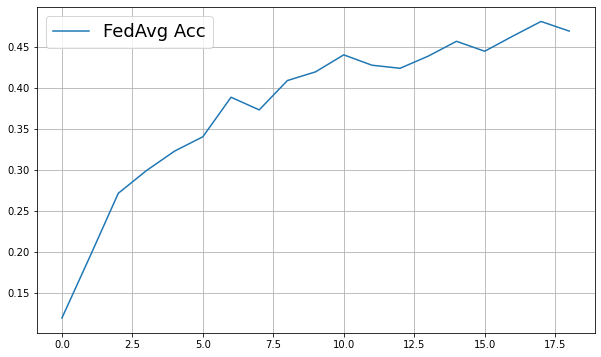

In [8]:
average_acc_list = []


for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum

    average_acc_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_acc_list[1:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

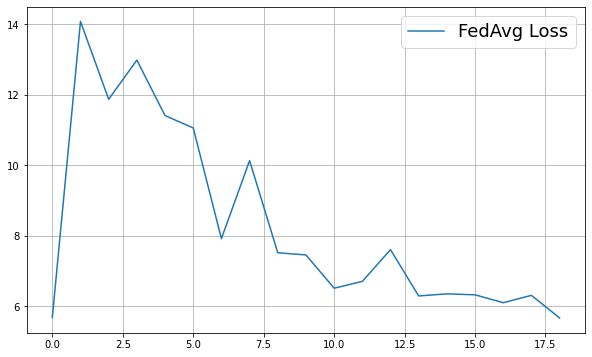

In [7]:
average_loss_list = []


for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum

    average_loss_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_loss_list[1:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()